In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install xgboost
import xgboost as xgb

!pip install lightgbm
from lightgbm import LGBMRegressor

!pip install catboost
from catboost import CatBoostRegressor

!pip install optuna
import optuna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)

plt.style.use('seaborn-v0_8-deep')

%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 26.0 MB/s eta 0:00:0000:0100:01


In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Scatter Plot**

In [5]:
def PlotScatter(x, y, title, xunit, yunit, format_x, x_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  plt.scatter(x, y, alpha=0.7)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel(xunit, fontsize = 10)
  plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  if (format_x == 1):
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

  if (x_size == 0):
    plt.gcf().set_size_inches(6, 5)
  else:
    plt.gcf().set_size_inches(x_size, 5)

  plt.show()
  plt.close()

## **Box Plot**

In [7]:
def PlotBoxPlot(df_x, df_y, title, yunit):
  plt.figure(figsize=(6, 5))
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  sns.boxplot(x = df_x, y = df_y, palette = "mako")

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_xlabel("", fontsize = 1)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.show()
  plt.close()

In [8]:
def PlotBoxPlotV2(df_x, df_y, title, yunit, size_x, size_y):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  sns.boxplot(x = df_x, y = df_y, palette = "mako")

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_xlabel("", fontsize = 1)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(size_x, size_y)

  plt.show()
  plt.close()

## **Regression Plot**

In [10]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
  plt.figure(figsize=(6, 5))
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_xlabel(xunit, fontsize = 10)
  plt.gca().xaxis.set_label_coords(1.05, -0.025)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

  plt.show()
  plt.close()

## **Histogram**

In [12]:
def HistPlot(x, title, xunit, x_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  sns.histplot(x = x)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel(xunit, fontsize = 10)
  plt.gca().xaxis.set_label_coords(0.98, -0.08)

  plt.ylabel("Count")

  if (x_size == 0):
    plt.gcf().set_size_inches(6, 5)
  else:
    plt.gcf().set_size_inches(x_size, 5)

  plt.show()
  plt.close()

## **Predicted vs Actual Values**

In [14]:
def PlotFitted(y_test, yhat, title):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)

    y_test1 = np.exp(y_test)
    yhat1 = np.exp(yhat)

    sns.scatterplot(x=y_test1.to_numpy().flatten(), y=yhat1, alpha=0.6)
    plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.gcf().set_size_inches(7, 5)

    plt.ylim(0,)
    plt.xlim(0,)
    
    plt.show()
    plt.close()
    
    
    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

In [15]:
def PlotFittedV(yhat, y_test, model, x_data, y_data, title, xlabel):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)

  ax2 = sns.distplot(y_test, hist=False, color="r", label = "Actual Value")
  sns.distplot(yhat, hist=False, color="b", label="Predicted Value", ax = ax2)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.ylabel("Density")
  plt.xlabel(xlabel)
  plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

  plt.gcf().set_size_inches(7, 5)

  plt.show()
  plt.close()

  print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
  print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))
  print("- Cross-Validation Score:", cross_val_score(model, x_data, y_data, cv=5).mean())

In [16]:
def PlotFittedV2(yhat, y_test, title, xlabel):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)

  ax2 = sns.distplot(np.exp(y_test), hist=False, color="r", label = "Actual Value")
  sns.distplot(np.exp(yhat), hist=False, color="b", label="Predicted Value", ax = ax2)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.ylabel("Density")
  plt.xlabel(xlabel)
  plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

  plt.gcf().set_size_inches(7, 5)

  plt.show()
  plt.close()

  print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
  print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

## **Line Plot**

In [18]:
def PlotLine(y, title, yunit, x_size, y_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  plt.plot(y)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

## **K-Fold Target Encoding**

In [20]:
def KFTE(df, df_test, categ_f, target):
  kf = KFold(n_splits = 5, shuffle = True, random_state = 13)

  nome = categ_f + "_E"

  df[nome] = 0.0

  for train_idx, val_idx in kf.split(df):
      fold_train = df.iloc[train_idx]
      fold_valid  = df.iloc[val_idx]

      medias_feature = fold_train.groupby(categ_f)[target].mean()
      media_global = fold_train[target].mean()

      feature_encoded = fold_valid[categ_f].map(medias_feature).fillna(media_global)
      df.loc[val_idx, nome] = feature_encoded

  mapping = df.groupby(categ_f)[target].mean().to_dict()
  global_mean = df[target].mean()

  df_test[categ_f] = df_test[categ_f].map(mapping).fillna(global_mean)

# **DATASET LOADING**

In [22]:
HousePricesDF = pd.read_csv("train.csv")
HousePricesDF_test = pd.read_csv("test.csv")
HousePricesDF.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [23]:
HousePricesDF.shape

(1460, 81)

In [24]:
HousePricesDF_test.shape

(1459, 80)

# **DATA CLEANING, PROCESSING, AND CONSOLIDATION**

## **DEALING WITH MISSING DATA**

In [27]:
HousePricesDF.isna().sum()[HousePricesDF.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### **LotFrontage**

In [29]:
HousePricesDF[['LotFrontage']].describe()

LotFrontage
count  1201.000000
mean     70.049958
std      24.284752
min      21.000000
25%      59.000000
50%      69.000000
75%      80.000000
max     313.000000

In [30]:
HousePricesDF[['LotFrontage']].value_counts().sort_index()

LotFrontage
21.0            23
24.0            19
30.0             6
32.0             5
33.0             1
34.0            10
35.0             9
36.0             6
37.0             5
38.0             1
39.0             1
40.0            12
41.0             6
42.0             4
43.0            12
44.0             9
45.0             3
46.0             1
47.0             5
48.0             6
49.0             4
50.0            57
51.0            15
52.0            14
53.0            10
54.0             6
55.0            17
56.0             5
57.0            12
58.0             7
59.0            13
60.0           143
61.0             8
62.0             9
63.0            17
64.0            19
65.0            44
66.0            15
67.0            12
68.0            19
69.0            11
70.0            70
71.0            12
72.0            17
73.0            18
74.0            15
75.0            53
76.0            11
77.0             9
78.0            25
79.0            17
80.0            69


Let's compare the impact on the correlation value when replacing null values with the mean, median, and mode.

Note: We will consider '313' as an outlier in the following calculations.

In [32]:
i = [HousePricesDF.corr(numeric_only = True)['SalePrice'][['LotFrontage']].iloc[0]]

# Replace it with mean
df = HousePricesDF[['LotFrontage', 'SalePrice']].copy()
df['LotFrontage'] = df['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].mean())
i.append(df.corr()['SalePrice'].iloc[0])

# Replace it with median
df = HousePricesDF[['LotFrontage', 'SalePrice']].copy()
df['LotFrontage'] = df['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].median())
i.append(df.corr()['SalePrice'].iloc[0])

# Replace it with mode
df = HousePricesDF[['LotFrontage', 'SalePrice']].copy()
df['LotFrontage'] = df['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].mode()[0])
i.append(df.corr()['SalePrice'].iloc[0])

i = pd.DataFrame(data = i, index = ["Original", "Mean", "Median", "Mode"], columns = ["SalePrice"])
i

SalePrice
Original   0.351799
Mean       0.334864
Median     0.334771
Mode       0.329220

Let's replace the null values with the mean, as it has the least impact on correlation.

In [34]:
HousePricesDF['LotFrontage'] = HousePricesDF['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].mean())

In [35]:
HousePricesDF_test['LotFrontage'] = HousePricesDF_test['LotFrontage'].fillna(HousePricesDF_test['LotFrontage'][HousePricesDF_test['LotFrontage'] < 313].mean())

### **Alley**

In [37]:
HousePricesDF[['Alley']].describe()

Alley
count     91
unique     2
top     Grvl
freq      50

In [38]:
HousePricesDF[['Alley']].value_counts()

Alley
Grvl     50
Pave     41
Name: count, dtype: int64

In the data description, not having alley access is a valid option. So, let's replace the null values with 0 and check the correlation value.

In [40]:
HousePricesDF['Alley'] = HousePricesDF['Alley'].replace({"Grvl": 1, "Pave": 2})
HousePricesDF['Alley'] = HousePricesDF['Alley'].fillna(0)
HousePricesDF.corr(numeric_only = True)['SalePrice'][['Alley']]

Alley   -0.092607
Name: SalePrice, dtype: float64

Since the number of null values was extremely high, we cannot determine whether 'NA' represented a missing value or a property without alley access. Given the low correlation value, we will drop the feature entirely.

In [42]:
HousePricesDF = HousePricesDF.drop(columns = ['Alley'])

In [43]:
HousePricesDF_test = HousePricesDF_test.drop(columns = ['Alley'])

###  **MasVnrType and MasVnrArea**

In [45]:
HousePricesDF[['MasVnrType']].describe()

MasVnrType
count         588
unique          3
top       BrkFace
freq          445

In [46]:
HousePricesDF[['MasVnrType']].value_counts()

MasVnrType
BrkFace       445
Stone         128
BrkCmn         15
Name: count, dtype: int64

In [47]:
HousePricesDF[['MasVnrArea']].describe()

MasVnrArea
count  1452.000000
mean    103.685262
std     181.066207
min       0.000000
25%       0.000000
50%       0.000000
75%     166.000000
max    1600.000000

In [48]:
HousePricesDF[['MasVnrArea']].value_counts().sort_index()

MasVnrArea
0.0           861
1.0             2
11.0            1
14.0            1
16.0            7
18.0            2
22.0            1
24.0            1
27.0            1
28.0            1
30.0            2
31.0            1
32.0            1
34.0            1
36.0            1
38.0            1
40.0            4
41.0            1
42.0            3
44.0            3
45.0            2
46.0            1
48.0            1
50.0            3
51.0            1
53.0            1
54.0            2
56.0            1
57.0            1
60.0            2
63.0            1
64.0            1
65.0            1
66.0            2
67.0            1
68.0            2
70.0            3
72.0            8
74.0            3
75.0            2
76.0            4
80.0            6
81.0            1
82.0            3
84.0            5
85.0            3
86.0            1
88.0            1
89.0            1
90.0            3
92.0            2
94.0            2
95.0            2
96.0            1
97.0            1

Let's replace the null values in 'MasVnrType' with 'None' where 'MasVnrArea' is equal to 0.

In [50]:
HousePricesDF.loc[HousePricesDF.MasVnrArea == 0, ['MasVnrType']] = "None"

In [51]:
HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea == 0, ['MasVnrType']] = "None"

Let's examine how the null values in 'MasVnrArea' are distributed:

In [53]:
HousePricesDF[HousePricesDF['MasVnrArea'].isnull() == True][['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

Since the majority of 'MasVnrType' data is 'None', we will replace 'MasVnrType' with 'None' and 'MasVnrArea' with 0:

In [55]:
HousePricesDF.loc[HousePricesDF.MasVnrArea.isnull() == True, ['MasVnrType', 'MasVnrArea']] = "None", 0

In [56]:
HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea.isnull() == True, ['MasVnrType', 'MasVnrArea']] = "None", 0

Let's check the remaining null values:

In [58]:
HousePricesDF[HousePricesDF['MasVnrType'].isnull() == True][['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
624         NaN       288.0
773         NaN         1.0
1230        NaN         1.0
1300        NaN       344.0
1334        NaN       312.0

Since 'MasVnrArea' equal to 1 is an unusually low value, we will consider it a typo and replace it with 0.<br>
Let's isolate the 'MasVnrArea' values in the last quartile and replace 'MasVnrType' with the most frequent value.

In [60]:
HousePricesDF.loc[HousePricesDF.MasVnrArea == 1, ['MasVnrType', 'MasVnrArea']] = "None", 0
HousePricesDF['MasVnrType'] = HousePricesDF['MasVnrType'].fillna(HousePricesDF.loc[HousePricesDF.MasVnrArea >= HousePricesDF['MasVnrArea']\
                                                                                   .quantile(0.75)]['MasVnrType'].describe().iloc[2])

In [61]:
HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea == 1, ['MasVnrType', 'MasVnrArea']] = "None", 0
HousePricesDF_test['MasVnrType'] = HousePricesDF_test['MasVnrType'].fillna(HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea >= HousePricesDF_test['MasVnrArea']\
                                                                                   .quantile(0.75)]['MasVnrType'].describe().iloc[2])

### **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**

Let's check the condition of the null values occurrence.

In [64]:
HousePricesDF.loc[HousePricesDF.BsmtQual.isnull() == True][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                            'TotalBsmtSF']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF
17        NaN      NaN          NaN          NaN          NaN            0
39        NaN      NaN          NaN          NaN          NaN            0
90        NaN      NaN          NaN          NaN          NaN            0
102       NaN      NaN          NaN          NaN          NaN            0
156       NaN      NaN          NaN          NaN          NaN            0
182       NaN      NaN          NaN          NaN          NaN            0
259       NaN      NaN          NaN          NaN          NaN            0
342       NaN      NaN          NaN          NaN          NaN            0
362       NaN      NaN          NaN          NaN          NaN            0
371       NaN      NaN          NaN          NaN          NaN            0
392       NaN      NaN          NaN          NaN          NaN            0
520       NaN      NaN          NaN          NaN          NaN            0
532       NaN      NaN          NaN          NaN          NaN            0
533       NaN      NaN          NaN          NaN          NaN            0
553       NaN      NaN          NaN          NaN          NaN            0
646       NaN      NaN          NaN          NaN          NaN            0
705       NaN      NaN          NaN          NaN          NaN            0
736       NaN      NaN          NaN          NaN          NaN            0
749       NaN      NaN          NaN          NaN          NaN            0
778       NaN      NaN          NaN          NaN          NaN            0
868       NaN      NaN          NaN          NaN          NaN            0
894       NaN      NaN          NaN          NaN          NaN            0
897       NaN      NaN          NaN          NaN          NaN            0
984       NaN      NaN          NaN          NaN          NaN            0
1000      NaN      NaN          NaN          NaN          NaN            0
1011      NaN      NaN          NaN          NaN          NaN            0
1035      NaN      NaN          NaN          NaN          NaN            0
1045      NaN      NaN          NaN          NaN          NaN            0
1048      NaN      NaN          NaN          NaN          NaN            0
1049      NaN      NaN          NaN          NaN          NaN            0
1090      NaN      NaN          NaN          NaN          NaN            0
1179      NaN      NaN          NaN          NaN          NaN            0
1216      NaN      NaN          NaN          NaN          NaN            0
1218      NaN      NaN          NaN          NaN          NaN            0
1232      NaN      NaN          NaN          NaN          NaN            0
1321      NaN      NaN          NaN          NaN          NaN            0
1412      NaN      NaN          NaN          NaN          NaN            0

Since the null values occur when the total square footage of the basement area is 0, we will replace the null values with 'None'.

In [66]:
HousePricesDF.loc[HousePricesDF.BsmtQual.isnull() == True, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = "None"

In [67]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtQual.isnull() == True, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = "None"

Let's check the occurrence of null values in the 'BsmtExposure' feature and replace the missing values with the most frequent value in the occurrences that follow the same pattern.

In [69]:
HousePricesDF.loc[HousePricesDF.BsmtExposure.isnull() == True][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                            'TotalBsmtSF']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF
948       Gd       TA          NaN          Unf          Unf          936

In [70]:
i = HousePricesDF.loc[(HousePricesDF.BsmtQual == "Gd") & (HousePricesDF.BsmtCond == "TA") & (HousePricesDF.BsmtFinType1 == "Unf")][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                            'TotalBsmtSF']][['BsmtExposure']].value_counts().index.values[0][0]

HousePricesDF['BsmtExposure'] = HousePricesDF['BsmtExposure'].fillna(i)

In [71]:
i = HousePricesDF_test.loc[(HousePricesDF_test.BsmtQual == "Gd") & (HousePricesDF_test.BsmtCond == "TA") & (HousePricesDF_test.BsmtFinType1 == "Unf")]\
                            [['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','TotalBsmtSF']][['BsmtExposure']].value_counts().index.values[0][0]

HousePricesDF_test['BsmtExposure'] = HousePricesDF_test['BsmtExposure'].fillna(i)

We will do the same for the 'BsmtFinType2' feature.

In [73]:
HousePricesDF.loc[HousePricesDF.BsmtFinType2.isnull() == True][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                                'BsmtFinSF2', 'TotalBsmtSF']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF2  \
332       Gd       TA           No          GLQ          NaN         479   

     TotalBsmtSF  
332         3206

In [74]:
i = HousePricesDF.loc[(HousePricesDF.BsmtQual == "Gd") & (HousePricesDF.BsmtCond == "TA") & (HousePricesDF.BsmtExposure == "No")
                    & (HousePricesDF.BsmtFinType1 == "GLQ")][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                              'TotalBsmtSF']][['BsmtFinType2']].value_counts().index.values[0][0]

HousePricesDF['BsmtFinType2'] = HousePricesDF['BsmtFinType2'].fillna(i)

In [75]:
i = HousePricesDF_test.loc[(HousePricesDF_test.BsmtQual == "Gd") & (HousePricesDF_test.BsmtCond == "TA") & (HousePricesDF_test.BsmtExposure == "No")
                    & (HousePricesDF_test.BsmtFinType1 == "GLQ")][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                              'TotalBsmtSF']][['BsmtFinType2']].value_counts().index.values[0][0]

HousePricesDF_test['BsmtFinType2'] = HousePricesDF_test['BsmtFinType2'].fillna(i)

### **Electrical**

In [77]:
HousePricesDF[['Electrical']].value_counts()

Electrical
SBrkr         1334
FuseA           94
FuseF           27
FuseP            3
Mix              1
Name: count, dtype: int64

In [78]:
HousePricesDF['Electrical'] = HousePricesDF['Electrical'].fillna("SBrkr")

In [79]:
HousePricesDF_test['Electrical'] = HousePricesDF_test['Electrical'].fillna("SBrkr")

### **FireplaceQu**

In [81]:
HousePricesDF.loc[HousePricesDF.FireplaceQu.isnull() == True][['Fireplaces']].value_counts()

Fireplaces
0             690
Name: count, dtype: int64

In [82]:
HousePricesDF['FireplaceQu'] = HousePricesDF['FireplaceQu'].fillna("None")

In [83]:
HousePricesDF_test['FireplaceQu'] = HousePricesDF_test['FireplaceQu'].fillna("None")

### **GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond**

In [85]:
HousePricesDF.loc[HousePricesDF.GarageType.isnull() == True][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
                                                              'GarageCars']]

GarageType  GarageYrBlt GarageFinish GarageQual GarageCond  GarageCars
39          NaN          NaN          NaN        NaN        NaN           0
48          NaN          NaN          NaN        NaN        NaN           0
78          NaN          NaN          NaN        NaN        NaN           0
88          NaN          NaN          NaN        NaN        NaN           0
89          NaN          NaN          NaN        NaN        NaN           0
99          NaN          NaN          NaN        NaN        NaN           0
108         NaN          NaN          NaN        NaN        NaN           0
125         NaN          NaN          NaN        NaN        NaN           0
127         NaN          NaN          NaN        NaN        NaN           0
140         NaN          NaN          NaN        NaN        NaN           0
148         NaN          NaN          NaN        NaN        NaN           0
155         NaN          NaN          NaN        NaN        NaN           0
163         NaN          NaN          NaN        NaN        NaN           0
165         NaN          NaN          NaN        NaN        NaN           0
198         NaN          NaN          NaN        NaN        NaN           0
210         NaN          NaN          NaN        NaN        NaN           0
241         NaN          NaN          NaN        NaN        NaN           0
250         NaN          NaN          NaN        NaN        NaN           0
287         NaN          NaN          NaN        NaN        NaN           0
291         NaN          NaN          NaN        NaN        NaN           0
307         NaN          NaN          NaN        NaN        NaN           0
375         NaN          NaN          NaN        NaN        NaN           0
386         NaN          NaN          NaN        NaN        NaN           0
393         NaN          NaN          NaN        NaN        NaN           0
431         NaN          NaN          NaN        NaN        NaN           0
434         NaN          NaN          NaN        NaN        NaN           0
441         NaN          NaN          NaN        NaN        NaN           0
464         NaN          NaN          NaN        NaN        NaN           0
495         NaN          NaN          NaN        NaN        NaN           0
520         NaN          NaN          NaN        NaN        NaN           0
528         NaN          NaN          NaN        NaN        NaN           0
533         NaN          NaN          NaN        NaN        NaN           0
535         NaN          NaN          NaN        NaN        NaN           0
562         NaN          NaN          NaN        NaN        NaN           0
582         NaN          NaN          NaN        NaN        NaN           0
613         NaN          NaN          NaN        NaN        NaN           0
614         NaN          NaN          NaN        NaN        NaN           0
620         NaN          NaN          NaN        NaN        NaN           0
635         NaN          NaN          NaN        NaN        NaN           0
636         NaN          NaN          NaN        NaN        NaN           0
638         NaN          NaN          NaN        NaN        NaN           0
649         NaN          NaN          NaN        NaN        NaN           0
705         NaN          NaN          NaN        NaN        NaN           0
710         NaN          NaN          NaN        NaN        NaN           0
738         NaN          NaN          NaN        NaN        NaN           0
750         NaN          NaN          NaN        NaN        NaN           0
784         NaN          NaN          NaN        NaN        NaN           0
826         NaN          NaN          NaN        NaN        NaN           0
843         NaN          NaN          NaN        NaN        NaN           0
921         NaN          NaN          NaN        NaN        NaN           0
942         NaN          NaN          NaN        NaN        NaN           0
954         NaN          NaN          NaN        NaN 

In [86]:
HousePricesDF.loc[HousePricesDF.GarageType.isnull() == True, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = "None"

In [87]:
HousePricesDF['GarageYrBlt'] = HousePricesDF['GarageYrBlt'].fillna(0)

In [88]:
HousePricesDF_test.loc[HousePricesDF_test.GarageType.isnull() == True, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = "None"
HousePricesDF_test['GarageYrBlt'] = HousePricesDF_test['GarageYrBlt'].fillna(0)

### **PoolQC**

In [90]:
HousePricesDF.loc[HousePricesDF.PoolQC.isnull() == True][['PoolArea']].value_counts()

PoolArea
0           1453
Name: count, dtype: int64

In [91]:
HousePricesDF['PoolQC'] = HousePricesDF['PoolQC'].fillna("None")

In [92]:
HousePricesDF_test['PoolQC'] = HousePricesDF_test['PoolQC'].fillna("None")

### **Fence**

Since 80% of the entries are null values and we cannot determine whether they represent missing values or the absence of a fence, we'll drop the feature.

In [95]:
HousePricesDF = HousePricesDF.drop(columns = ['Fence'])

In [96]:
HousePricesDF_test = HousePricesDF_test.drop(columns = ['Fence'])

### **MiscFeature**

We will do the same with the 'MiscFeature' feature and, consequently, with 'MiscVal'.

In [99]:
HousePricesDF = HousePricesDF.drop(columns = ['MiscFeature', 'MiscVal'])

In [100]:
HousePricesDF_test = HousePricesDF_test.drop(columns = ['MiscFeature', 'MiscVal'])

### **Test Data**

In [102]:
HousePricesDF_test.isna().sum()[HousePricesDF_test.isna().sum() > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtCond        3
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageFinish    2
GarageCars      1
GarageArea      1
GarageQual      2
GarageCond      2
SaleType        1
dtype: int64

#### **MSZoning**

In [104]:
HousePricesDF_test['MSZoning'].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [105]:
HousePricesDF_test['MSZoning'] = HousePricesDF_test['MSZoning'].fillna("RL")

#### **Utilities**

In [107]:
HousePricesDF_test['Utilities'].value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [108]:
HousePricesDF_test['Utilities'] = HousePricesDF_test['Utilities'].fillna("AllPub")

#### **Exterior1st**

In [110]:
HousePricesDF_test['Exterior1st'].value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [111]:
HousePricesDF_test['Exterior1st'] = HousePricesDF_test['Exterior1st'].fillna("VinylSd")

#### **Exterior2nd**

In [113]:
HousePricesDF_test['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: count, dtype: int64

In [114]:
HousePricesDF_test['Exterior2nd'] = HousePricesDF_test['Exterior2nd'].fillna("VinylSd")

#### **BsmtCond**

In [116]:
HousePricesDF_test['BsmtCond'].value_counts()

BsmtCond
TA      1294
Fa        58
Gd        57
None      44
Po         3
Name: count, dtype: int64

In [117]:
HousePricesDF_test['BsmtCond'] = HousePricesDF_test['BsmtCond'].fillna("TA")

#### **BsmtFinSF1**

In [119]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtFinSF1.isnull() == True][['BsmtFinSF1', 'BsmtFinType1']]

BsmtFinSF1 BsmtFinType1
660         NaN         None

In [120]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtFinSF1.isnull() == True) & (HousePricesDF_test.BsmtFinType1 == "None"), ['BsmtFinSF1']] = 0

#### **BsmtFinSF2**

In [122]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtFinSF2.isnull() == True][['BsmtFinSF2', 'BsmtFinType2']]

BsmtFinSF2 BsmtFinType2
660         NaN         None

In [123]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtFinSF2.isnull() == True) & (HousePricesDF_test.BsmtFinType2 == "None"), ['BsmtFinSF2']] = 0

#### **BsmtUnfSF and TotalBsmtSF**

In [125]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtUnfSF.isnull() == True][['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
660         0.0         0.0        NaN          NaN

In [126]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtUnfSF.isnull() == True) & (HousePricesDF_test.BsmtFinSF1 == 0) & (HousePricesDF_test.BsmtFinSF2 == 0),\
                              ['BsmtUnfSF', 'TotalBsmtSF']] = 0

#### **BsmtFullBath and BsmtHalfBath**

In [128]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtFullBath.isnull() == True][['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF']]

BsmtFullBath  BsmtHalfBath  TotalBsmtSF
660           NaN           NaN          0.0
728           NaN           NaN          0.0

In [129]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtFullBath.isnull() == True) & (HousePricesDF_test.TotalBsmtSF == 0), ['BsmtFullBath', 'BsmtHalfBath']] = 0

#### **KitchenQual**

In [131]:
HousePricesDF_test.loc[HousePricesDF_test.KitchenQual.isnull() == True][['KitchenQual', 'KitchenAbvGr']]

KitchenQual  KitchenAbvGr
95         NaN             1

In [132]:
HousePricesDF_test['KitchenQual'].value_counts()

KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: count, dtype: int64

In [133]:
HousePricesDF_test['KitchenQual'] = HousePricesDF_test['KitchenQual'].fillna("TA")

#### **Functional**

In [135]:
HousePricesDF_test['Functional'].value_counts()

Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: count, dtype: int64

In [136]:
HousePricesDF_test['Functional'] = HousePricesDF_test['Functional'].fillna("Typ")

#### **GarageFinish, GarageCars, GarageArea, GarageQual and GarageCond**

In [138]:
HousePricesDF_test.loc[HousePricesDF_test.GarageFinish.isnull() == True][['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

GarageFinish  GarageCars  GarageArea GarageQual GarageCond
666           NaN         1.0       360.0        NaN        NaN
1116          NaN         NaN         NaN        NaN        NaN

In [139]:
HousePricesDF_test['GarageFinish'].value_counts()

GarageFinish
Unf     625
RFn     389
Fin     367
None     76
Name: count, dtype: int64

In [140]:
HousePricesDF_test['GarageQual'].value_counts()

GarageQual
TA      1293
None      76
Fa        76
Gd        10
Po         2
Name: count, dtype: int64

In [141]:
HousePricesDF_test['GarageCond'].value_counts()

GarageCond
TA      1328
None      76
Fa        39
Po         7
Gd         6
Ex         1
Name: count, dtype: int64

In [142]:
HousePricesDF_test.loc[(HousePricesDF_test.GarageFinish.isnull() == True) & (HousePricesDF_test.GarageCars.isnull() == True), \
                          ['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']] = "None", 0, 0, "None", "None"

#### **SaleType**

In [144]:
HousePricesDF_test['SaleType'].value_counts()

SaleType
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: count, dtype: int64

In [145]:
HousePricesDF_test['SaleType'] = HousePricesDF_test['SaleType'].fillna("WD")

### **Correcting Features Types**

In [147]:
HousePricesDF = HousePricesDF.astype({'LotArea':'float',
                                      'BsmtFinSF1':'float',
                                      'BsmtFinSF2': 'float',
                                      'BsmtUnfSF': 'float',
                                      'TotalBsmtSF': 'float',
                                      '1stFlrSF': 'float',
                                      '2ndFlrSF': 'float',
                                      'LowQualFinSF': 'float',
                                      'GrLivArea': 'float',
                                      'GarageYrBlt': 'int',
                                      'GarageArea': 'float',
                                      'WoodDeckSF': 'float',
                                      'OpenPorchSF': 'float',
                                      'EnclosedPorch': 'float',
                                      '3SsnPorch': 'float',
                                      'ScreenPorch': 'float',
                                      'PoolArea': 'float',
                                      'SalePrice': 'float'})

In [148]:
HousePricesDF_test = HousePricesDF_test.astype({'LotArea':'float',
                                                'BsmtFinSF1':'float',
                                                'BsmtFinSF2': 'float',
                                                'BsmtUnfSF': 'float',
                                                'TotalBsmtSF': 'float',
                                                '1stFlrSF': 'float',
                                                '2ndFlrSF': 'float',
                                                'LowQualFinSF': 'float',
                                                'GrLivArea': 'float',
                                                'GarageYrBlt': 'int',
                                                'GarageArea': 'float',
                                                'WoodDeckSF': 'float',
                                                'OpenPorchSF': 'float',
                                                'EnclosedPorch': 'float',
                                                '3SsnPorch': 'float',
                                                'ScreenPorch': 'float',
                                                'PoolArea': 'float'})

## **OUTLIERS**

### **LotFrontage**

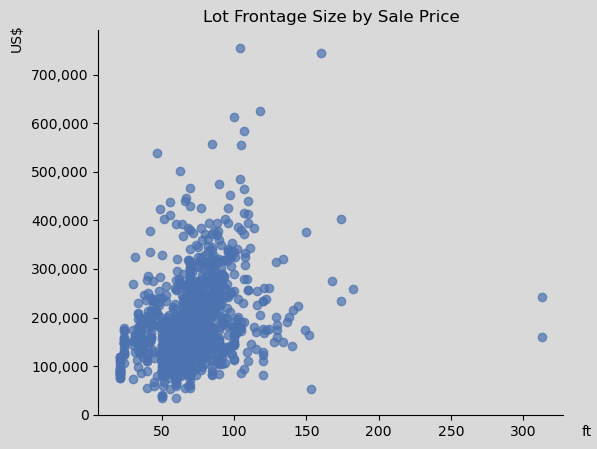

In [151]:
PlotScatter(HousePricesDF['LotFrontage'], HousePricesDF['SalePrice'], "Lot Frontage Size by Sale Price", "ft", "US$", 0, 0)

In [152]:
HousePricesDF.query('LotFrontage > 200')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
934    935          20       RL        313.0  27650.0   Pave      IR2   
1298  1299          60       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
934          HLS    AllPub    Inside       Mod        NAmes       PosA   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
934        Norm     1Fam     1Story            7            7       1960   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
934           2007      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
934          0.0        TA        TA     CBlock       Gd       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
934            Gd          GLQ       425.0          Unf         0.0   
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
934       160.0        585.0    GasA        Ex          Y      SBrkr   
1298      466.0       6110.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
934     2069.0       0.0           0.0     2069.0             1             0   
1298    4692.0     950.0           0.0     5642.0             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
934          2         0             4             1          Gd   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
934              9        Typ           1          Gd     Attchd         1960   
1298            12        Typ           3          Gd     Attchd         2008   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
934           RFn           2       505.0         TA         TA          Y   
1298          Fin           2      1418.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
934          0.0          0.0            0.0        0.0          0.0   
1298       214.0        292.0            0.0        0.0          0.0   

      PoolArea PoolQC  MoSold  YrSold SaleType SaleCondition  SalePrice  
934        0.0   None      11    2008       WD        Normal   242000.0  
1298     480.0     Gd       1    2008      New       Partial   160000.0

### **LotArea**

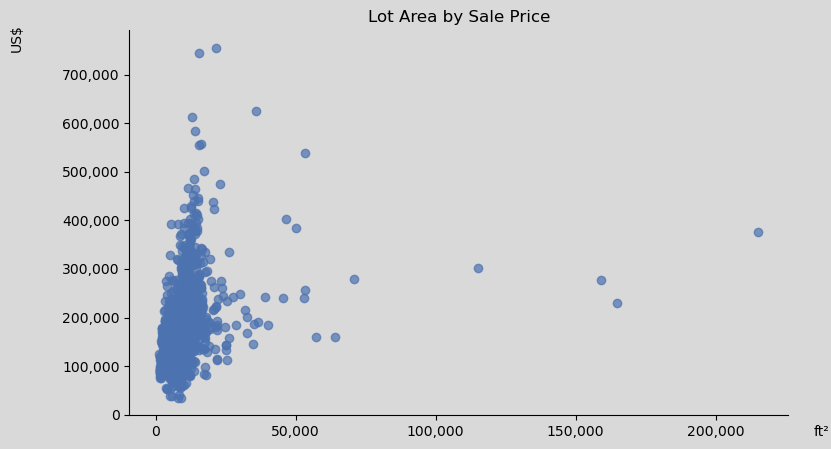

In [154]:
PlotScatter(HousePricesDF['LotArea'], HousePricesDF['SalePrice'], "Lot Area by Sale Price", "ft²", "US$", 1, 8.5)

In [155]:
HousePricesDF.query('LotArea >= 40000')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
53      54          20       RL    68.000000   50271.0   Pave      IR1   
249    250          50       RL    69.644704  159000.0   Pave      IR2   
313    314          20       RL   150.000000  215245.0   Pave      IR3   
335    336         190       RL    69.644704  164660.0   Grvl      IR1   
384    385          60       RL    69.644704   53107.0   Pave      IR2   
451    452          20       RL    62.000000   70761.0   Pave      IR1   
457    458          20       RL    69.644704   53227.0   Pave      IR1   
523    524          60       RL   130.000000   40094.0   Pave      IR1   
661    662          60       RL    52.000000   46589.0   Pave      IR2   
706    707          20       RL    69.644704  115149.0   Pave      IR2   
769    770          60       RL    47.000000   53504.0   Pave      IR2   
848    849          50       RL    75.000000   45600.0   Pave      IR2   
1298  1299          60       RL   313.000000   63887.0   Pave      IR3   
1396  1397          20       RL    69.644704   57200.0   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
249          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
313          Low    AllPub    Inside       Sev       Timber       Norm   
335          HLS    AllPub    Corner       Sev       Timber       Norm   
384          Low    AllPub    Corner       Mod      ClearCr      Feedr   
451          Low    AllPub    Inside       Mod      ClearCr       Norm   
457          Low    AllPub   CulDSac       Mod      ClearCr       Norm   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
661          Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
706          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
769          HLS    AllPub   CulDSac       Mod      StoneBr       Norm   
848          Bnk    AllPub    Inside       Gtl      ClearCr       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
1396         Bnk    AllPub    Inside       Sev       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
53         Norm     1Fam     1Story            9            5       1981   
249        Norm     1Fam     1.5Fin            6            7       1958   
313        Norm     1Fam     1Story            7            5       1965   
335        Norm   2fmCon     1.5Fin            5            6       1965   
384        Norm     1Fam     2Story            6            5       1992   
451        Norm     1Fam     1Story            7            5       1975   
457        Norm     1Fam     1Story            4            6       1954   
523        PosN     1Fam     2Story           10            5       2007   
661        Norm     1Fam     2Story            8            7       1994   
706        Norm     1Fam     1Story            7            5       1971   
769        Norm     1Fam     2Story            8            5       2003   
848        Norm     1Fam     1.5Fin            6            8       1908   
1298       Norm     1Fam     2Story           10            5       2008   
1396       Norm     1Fam     1Story            5            5       1948   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
53            1987     Gable  WdShngl     WdShing     Wd Shng       None   
249           2006     Gable  CompShg     Wd Sdng     HdBoard     BrkCmn   
313           1965       Hip  CompShg     BrkFace     BrkFace       None   
335           1965     Gable  CompShg     Plywood     Plywood       None   
384           1992     Gable  CompShg     HdBoard     HdBoard       None   
451           1975     Gable  WdShngl     Plywood     Plywood       None   
457           1994      Flat  Tar&Grv     Plywood     Plywood       None   
523           2008       Hip  CompShg

### **YearBuilt**

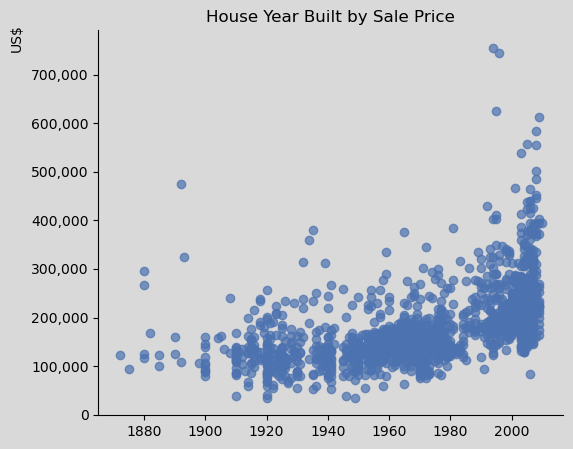

In [157]:
PlotScatter(HousePricesDF['YearBuilt'], HousePricesDF['SalePrice'], "House Year Built by Sale Price", "", "US$", 0, 0)

In [158]:
HousePricesDF.query('YearBuilt < 1900 & SalePrice > 250000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
185  186          75       RM         90.0  22950.0   Pave      IR2   
304  305          75       RM         87.0  18386.0   Pave      Reg   
583  584          75       RM         75.0  13500.0   Pave      Reg   
747  748          70       RM         65.0  11700.0   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
304         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
583         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
747         Lvl    AllPub    Corner       Gtl      OldTown       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185       Norm     1Fam     2.5Fin           10            9       1892   
304       Norm     1Fam     2.5Fin            7            9       1880   
583       PosA     1Fam     2.5Unf           10            9       1893   
747       Norm     1Fam     2Story            7            7       1880   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185          1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None   
304          2002     Gable  CompShg     CemntBd     CmentBd       None   
583          2000     Gable  CompShg     Wd Sdng     Wd Sdng       None   
747          2003   Mansard  CompShg      Stucco      Stucco       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
185         0.0        Gd        Gd     BrkTil       TA       TA           Mn   
304         0.0        TA        TA     BrkTil       TA       TA           No   
583         0.0        Ex        Ex     BrkTil       TA       TA           No   
747         0.0        Gd        TA      Stone       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
185          Unf         0.0          Unf         0.0     1107.0       1107.0   
304          Unf         0.0          Unf         0.0     1470.0       1470.0   
583          Unf         0.0          Unf         0.0     1237.0       1237.0   
747          Unf         0.0          Unf         0.0     1240.0       1240.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
185    GasA        Ex          Y      SBrkr    1518.0    1518.0         572.0   
304    GasA        Ex          Y      SBrkr    1675.0    1818.0           0.0   
583    GasA        Gd          Y      SBrkr    1521.0    1254.0           0.0   
747    GasW        TA          N      SBrkr    1320.0    1320.0           0.0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
185     3608.0             0             0         2         1             4   
304     3493.0             0             0         3         0             3   
583     2775.0             0             0         3         1             3   
747     2640.0             0             0         1         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
185             1          Ex            12        Typ           2   
304             1          Gd            10        Typ           1   
583             1          Gd             9        Typ           1   
747             1          Gd             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
185          TA     Detchd         1993          Unf           3       840.0   
304          Ex     Attchd         2003          Unf           3       870.0   
583          Gd     Detchd         1988          Unf           2       880.0   
747          Gd     Detchd         1950          Unf           4       864.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
185         Ex         TA          Y         0.0        260.0            0.0   
3

In [159]:
HousePricesDF.query('(YearBuilt < 1900 & SalePrice > 400000) | (YearBuilt > 1980 & SalePrice > 700000)')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
185    186          75       RM         90.0  22950.0   Pave      IR2   
691    692          60       RL        104.0  21535.0   Pave      IR1   
1182  1183          60       RL        160.0  15623.0   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185        Norm     1Fam     2.5Fin           10            9       1892   
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185           1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
185          0.0        Gd        Gd     BrkTil       TA       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
185            Mn          Unf         0.0          Unf         0.0   
691            Gd          GLQ      1455.0          Unf         0.0   
1182           Av          GLQ      2096.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
185      1107.0       1107.0    GasA        Ex          Y      SBrkr   
691       989.0       2444.0    GasA        Ex          Y      SBrkr   
1182      300.0       2396.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
185     1518.0    1518.0         572.0     3608.0             0             0   
691     2444.0    1872.0           0.0     4316.0             0             1   
1182    2411.0    2065.0           0.0     4476.0             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
185          2         1             4             1          Ex   
691          3         1             4             1          Ex   
1182         3         1             4             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
185             12        Typ           2          TA     Detchd         1993   
691             10        Typ           2          Ex     Attchd         1994   
1182            10        Typ           2          TA     Attchd         1996   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
185           Unf           3       840.0         Ex         TA          Y   
691           Fin           3       832.0         TA         TA          Y   
1182          Fin           3       813.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
185          0.0        260.0            0.0        0.0        410.0   
691        382.0         50.0            0.0        0.0          0.0   
1182       171.0         78.0            0.0        0.0          0.0   

      PoolArea PoolQC  MoSold  YrSold SaleType SaleCondition  SalePrice  
185        0.0   None       6    2006       WD        Normal   475000.0  
691        0.0   None       1    2007       WD        Normal   755000.0  
1182     555.0     Ex       7    2007       WD       Abnorml   745000.0

### **YearRemodAdd**

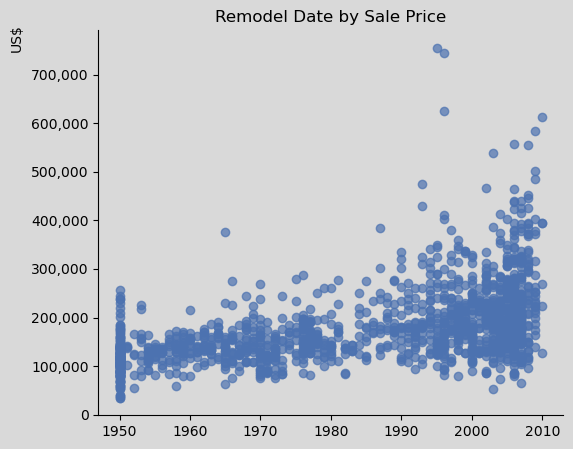

In [161]:
PlotScatter(HousePricesDF['YearRemodAdd'], HousePricesDF['SalePrice'], "Remodel Date by Sale Price", "", "US$", 0, 0)

### **MasVnrArea**

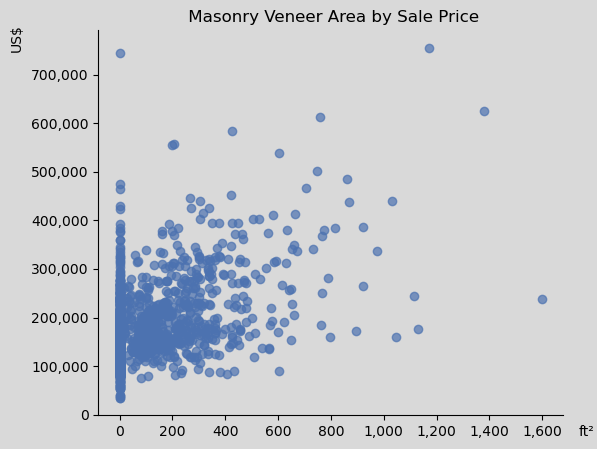

In [163]:
PlotScatter(HousePricesDF['MasVnrArea'], HousePricesDF['SalePrice'], " Masonry Veneer Area by Sale Price", "ft²", "US$", 1, 0)

In [164]:
HousePricesDF.query('MasVnrArea > 1000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
58      59          60       RL         66.0  13682.0   Pave      IR2   
70      71          20       RL         95.0  13651.0   Pave      IR1   
115    116         160       FV         34.0   3230.0   Pave      Reg   
297    298          60       FV         66.0   7399.0   Pave      IR1   
691    692          60       RL        104.0  21535.0   Pave      IR1   
808    809          80       RL         85.0  13400.0   Pave      Reg   
1169  1170          60       RL        118.0  35760.0   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
58           HLS    AllPub   CulDSac       Gtl      StoneBr       Norm   
70           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
115          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
297          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
808          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1169         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
58         Norm     1Fam     2Story           10            5       2006   
70         Norm     1Fam     1Story            7            6       1973   
115        Norm   TwnhsE     2Story            6            5       1999   
297        Norm     1Fam     2Story            7            5       1997   
691        Norm     1Fam     2Story           10            6       1994   
808        Norm     1Fam       SLvl            5            5       1966   
1169       Norm     1Fam     2Story           10            5       1995   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
58            2006       Hip  CompShg     VinylSd     VinylSd    BrkFace   
70            1973     Gable  CompShg     Plywood     Plywood    BrkFace   
115           1999     Gable  CompShg     MetalSd     MetalSd    BrkFace   
297           1998       Hip  CompShg     VinylSd     VinylSd    BrkFace   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
808           1966     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1169          1996       Hip  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
58        1031.0        Ex        TA      PConc       Ex       TA   
70        1115.0        TA        Gd     CBlock       Gd       TA   
115       1129.0        TA        TA      PConc       Gd       TA   
297       1600.0        Gd        TA      PConc       Gd       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
808       1047.0        TA        TA     CBlock       TA       TA   
1169      1378.0        Gd        Gd      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
58             Gd          Unf         0.0          Unf         0.0   
70             Gd          ALQ      1880.0          Unf         0.0   
115            No          GLQ       419.0          Unf         0.0   
297            No          BLQ       649.0          Unf         0.0   
691            Gd          GLQ      1455.0          Unf         0.0   
808            Av          ALQ       516.0          BLQ       128.0   
1169           Gd          GLQ      1387.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
58       1410.0       1410.0    GasA        Ex          Y      SBrkr   
70        343.0       2223.0    GasA        Ex          Y      SBrkr   
115       310.0        729.0    GasA        Gd          Y      SBrkr   
297       326.0        975.0    GasA        Ex          Y      SBrkr   
691       989.0       2444.0    GasA        Ex          Y      SBrkr   
808       380.0       1024.0    GasA        TA          Y 

### **BsmtFinSF1**

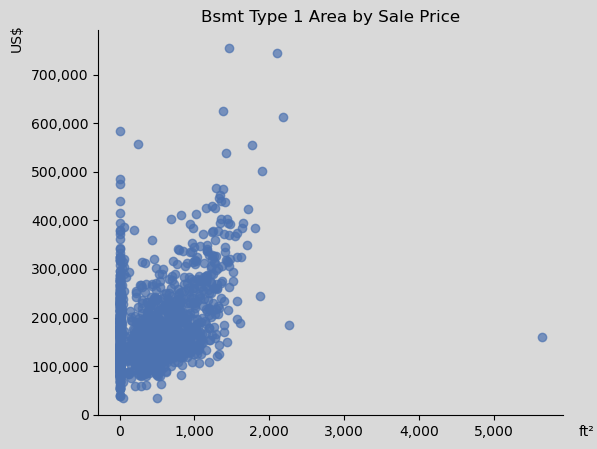

In [166]:
PlotScatter(HousePricesDF['BsmtFinSF1'], HousePricesDF['SalePrice'], "Bsmt Type 1 Area by Sale Price", "ft²", "US$", 1, 0)

In [167]:
HousePricesDF.query('BsmtFinSF1 > 1800')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
53      54          20       RL         68.0  50271.0   Pave      IR1   
70      71          20       RL         95.0  13651.0   Pave      IR1   
178    179          20       RL         63.0  17423.0   Pave      IR1   
523    524          60       RL        130.0  40094.0   Pave      IR1   
898    899          20       RL        100.0  12919.0   Pave      IR1   
1182  1183          60       RL        160.0  15623.0   Pave      IR1   
1298  1299          60       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
70           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
178          Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
898          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
53         Norm     1Fam     1Story            9            5       1981   
70         Norm     1Fam     1Story            7            6       1973   
178        Norm     1Fam     1Story            9            5       2008   
523        PosN     1Fam     2Story           10            5       2007   
898        Norm     1Fam     1Story            9            5       2009   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
53            1987     Gable  WdShngl     WdShing     Wd Shng       None   
70            1973     Gable  CompShg     Plywood     Plywood    BrkFace   
178           2009       Hip  CompShg     VinylSd     VinylSd      Stone   
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
898           2010       Hip  CompShg     VinylSd     VinylSd      Stone   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
53           0.0        Gd        TA     CBlock       Ex       TA   
70        1115.0        TA        Gd     CBlock       Gd       TA   
178        748.0        Ex        TA      PConc       Ex       TA   
523        762.0        Ex        TA      PConc       Ex       TA   
898        760.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
53             Gd          GLQ      1810.0          Unf         0.0   
70             Gd          ALQ      1880.0          Unf         0.0   
178            No          GLQ      1904.0          Unf         0.0   
523            Gd          GLQ      2260.0          Unf         0.0   
898            Gd          GLQ      2188.0          Unf         0.0   
1182           Av          GLQ      2096.0          Unf         0.0   
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
53         32.0       1842.0    GasA        Gd          Y      SBrkr   
70        343.0       2223.0    GasA        Ex          Y      SBrkr   
178       312.0       2216.0    GasA        Ex          Y      SBrkr   
523       878.0       3138.0    GasA        Ex          Y      SBrkr   
898       142.0       2330.0    GasA        Ex          Y      SBrkr   
1182      300.0       2396.0    GasA        Ex          Y 

### **BsmtFinSF2**

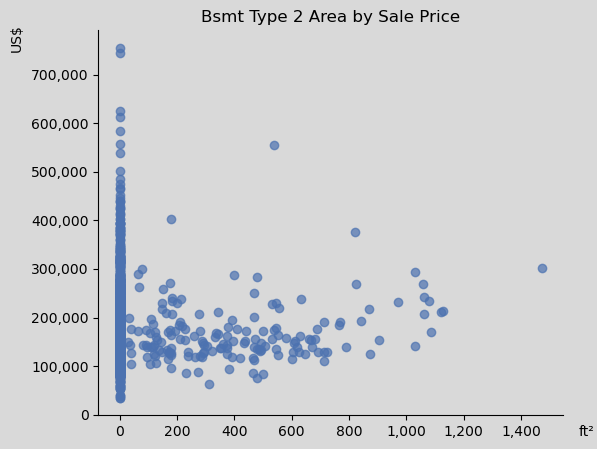

In [169]:
PlotScatter(HousePricesDF['BsmtFinSF2'], HousePricesDF['SalePrice'], "Bsmt Type 2 Area by Sale Price", "ft²", "US$", 1, 0)

In [170]:
HousePricesDF.query('BsmtFinSF2 > 1200')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
322  323          60       RL         86.0  10380.0   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
322         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
322       Norm     1Fam     2Story            7            5       1986   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
322          1987     Gable  CompShg     Plywood     Plywood    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
322       172.0        Gd        TA     CBlock       TA       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
322          LwQ        28.0          ALQ      1474.0        0.0       1502.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
322    GasA        Ex          Y      SBrkr    1553.0    1177.0           0.0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
322     2730.0             1             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
322             1          Gd             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
322          TA     Attchd         1987          Fin           2       576.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
322         TA         TA          Y       201.0         96.0            0.0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  MoSold  YrSold SaleType  \
322        0.0          0.0       0.0   None       8    2007       WD   

    SaleCondition  SalePrice  
322        Normal   301000.0

### **BsmtUnfSF**

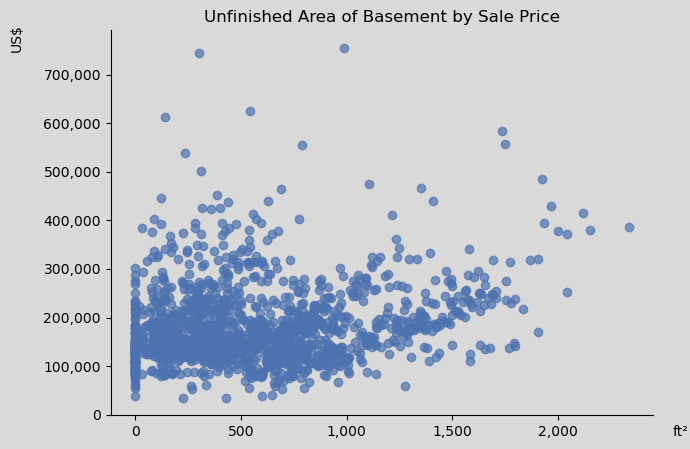

In [172]:
PlotScatter(HousePricesDF['BsmtUnfSF'], HousePricesDF['SalePrice'], "Unfinished Area of Basement by Sale Price", "ft²", "US$", 1, 7)

In [173]:
HousePricesDF.query('BsmtUnfSF > 1990')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
224    225          20       RL        103.0  13472.0   Pave      Reg   
278    279          20       RL        107.0  14450.0   Pave      Reg   
477    478          60       RL        105.0  13693.0   Pave      Reg   
581    582          20       RL         98.0  12704.0   Pave      Reg   
678    679          20       RL         80.0  11844.0   Pave      IR1   
1267  1268          20       RL         89.0  13214.0   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
224          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
278          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
477          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
581          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
678          Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
1267         HLS    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
224        Norm     1Fam     1Story           10            5       2003   
278        Norm     1Fam     1Story            9            5       2006   
477        Norm     1Fam     2Story            9            5       2006   
581        Norm     1Fam     1Story            8            5       2008   
678        Norm     1Fam     1Story            8            5       2008   
1267       Norm     1Fam     1Story            9            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
224           2003       Hip  CompShg     VinylSd     VinylSd    BrkFace   
278           2007     Gable  CompShg     CemntBd     CmentBd    BrkFace   
477           2006       Hip  CompShg     VinylSd     VinylSd    BrkFace   
581           2009       Hip  CompShg     VinylSd     VinylSd    BrkFace   
678           2008       Hip  CompShg     VinylSd     VinylSd      Stone   
1267          2009       Hip  CompShg      Stucco     CmentBd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
224        922.0        Ex        TA      PConc       Ex       TA   
278        315.0        Ex        TA      PConc       Ex       TA   
477        772.0        Ex        TA      PConc       Gd       TA   
581        306.0        Ex        TA      PConc       Ex       TA   
678        464.0        Gd        TA      PConc       Ex       TA   
1267         0.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
224            Gd          GLQ        56.0          Unf         0.0   
278            Gd          Unf         0.0          Unf         0.0   
477            Av          Unf         0.0          Unf         0.0   
581            No          Unf         0.0          Unf         0.0   
678            Mn          Unf         0.0          Unf         0.0   
1267           Gd          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
224      2336.0       2392.0    GasA        Ex          Y      SBrkr   
278      2121.0       2121.0    GasA        Ex          Y      SBrkr   
477      2153.0       2153.0    GasA        Ex          Y      SBrkr   
581      2042.0       2042.0    GasA        Ex          Y      SBrkr   
678      2046.0       2046.0    GasA        Ex          Y      SBrkr   
1267     2002.0       2002.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
224     2392.0       0.0           0.0     2392.0             0             0   
278     2121.0       0.0           0.0     2121.0             0             0   
477     2069.0     574.0           0.0     2643.0             0             0   
581     2042.0       0.0           0.0     2042.0             0             0   
678     2046.0     

### **TotalBsmtSF**

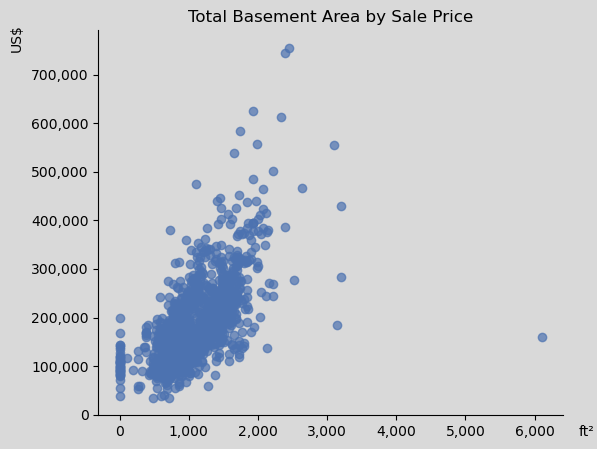

In [175]:
PlotScatter(HousePricesDF['TotalBsmtSF'], HousePricesDF['SalePrice'], "Total Basement Area by Sale Price", "ft²", "US$", 1, 0)

In [176]:
HousePricesDF.query('TotalBsmtSF > 3000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
332    333          20       RL    85.000000  10655.0   Pave      IR1   
440    441          20       RL   105.000000  15431.0   Pave      Reg   
496    497          20       RL    69.644704  12692.0   Pave      IR1   
523    524          60       RL   130.000000  40094.0   Pave      IR1   
1298  1299          60       RL   313.000000  63887.0   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
332          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
440          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
496          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
332        Norm     1Fam     1Story            8            5       2003   
440        Norm     1Fam     1Story           10            5       2008   
496        Norm     1Fam     1Story            8            5       1992   
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
332           2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   
440           2008       Hip  CompShg     VinylSd     VinylSd      Stone   
496           1993       Hip  CompShg     BrkFace     BrkFace       None   
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
332        296.0        Gd        TA      PConc       Gd       TA   
440        200.0        Ex        TA      PConc       Ex       TA   
496          0.0        Gd        TA      PConc       Gd       TA   
523        762.0        Ex        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
332            No          GLQ      1124.0          Unf       479.0   
440            Gd          GLQ      1767.0          ALQ       539.0   
496            No          GLQ      1231.0          Unf         0.0   
523            Gd          GLQ      2260.0          Unf         0.0   
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
332      1603.0       3206.0    GasA        Ex          Y      SBrkr   
440       788.0       3094.0    GasA        Ex          Y      SBrkr   
496      1969.0       3200.0    GasA        Ex          Y      SBrkr   
523       878.0       3138.0    GasA        Ex          Y      SBrkr   
1298      466.0       6110.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
332     1629.0       0.0           0.0     1629.0             1             0   
440     2402.0       0.0           0.0     2402.0             1             0   
496     3228.0       0.0           0.0     3228.0             1             0   
523     3138.0    1538.0           0.0     4676.0             1             0   
1298    4692.0     950.0           0.0     5642.0             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
332          2         0             3             1          Gd   
440          2         0             2             1          Ex   
496          3         0             4             1          Gd   
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplac

### **1stFlrSF**

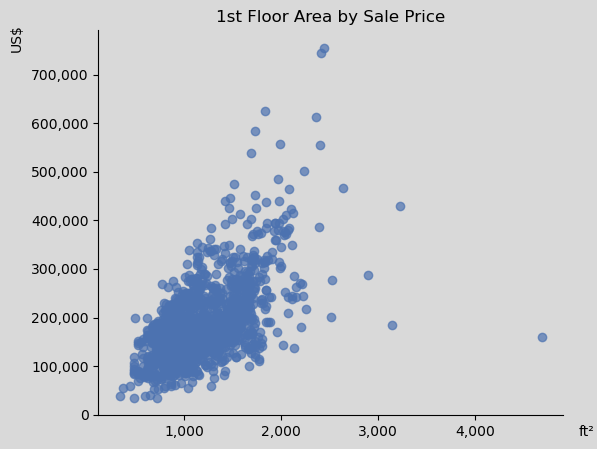

In [178]:
PlotScatter(HousePricesDF['1stFlrSF'], HousePricesDF['SalePrice'], "1st Floor Area by Sale Price", "ft²", "US$", 1, 0)

In [179]:
HousePricesDF.query('`1stFlrSF` > 2500')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
496    497          20       RL    69.644704  12692.0   Pave      IR1   
523    524          60       RL   130.000000  40094.0   Pave      IR1   
529    530          20       RL    69.644704  32668.0   Pave      IR1   
1024  1025          20       RL    69.644704  15498.0   Pave      IR1   
1044  1045          20       RL    80.000000   9600.0   Pave      Reg   
1298  1299          60       RL   313.000000  63887.0   Pave      IR3   
1373  1374          20       RL    69.644704  11400.0   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
496          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
1024         Lvl    AllPub    Corner       Gtl       Timber       Norm   
1044         Lvl    AllPub    Inside       Gtl       NWAmes       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
1373         Lvl    AllPub    Inside       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
496        Norm     1Fam     1Story            8            5       1992   
523        PosN     1Fam     2Story           10            5       2007   
529        Norm     1Fam     1Story            6            3       1957   
1024       Norm     1Fam     1Story            8            6       1976   
1044       Norm     1Fam     1Story            8            5       1981   
1298       Norm     1Fam     2Story           10            5       2008   
1373       Norm     1Fam     1Story           10            5       2001   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
496           1993       Hip  CompShg     BrkFace     BrkFace       None   
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
529           1975       Hip  CompShg     Wd Sdng       Stone       None   
1024          1976       Hip  WdShake       Stone     HdBoard       None   
1044          1981       Hip  WdShngl     BrkFace     BrkFace       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   
1373          2002       Hip  CompShg     VinylSd     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
496          0.0        Gd        TA      PConc       Gd       TA   
523        762.0        Ex        TA      PConc       Ex       TA   
529          0.0        Gd        TA      PConc       TA       TA   
1024         0.0        Gd        TA     CBlock       Gd       TA   
1044         0.0        Gd        TA      PConc       Gd       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   
1373       705.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
496            No          GLQ      1231.0          Unf         0.0   
523            Gd          GLQ      2260.0          Unf         0.0   
529            No          Rec      1219.0          Unf         0.0   
1024           Av          ALQ      1165.0          LwQ       400.0   
1044           No          ALQ      1104.0          Unf         0.0   
1298           Gd          GLQ      5644.0          Unf         0.0   
1373           Gd          GLQ      1282.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
496      1969.0       3200.0    GasA        Ex          Y      SBrkr   
523       878.0       3138.0    GasA        Ex          Y      SBrkr   
529       816.0       2035.0    GasA        TA          Y      SBrkr   
1024        0.0       1565.0    GasA        TA          Y      SBrkr   
1044     1420.0       2524.0    GasA        TA          Y      SBrkr   
1298      466.0       6110.0    GasA        Ex          Y 

### **2ndFlrSF**

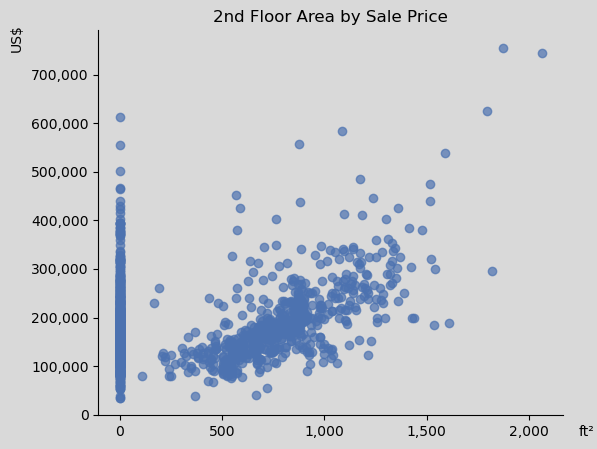

In [181]:
PlotScatter(HousePricesDF['2ndFlrSF'], HousePricesDF['SalePrice'], "2nd Floor Area by Sale Price", "ft²", "US$", 1, 0)

In [182]:
HousePricesDF.query('`2ndFlrSF` > 1750')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
304    305          75       RM         87.0  18386.0   Pave      Reg   
691    692          60       RL        104.0  21535.0   Pave      IR1   
1169  1170          60       RL        118.0  35760.0   Pave      IR1   
1182  1183          60       RL        160.0  15623.0   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
304          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1169         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
304        Norm     1Fam     2.5Fin            7            9       1880   
691        Norm     1Fam     2Story           10            6       1994   
1169       Norm     1Fam     2Story           10            5       1995   
1182       Norm     1Fam     2Story           10            5       1996   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
304           2002     Gable  CompShg     CemntBd     CmentBd       None   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1169          1996       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
304          0.0        TA        TA     BrkTil       TA       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
1169      1378.0        Gd        Gd      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
304            No          Unf         0.0          Unf         0.0   
691            Gd          GLQ      1455.0          Unf         0.0   
1169           Gd          GLQ      1387.0          Unf         0.0   
1182           Av          GLQ      2096.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
304      1470.0       1470.0    GasA        Ex          Y      SBrkr   
691       989.0       2444.0    GasA        Ex          Y      SBrkr   
1169      543.0       1930.0    GasA        Ex          Y      SBrkr   
1182      300.0       2396.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
304     1675.0    1818.0           0.0     3493.0             0             0   
691     2444.0    1872.0           0.0     4316.0             0             1   
1169    1831.0    1796.0           0.0     3627.0             1             0   
1182    2411.0    2065.0           0.0     4476.0             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
304          3         0             3             1          Gd   
691          3         1             4             1          Ex   
1169         3         1             4             1          Gd   
1182         3         1             4             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
304             10        Typ           1          Ex     Attchd         2003   
691             10        Typ           2          Ex     Attchd         1994   
1169            10        Typ           1          TA     Attchd         1995   
1182            10        Typ           2          TA     Attchd         1996   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
304           Unf           3       870.0         TA         TA          Y   
691           Fin           3       832.0         TA         TA          Y   
1169          Fin           3       807.0         TA       

### **LowQualFinSF**

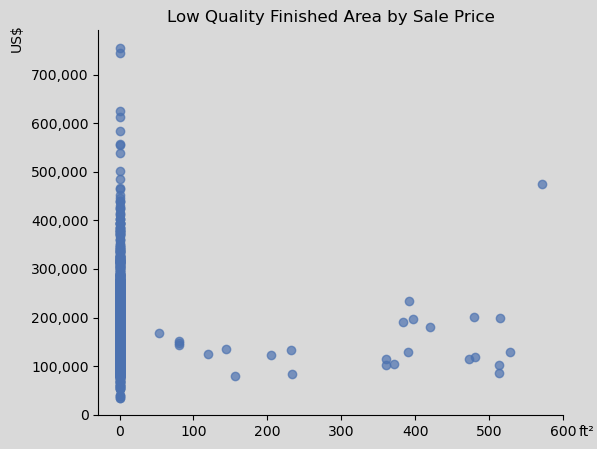

In [184]:
PlotScatter(HousePricesDF['LowQualFinSF'], HousePricesDF['SalePrice'], "Low Quality Finished Area by Sale Price", "ft²", "US$", 1, 0)

### **GrLivArea**

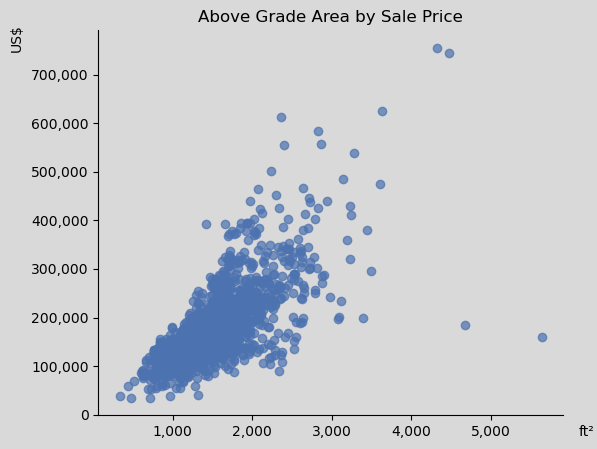

In [186]:
PlotScatter(HousePricesDF['GrLivArea'], HousePricesDF['SalePrice'], "Above Grade Area by Sale Price", "ft²", "US$", 1, 0)

In [187]:
HousePricesDF.query('GrLivArea > 4000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
523    524          60       RL        130.0  40094.0   Pave      IR1   
691    692          60       RL        104.0  21535.0   Pave      IR1   
1182  1183          60       RL        160.0  15623.0   Pave      IR1   
1298  1299          60       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ      2260.0          Unf         0.0   
691            Gd          GLQ      1455.0          Unf         0.0   
1182           Av          GLQ      2096.0          Unf         0.0   
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523       878.0       3138.0    GasA        Ex          Y      SBrkr   
691       989.0       2444.0    GasA        Ex          Y      SBrkr   
1182      300.0       2396.0    GasA        Ex          Y      SBrkr   
1298      466.0       6110.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523     3138.0    1538.0           0.0     4676.0             1             0   
691     2444.0    1872.0           0.0     4316.0             0             1   
1182    2411.0    2065.0           0.0     4476.0             1             0   
1298    4692.0     950.0           0.0     5642.0             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
691          3         1             4             1          Ex   
1182         3         1             4             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn         2007   
691             10        Typ           2          Ex     Attchd         1994   
1182            10        Typ           2          TA     Attchd         1996   
1298            12        Typ           3          Gd     Attchd         2008   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3       884.0         TA         TA          Y   
691           Fin           3       832.0         TA         TA          Y   
1182          Fin           3       813.0         TA       

### **BsmtFullBath**

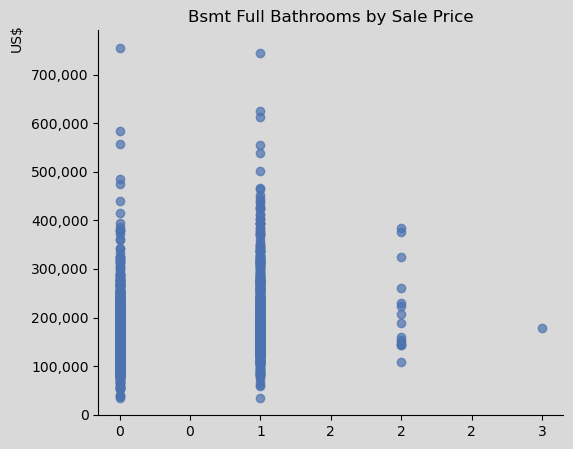

In [189]:
PlotScatter(HousePricesDF['BsmtFullBath'], HousePricesDF['SalePrice'], "Bsmt Full Bathrooms by Sale Price", "", "US$", 1, 0)

In [190]:
HousePricesDF.query('BsmtFullBath > 2')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
738  739          90       RL         60.0  10800.0   Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
738         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
738       Norm   Duplex     1Story            5            5       1987   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
738          1988     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
738         0.0        TA        TA     CBlock       Gd       Gd           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
738          GLQ      1200.0          Unf         0.0        0.0       1200.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
738    GasA        TA          Y      SBrkr    1200.0       0.0           0.0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
738     1200.0             3             0         3         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
738             1          TA             5        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
738        None       None            0         None           0         0.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
738       None       None          Y       120.0          0.0            0.0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  MoSold  YrSold SaleType  \
738        0.0          0.0       0.0   None       3    2009       WD   

    SaleCondition  SalePrice  
738        Alloca   179000.0

### **BsmtHalfBath**

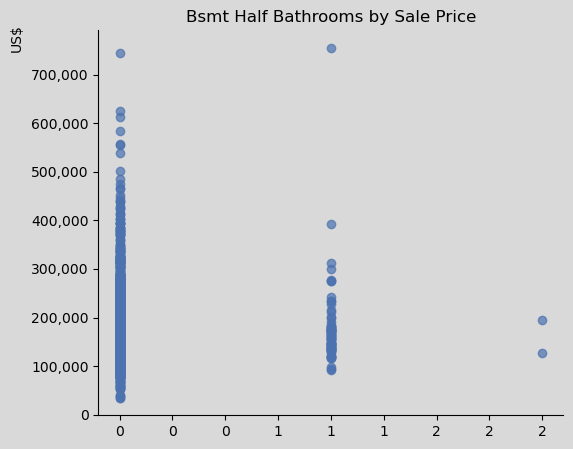

In [192]:
PlotScatter(HousePricesDF['BsmtHalfBath'], HousePricesDF['SalePrice'], "Bsmt Half Bathrooms by Sale Price", "", "US$", 1, 0)

In [193]:
HousePricesDF.query('BsmtHalfBath > 1')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
597  598         120       RL         53.0   3922.0   Pave      Reg   
954  955          90       RL         35.0   9400.0   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
597         Lvl    AllPub    Inside       Gtl      Blmngtn       Norm   
954         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
597       Norm   TwnhsE     1Story            7            5       2006   
954       Norm   Duplex     SFoyer            6            5       1975   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
597          2007     Gable  CompShg     VinylSd     VinylSd    BrkFace   
954          1975      Flat  Tar&Grv     WdShing     Plywood    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
597        72.0        Gd        TA      PConc       Ex       TA           Av   
954       250.0        TA        TA     CBlock       Gd       Gd           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
597          Unf         0.0          Unf         0.0     1258.0       1258.0   
954          GLQ       945.0          Unf         0.0        0.0        945.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
597    GasA        Ex          Y      SBrkr    1402.0       0.0           0.0   
954    GasA        TA          Y      SBrkr     980.0       0.0           0.0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
597     1402.0             0             2         0         2             2   
954      980.0             0             2         2         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
597             1          Gd             7        Typ           1   
954             0          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
597          Gd     Attchd         2006          Fin           3       648.0   
954        None       None            0         None           0         0.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
597         TA         TA          Y       120.0         16.0            0.0   
954       None       None          Y         0.0          0.0            0.0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  MoSold  YrSold SaleType  \
597        0.0          0.0       0.0   None       2    2007      New   
954        0.0          0.0       0.0   None      10    2006       WD   

    SaleCondition  SalePrice  
597       Partial   194201.0  
954       AdjLand   127500.0

### **FullBath**

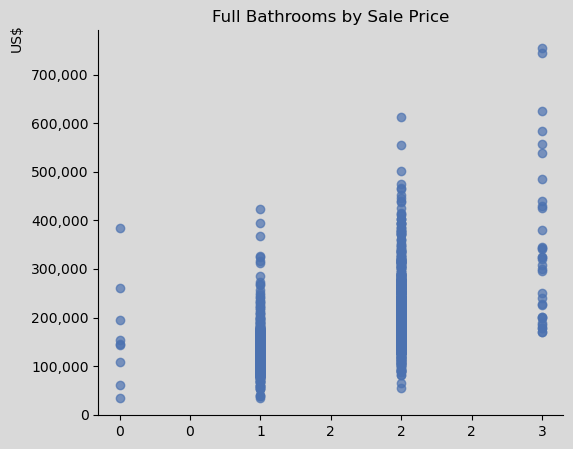

In [195]:
PlotScatter(HousePricesDF['FullBath'], HousePricesDF['SalePrice'], "Full Bathrooms by Sale Price", "", "US$", 1, 0)

### **HalfBath**

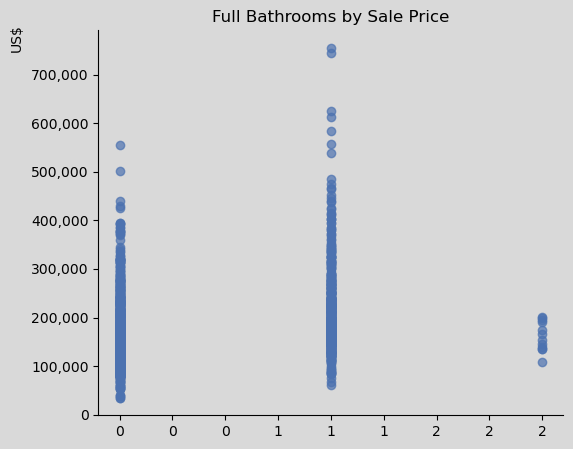

In [197]:
PlotScatter(HousePricesDF['HalfBath'], HousePricesDF['SalePrice'], "Full Bathrooms by Sale Price", "", "US$", 1, 0)

### **BedroomAbvGr**

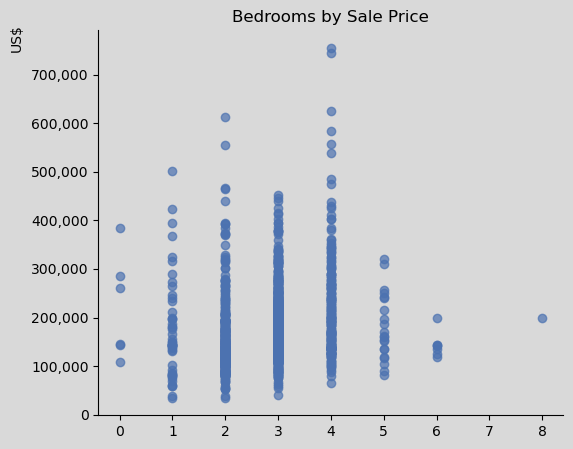

In [199]:
PlotScatter(HousePricesDF['BedroomAbvGr'], HousePricesDF['SalePrice'], "Bedrooms by Sale Price", "", "US$", 1, 0)

In [200]:
HousePricesDF.query('BedroomAbvGr < 1 | BedroomAbvGr > 7')[['Id', 'BedroomAbvGr', 'YrSold', 'SalePrice']]

Id  BedroomAbvGr  YrSold  SalePrice
53      54             0    2006   385000.0
189    190             0    2008   286000.0
634    635             0    2010   144000.0
635    636             8    2007   200000.0
1163  1164             0    2008   108959.0
1213  1214             0    2006   145000.0
1270  1271             0    2010   260000.0

### **KitchenAbvGr**

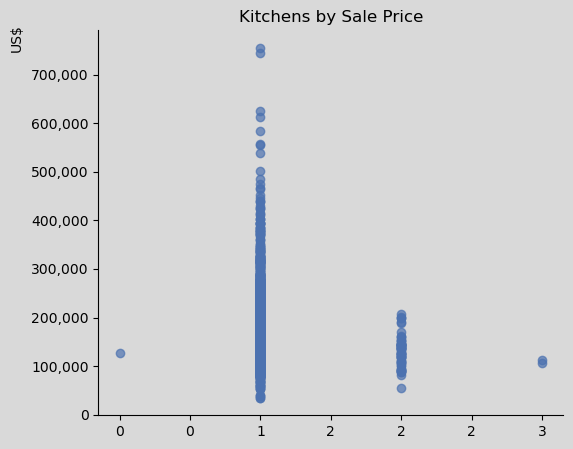

In [202]:
PlotScatter(HousePricesDF['KitchenAbvGr'], HousePricesDF['SalePrice'], "Kitchens by Sale Price", "", "US$", 1, 0)

In [203]:
HousePricesDF.query('KitchenAbvGr < 1 | KitchenAbvGr > 2')[['Id', 'KitchenAbvGr', 'YrSold', 'SalePrice']]

Id  KitchenAbvGr  YrSold  SalePrice
48    49             3    2009   113000.0
809  810             3    2009   106000.0
954  955             0    2006   127500.0

### **TotRmsAbvGrd**

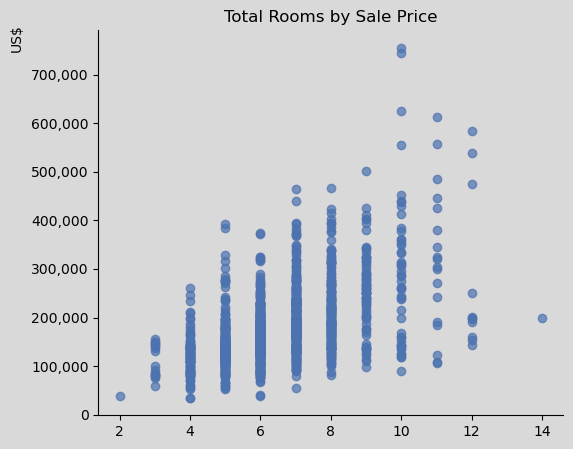

In [205]:
PlotScatter(HousePricesDF['TotRmsAbvGrd'], HousePricesDF['SalePrice'], "Total Rooms by Sale Price", "", "US$", 1, 0)

In [206]:
HousePricesDF.query('TotRmsAbvGrd < 3 | TotRmsAbvGrd > 12')[['Id', 'TotRmsAbvGrd', 'YrSold', 'SalePrice']]

Id  TotRmsAbvGrd  YrSold  SalePrice
533  534             2    2007    39300.0
635  636            14    2007   200000.0

### **Fireplaces**

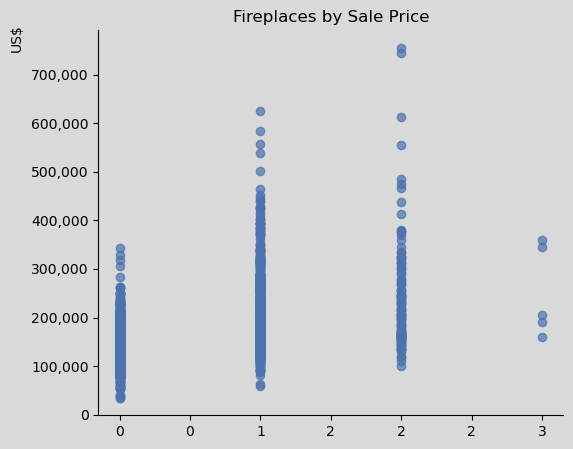

In [208]:
PlotScatter(HousePricesDF['Fireplaces'], HousePricesDF['SalePrice'], "Fireplaces by Sale Price", "", "US$", 1, 0)

In [209]:
HousePricesDF.query('Fireplaces > 2')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
166    167          20       RL    69.644704  10708.0   Pave      IR1   
309    310          20       RL    90.000000  12378.0   Pave      IR1   
605    606          60       RL    85.000000  13600.0   Pave      Reg   
642    643          80       RL    75.000000  13860.0   Pave      Reg   
1298  1299          60       RL   313.000000  63887.0   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
166          Lvl    AllPub    Inside       Gtl      ClearCr       Norm   
309          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
605          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
642          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
166        Norm     1Fam     1Story            5            5       1955   
309        Norm     1Fam     1Story            9            5       2003   
605        Norm     1Fam     2Story            7            6       1965   
642        Norm     1Fam       SLvl            8            7       1972   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
166           1993       Hip  CompShg     Wd Sdng     Wd Sdng       None   
309           2004     Gable  CompShg     VinylSd     VinylSd       None   
605           1990     Gable  CompShg     HdBoard     HdBoard    BrkFace   
642           1995     Gable  CompShg     Plywood     Wd Sdng       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
166          0.0        Gd        TA     CBlock       TA       TA   
309          0.0        Gd        TA      PConc       Ex       TA   
605        176.0        TA        TA     CBlock       TA       TA   
642          0.0        Gd        TA     CBlock       Gd       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
166            No          LwQ       379.0          BLQ       768.0   
309            Gd          GLQ      1274.0          Unf         0.0   
605            No          BLQ       454.0          Unf         0.0   
642            Gd          GLQ      1410.0          Unf         0.0   
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
166       470.0       1617.0    GasA        Ex          Y      FuseA   
309       622.0       1896.0    GasA        Ex          Y      SBrkr   
605       314.0        768.0    GasA        TA          Y      SBrkr   
642       542.0       1952.0    GasA        Gd          Y      SBrkr   
1298      466.0       6110.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
166     1867.0       0.0           0.0     1867.0             1             0   
309     1944.0       0.0           0.0     1944.0             1             0   
605     1186.0     800.0           0.0     1986.0             0             0   
642     2000.0     704.0           0.0     2704.0             1             0   
1298    4692.0     950.0           0.0     5642.0             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
166          1         0             2             1          TA   
309          2         0             3             1          Ex   
605          2         1             3             1          TA   
642          2         1             4             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplac

### **GarageYrBlt**

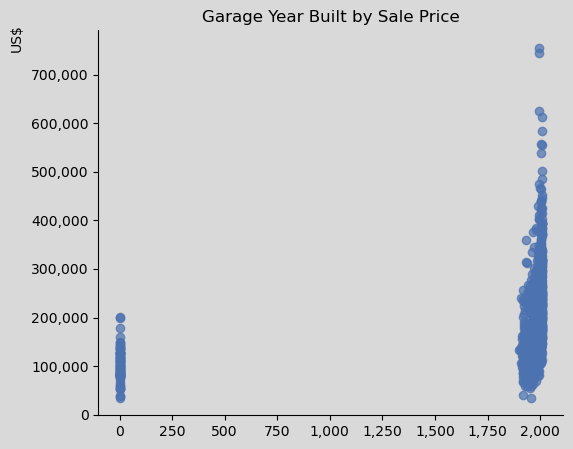

In [211]:
PlotScatter(HousePricesDF['GarageYrBlt'], HousePricesDF['SalePrice'], "Garage Year Built by Sale Price", "", "US$", 1, 0)

### **GarageCars**

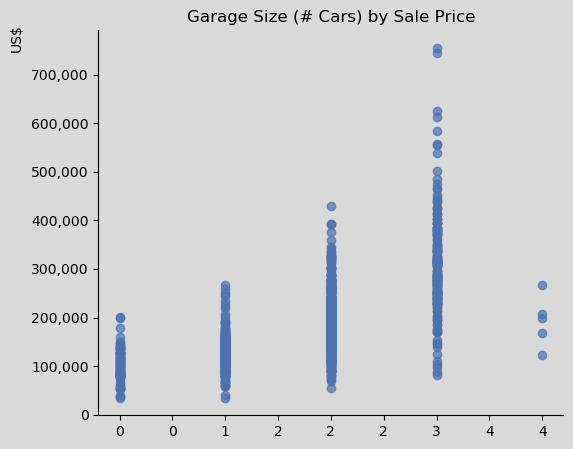

In [213]:
PlotScatter(HousePricesDF['GarageCars'], HousePricesDF['SalePrice'], "Garage Size (# Cars) by Sale Price", "", "US$", 1, 0)

In [214]:
HousePricesDF.query('GarageCars > 3')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
420    421          90       RM    78.000000   7060.0   Pave      Reg   
747    748          70       RM    65.000000  11700.0   Pave      IR1   
1190  1191         190       RL    69.644704  32463.0   Pave      Reg   
1340  1341          20       RL    70.000000   8294.0   Pave      Reg   
1350  1351          90       RL    91.000000  11643.0   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
420          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
747          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1190         Low    AllPub    Inside       Mod      Mitchel       Norm   
1340         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1350         Lvl    AllPub    Inside       Gtl        NAmes     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
420        Norm   Duplex     SFoyer            7            5       1997   
747        Norm     1Fam     2Story            7            7       1880   
1190       Norm   2fmCon     1Story            4            4       1961   
1340       Norm     1Fam     1Story            4            5       1971   
1350       Norm   Duplex     2Story            5            5       1969   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
420           1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
747           2003   Mansard  CompShg      Stucco      Stucco       None   
1190          1975     Gable  CompShg     MetalSd     MetalSd      Stone   
1340          1971     Gable  CompShg     MetalSd     MetalSd       None   
1350          1969     Gable  CompShg     MetalSd     MetalSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
420        200.0        TA        Gd      PConc       Gd       Gd   
747          0.0        Gd        TA      Stone       TA       Fa   
1190       149.0        TA        Gd     CBlock       TA       TA   
1340         0.0        TA        TA     CBlock       TA       TA   
1350       368.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
420            Gd          GLQ      1309.0          Unf         0.0   
747            No          Unf         0.0          Unf         0.0   
1190           Av          BLQ      1159.0          Unf         0.0   
1340           No          Unf         0.0          Unf         0.0   
1350           No          LwQ       500.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
420        35.0       1344.0    GasA        Ex          Y      SBrkr   
747      1240.0       1240.0    GasW        TA          N      SBrkr   
1190       90.0       1249.0    GasA        Ex          Y      SBrkr   
1340      858.0        858.0    GasA        TA          Y      SBrkr   
1350      748.0       1248.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
420     1344.0       0.0           0.0     1344.0             2             0   
747     1320.0    1320.0           0.0     2640.0             0             0   
1190    1622.0       0.0           0.0     1622.0             1             0   
1340     872.0       0.0           0.0      872.0             0             0   
1350    1338.0    1296.0           0.0     2634.0             1             1   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
420          2         0             2             2          TA   
747          1         1             4             1          Gd   
1190         1         0             3             1          TA   
1340         1         0             3             1          TA   
1350         2         2             6             2          TA   

      TotRmsAbvGrd Functional  Fireplac

### **GarageArea**

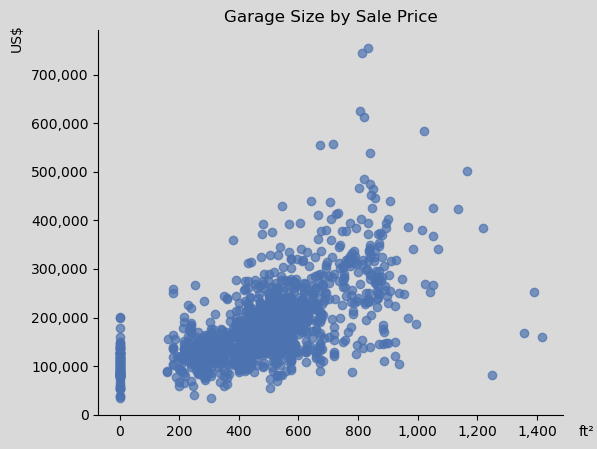

In [216]:
PlotScatter(HousePricesDF['GarageArea'], HousePricesDF['SalePrice'], "Garage Size by Sale Price", "ft²", "US$", 1, 0)

In [217]:
HousePricesDF.query('GarageArea > 1100')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
178    179          20       RL    63.000000  17423.0   Pave      IR1   
581    582          20       RL    98.000000  12704.0   Pave      Reg   
664    665          20       RL    49.000000  20896.0   Pave      IR2   
825    826          20       RL   114.000000  14803.0   Pave      Reg   
1061  1062          30  C (all)   120.000000  18000.0   Grvl      Reg   
1190  1191         190       RL    69.644704  32463.0   Pave      Reg   
1298  1299          60       RL   313.000000  63887.0   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
178          Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
581          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
664          Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
825          Lvl    AllPub    Inside       Gtl      NridgHt       PosN   
1061         Low    AllPub    Inside       Gtl       IDOTRR       Norm   
1190         Low    AllPub    Inside       Mod      Mitchel       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
178        Norm     1Fam     1Story            9            5       2008   
581        Norm     1Fam     1Story            8            5       2008   
664        Norm     1Fam     1Story            8            5       2005   
825        PosN     1Fam     1Story           10            5       2007   
1061       Norm     1Fam     1Story            3            4       1935   
1190       Norm   2fmCon     1Story            4            4       1961   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
178           2009       Hip  CompShg     VinylSd     VinylSd      Stone   
581           2009       Hip  CompShg     VinylSd     VinylSd    BrkFace   
664           2006     Gable  CompShg     VinylSd     VinylSd       None   
825           2008       Hip  CompShg     CemntBd     CmentBd    BrkFace   
1061          1950     Gable  CompShg     MetalSd     MetalSd       None   
1190          1975     Gable  CompShg     MetalSd     MetalSd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
178        748.0        Ex        TA      PConc       Ex       TA   
581        306.0        Ex        TA      PConc       Ex       TA   
664          0.0        Gd        TA      PConc       Ex       TA   
825        816.0        Ex        TA      PConc       Ex       TA   
1061         0.0        Fa        TA     CBlock       TA       TA   
1190       149.0        TA        Gd     CBlock       TA       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
178            No          GLQ      1904.0          Unf         0.0   
581            No          Unf         0.0          Unf         0.0   
664            Mn          GLQ      1721.0          Unf         0.0   
825            Av          GLQ      1636.0          Unf         0.0   
1061           No          Unf         0.0          Unf         0.0   
1190           Av          BLQ      1159.0          Unf         0.0   
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
178       312.0       2216.0    GasA        Ex          Y      SBrkr   
581      2042.0       2042.0    GasA        Ex          Y      SBrkr   
664       356.0       2077.0    GasA        Ex          Y      SBrkr   
825       442.0       2078.0    GasA        Ex          Y      SBrkr   
1061      894.0        894.0    GasA        TA          Y      SBrkr   
1190       90.0       1249.0    GasA        Ex          Y 

### **WoodDeckSF**

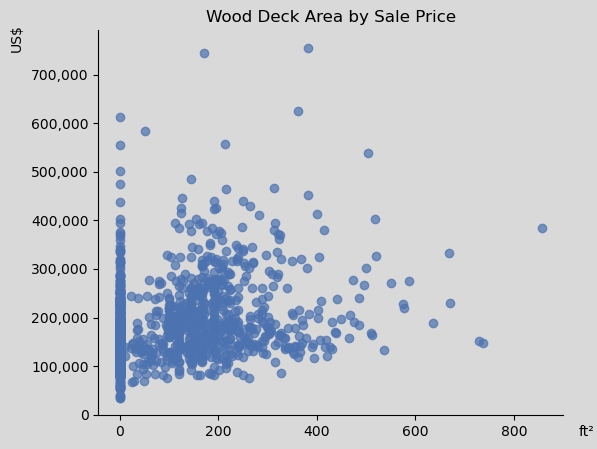

In [219]:
PlotScatter(HousePricesDF['WoodDeckSF'], HousePricesDF['SalePrice'], "Wood Deck Area by Sale Price", "ft²", "US$", 1, 0)

In [220]:
HousePricesDF.query('WoodDeckSF > 600')

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
53      54          20       RL    68.000000   50271.0   Pave      IR1   
335    336         190       RL    69.644704  164660.0   Grvl      IR1   
1068  1069         160       RM    42.000000    3964.0   Pave      Reg   
1210  1211          60       RL    70.000000   11218.0   Pave      Reg   
1313  1314          60       RL   108.000000   14774.0   Pave      IR1   
1459  1460          20       RL    75.000000    9937.0   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
335          HLS    AllPub    Corner       Sev       Timber       Norm   
1068         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1210         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
1313         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
53         Norm     1Fam     1Story            9            5       1981   
335        Norm   2fmCon     1.5Fin            5            6       1965   
1068       Norm   TwnhsE     2Story            6            4       1973   
1210       Norm     1Fam     2Story            6            5       1992   
1313       Norm     1Fam     2Story            9            5       1999   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
53            1987     Gable  WdShngl     WdShing     Wd Shng       None   
335           1965     Gable  CompShg     Plywood     Plywood       None   
1068          1973     Gable  CompShg     CemntBd     CmentBd       None   
1210          1992     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1313          1999     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
53           0.0        Gd        TA     CBlock       Ex       TA   
335          0.0        TA        TA     CBlock       TA       TA   
1068         0.0        TA        TA     CBlock       Gd       TA   
1210         0.0        Gd        TA      PConc       Gd       TA   
1313       165.0        Gd        TA      PConc       Gd       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
53             Gd          GLQ      1810.0          Unf         0.0   
335            Gd          ALQ      1249.0          BLQ       147.0   
1068           No          ALQ       837.0          Unf         0.0   
1210           No          Unf         0.0          Unf         0.0   
1313           No          Unf         0.0          Unf         0.0   
1459           No          BLQ       830.0          LwQ       290.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
53         32.0       1842.0    GasA        Gd          Y      SBrkr   
335       103.0       1499.0    GasA        Ex          Y      SBrkr   
1068      105.0        942.0    GasA        Gd          Y      SBrkr   
1210     1055.0       1055.0    GasA        Ex          Y      SBrkr   
1313     1393.0       1393.0    GasA        Ex          Y      SBrkr   
1459      136.0       1256.0    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
53      1842.0       0.0           0.0     1842.0             2             0   
335     1619.0     167.0           0.0     1786.0             2             0   
1068    1291.0    1230.0           0.0     2521.0             1             0   
1210    1055.0     790.0           0.0     1845.0             0             0   
1313    1422

### **OpenPorchSF**

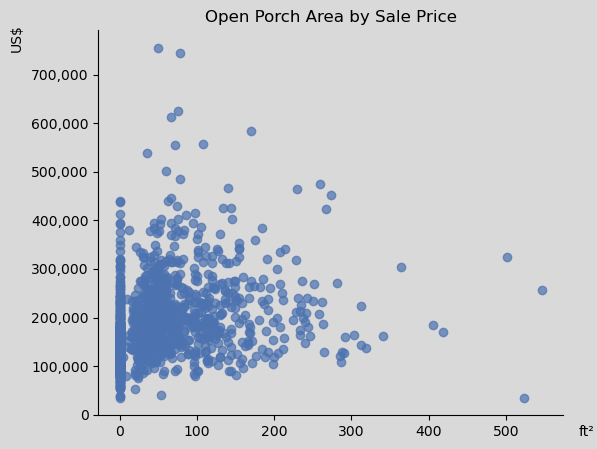

In [222]:
PlotScatter(HousePricesDF['OpenPorchSF'], HousePricesDF['SalePrice'], "Open Porch Area by Sale Price", "ft²", "US$", 1, 0)

In [223]:
HousePricesDF.query('OpenPorchSF > 350')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
495    496          30  C (all)         60.0   7879.0   Pave      Reg   
523    524          60       RL        130.0  40094.0   Pave      IR1   
583    584          75       RM         75.0  13500.0   Pave      Reg   
854    855          20       RL        102.0  17920.0   Pave      Reg   
875    876          60       FV         75.0   9000.0   Pave      Reg   
1328  1329          50       RM         60.0  10440.0   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
495          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
583          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
854          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
875          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1328         Lvl    AllPub    Corner       Gtl      OldTown       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
495        Norm     1Fam     1Story            4            5       1920   
523        PosN     1Fam     2Story           10            5       2007   
583        PosA     1Fam     2.5Unf           10            9       1893   
854        Norm     1Fam     1Story            5            4       1955   
875        Norm     1Fam     2Story            8            5       2007   
1328       Norm     1Fam     1.5Fin            6            7       1920   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
495           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
583           2000     Gable  CompShg     Wd Sdng     Wd Sdng       None   
854           1974       Hip  CompShg     Wd Sdng     Plywood       None   
875           2007     Gable  CompShg     CemntBd     CmentBd       None   
1328          1950     Gable  CompShg     BrkFace     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
495          0.0        TA        TA     CBlock       TA       TA   
523        762.0        Ex        TA      PConc       Ex       TA   
583          0.0        Ex        Ex     BrkTil       TA       TA   
854          0.0        TA        TA     CBlock       TA       TA   
875          0.0        Gd        TA      PConc       Gd       TA   
1328         0.0        Gd        Gd     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
495            No          Rec       495.0          Unf         0.0   
523            Gd          GLQ      2260.0          Unf         0.0   
583            No          Unf         0.0          Unf         0.0   
854            Mn          ALQ       306.0          Rec      1085.0   
875            Av          GLQ        64.0          Unf         0.0   
1328           No          LwQ       493.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
495       225.0        720.0    GasA        TA          N      FuseA   
523       878.0       3138.0    GasA        Ex          Y      SBrkr   
583      1237.0       1237.0    GasA        Gd          Y      SBrkr   
854       372.0       1763.0    GasA        TA          Y      SBrkr   
875      1120.0       1184.0    GasA        Ex          Y      SBrkr   
1328     1017.0       1510.0    GasW        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
495      720.0       0.0           0.0      720.0             0             0   
523     3138.0    1538.0           0.0     4676.0             1             0   
583     1521.0    1254.0           0.0     2775.0             0             0   
854     1779.0       0.0           0.0     1779.0             1             0   
875     1184.0    1

### **EnclosedPorch**

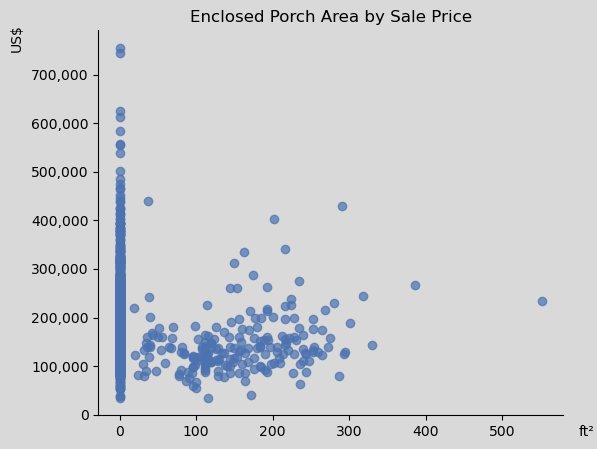

In [225]:
PlotScatter(HousePricesDF['EnclosedPorch'], HousePricesDF['SalePrice'], "Enclosed Porch Area by Sale Price", "ft²", "US$", 1, 0)

In [226]:
HousePricesDF.query('EnclosedPorch > 350')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
197  198          75       RL        174.0  25419.0   Pave      Reg   
747  748          70       RM         65.0  11700.0   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
197         Lvl    AllPub    Corner       Gtl        NAmes     Artery   
747         Lvl    AllPub    Corner       Gtl      OldTown       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
197       Norm     1Fam     2Story            8            4       1918   
747       Norm     1Fam     2Story            7            7       1880   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
197          1990     Gable  CompShg      Stucco      Stucco       None   
747          2003   Mansard  CompShg      Stucco      Stucco       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
197         0.0        Gd        Gd      PConc       TA       TA           No   
747         0.0        Gd        TA      Stone       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
197          GLQ      1036.0          LwQ       184.0      140.0       1360.0   
747          Unf         0.0          Unf         0.0     1240.0       1240.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
197    GasA        Gd          Y      SBrkr    1360.0    1360.0         392.0   
747    GasW        TA          N      SBrkr    1320.0    1320.0           0.0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
197     3112.0             1             1         2         0             4   
747     2640.0             0             0         1         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
197             1          Gd             8        Typ           1   
747             1          Gd             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
197          Ex     Detchd         1918          Unf           2       795.0   
747          Gd     Detchd         1950          Unf           4       864.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
197         TA         TA          Y         0.0         16.0          552.0   
747         TA         TA          N       181.0          0.0          386.0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  MoSold  YrSold SaleType  \
197        0.0          0.0     512.0     Ex       3    2006       WD   
747        0.0          0.0       0.0   None       5    2009       WD   

    SaleCondition  SalePrice  
197       Abnorml   235000.0  
747        Normal   265979.0

### **3SsnPorch**

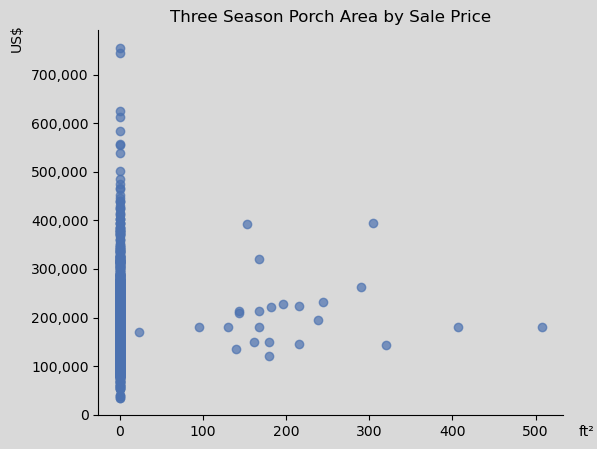

In [228]:
PlotScatter(HousePricesDF['3SsnPorch'], HousePricesDF['SalePrice'], "Three Season Porch Area by Sale Price", "ft²", "US$", 1, 0)

### **ScreenPorch**

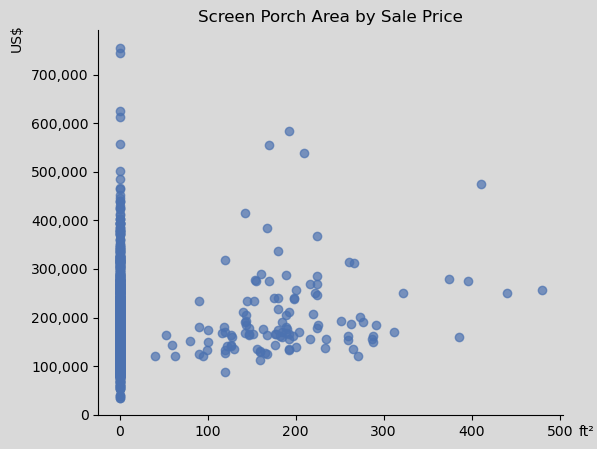

In [230]:
PlotScatter(HousePricesDF['ScreenPorch'], HousePricesDF['SalePrice'], "Screen Porch Area by Sale Price", "ft²", "US$", 1, 0)

In [231]:
HousePricesDF.query('ScreenPorch > 350')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
185    186          75       RM    90.000000  22950.0   Pave      IR2   
359    360          60       RL    78.000000  12011.0   Pave      IR1   
426    427          80       RL    69.644704  12800.0   Pave      Reg   
625    626          20       RL    87.000000  10000.0   Pave      IR1   
1328  1329          50       RM    60.000000  10440.0   Pave      Reg   
1386  1387          60       RL    80.000000  16692.0   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
359          Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
426          Low    AllPub    Inside       Mod      SawyerW       Norm   
625          Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1328         Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1386         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185        Norm     1Fam     2.5Fin           10            9       1892   
359        Norm     1Fam     2Story            8            5       1998   
426        Norm     1Fam       SLvl            7            5       1989   
625        Norm     1Fam     1Story            6            6       1962   
1328       Norm     1Fam     1.5Fin            6            7       1920   
1386       Norm     1Fam     2Story            7            5       1978   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185           1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None   
359           1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
426           1989     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
625           1962       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1328          1950     Gable  CompShg     BrkFace     Wd Sdng       None   
1386          1978     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
185          0.0        Gd        Gd     BrkTil       TA       TA   
359        530.0        Gd        TA      PConc       Gd       TA   
426        145.0        Gd        TA      PConc       Gd       TA   
625        261.0        TA        TA     CBlock       TA       TA   
1328         0.0        Gd        Gd     BrkTil       Gd       TA   
1386       184.0        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
185            Mn          Unf         0.0          Unf         0.0   
359            Av          GLQ       956.0          Unf         0.0   
426            Gd          GLQ      1518.0          Unf         0.0   
625            No          Unf         0.0          Unf         0.0   
1328           No          LwQ       493.0          Unf         0.0   
1386           No          BLQ       790.0          LwQ       469.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
185      1107.0       1107.0    GasA        Ex          Y      SBrkr   
359       130.0       1086.0    GasA        Ex          Y      SBrkr   
426         0.0       1518.0    GasA        Gd          Y      SBrkr   
625      1116.0       1116.0    GasA        TA          Y      SBrkr   
1328     1017.0       1510.0    GasW        Ex          Y      SBrkr   
1386      133.0       1392.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
185     1518.0    1518.0         572.0     3608.0             0             0   
359     1086.0     838.0           0.0     1924.0             1             0   
426     1644.0       0.0           0.0     1644.0             1             1   
625     1116.0       0.0           0.0     1116.0             0             0   
1328    1584.0    1

### **PoolArea**

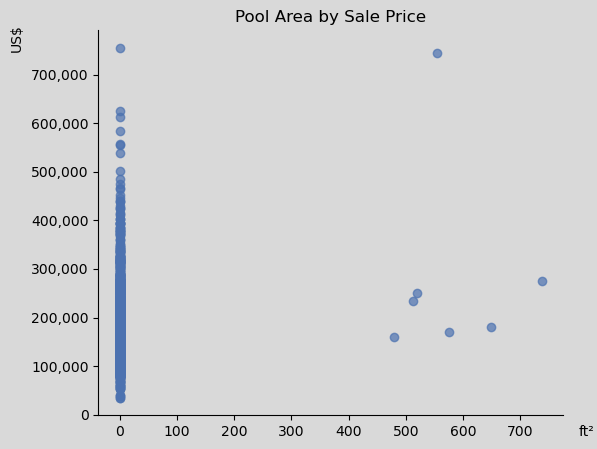

In [233]:
PlotScatter(HousePricesDF['PoolArea'], HousePricesDF['SalePrice'], "Pool Area by Sale Price", "ft²", "US$", 1, 0)

### **MoSold**

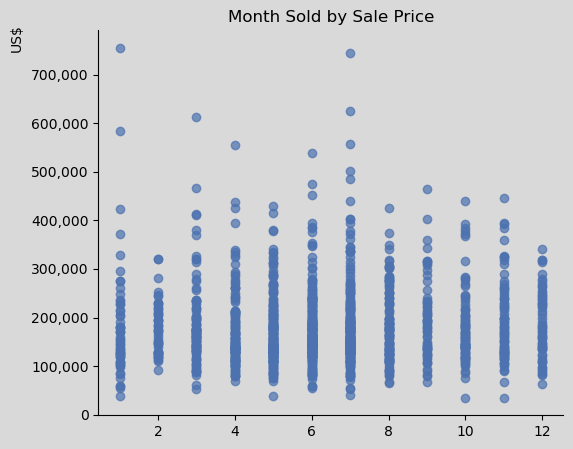

In [235]:
PlotScatter(HousePricesDF['MoSold'], HousePricesDF['SalePrice'], "Month Sold by Sale Price", "", "US$", 0, 0)

### **YrSold**

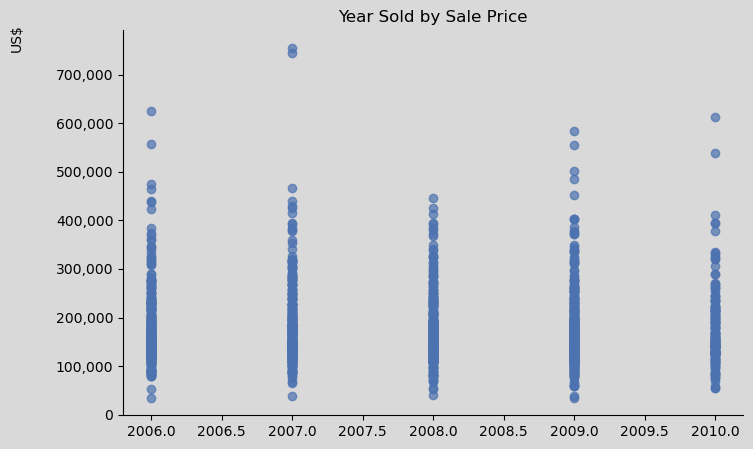

In [237]:
PlotScatter(HousePricesDF['YrSold'], HousePricesDF['SalePrice'], "Year Sold by Sale Price", "", "US$", 0, 8)

### **Dropping the Outliers**

In [239]:
values = [49, 54, 59, 71, 106, 116, 167, 186, 189, 198, 250, 298, 305, 314, 323, 333, 336, 360, 385, 421, 427, 452, 458, 496, 518,
          524, 530, 534, 582, 584, 598, 606, 626, 635, 636, 662, 692, 707, 739, 748, 756, 770, 809, 810, 849, 855, 876, 935,
          955, 982, 1025, 1045, 1062, 1069, 1164, 1170, 1183, 1191, 1211, 1214, 1271, 1290, 1299, 1314, 1329, 1341, 1351, 1387, 1397, 1460]

HousePricesDF = HousePricesDF[HousePricesDF.Id.isin(values) == False].copy()

In [240]:
HousePricesDF.reset_index(drop=True, inplace=True)

In [241]:
HousePricesDF.shape

(1390, 77)

# **EXPLORATORY DATA ANALYSIS**

In [243]:
HousePricesDF3 = HousePricesDF.copy()

## **ENCODING AND CORRELATION ANALYSIS**

We will use K-Fold Target Encoding to encode categorical variables, considering the weight of their categories in relation to the target variable.

### **IDENTIFYING CATEGORICAL FEATURE CARDINALITY**

We will follow these steps when analyzing categorical variables:<br>

1. Identify categories with low cardinality (proportion < 1%);
2. Group rare categories into a single 'Other' category;
3. If the proportion of 'Other' is still below 1%, assess whether it is feasible to merge it with another category;
4. Apply K-Fold Target Encoding with 5 folds.

#### **MSSubClass**

In [249]:
HousePricesDF['MSSubClass'].value_counts(normalize=True) * 100

MSSubClass
20     37.194245
60     20.000000
50     10.143885
120     6.187050
30      4.820144
160     4.316547
70      4.244604
80      3.956835
90      3.237410
190     1.870504
85      1.438849
45      0.863309
75      0.791367
180     0.719424
40      0.215827
Name: proportion, dtype: float64

In [250]:
HousePricesDF['MSSubClass'] = HousePricesDF['MSSubClass'].replace({45: "Other", 75: "Other", 180: "Other", 40: "Other"})
HousePricesDF_test['MSSubClass'] = HousePricesDF_test['MSSubClass'].replace({45: "Other", 75: "Other", 180: "Other", 40: "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'MSSubClass', 'SalePrice')

<Figure size 600x500 with 0 Axes>

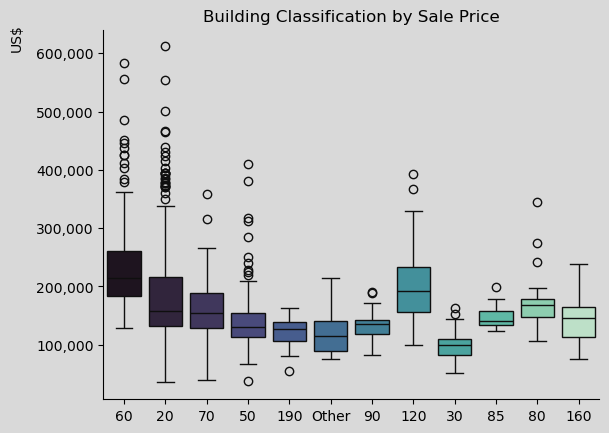


Correlation: 0.4971422927692028


In [251]:
PlotBoxPlot(HousePricesDF['MSSubClass'], HousePricesDF['SalePrice'], "Building Classification by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MSSubClass_E']))

In [252]:
HousePricesDF['MSSubClass'] = HousePricesDF['MSSubClass_E'].copy()
HousePricesDF = HousePricesDF.drop('MSSubClass_E', axis = 1)

#### **MSZoning**

In [254]:
HousePricesDF['MSZoning'].value_counts(normalize=True) * 100

MSZoning
RL         78.992806
RM         15.035971
FV          4.316547
RH          1.079137
C (all)     0.575540
Name: proportion, dtype: float64

In [255]:
HousePricesDF.groupby('MSZoning')[['SalePrice']].mean()

SalePrice
MSZoning               
C (all)    78672.500000
FV        212832.283333
RH        126995.600000
RL        187473.075592
RM        121260.239234

Since the average value of the target variable for 'RH' is nearly double that of 'C', we will not merge them into an 'Other' category.

In [257]:
KFTE(HousePricesDF, HousePricesDF_test, 'MSZoning', 'SalePrice')

<Figure size 600x500 with 0 Axes>

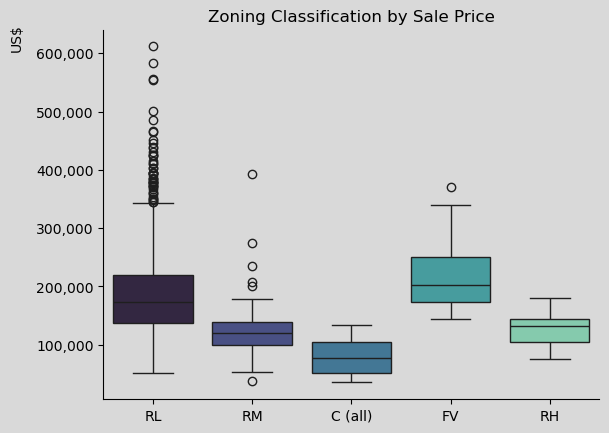


Correlation: 0.34950849294012604


In [258]:
PlotBoxPlot(HousePricesDF['MSZoning'], HousePricesDF['SalePrice'], "Zoning Classification by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MSZoning_E']))

In [259]:
HousePricesDF['MSZoning'] = HousePricesDF['MSZoning_E'].copy()
HousePricesDF = HousePricesDF.drop('MSZoning_E', axis = 1)

#### **LotFrontage**

<Figure size 600x500 with 0 Axes>

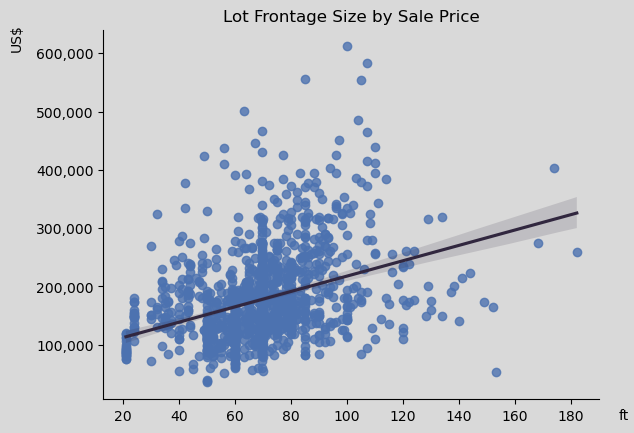


Correlation: 0.35107885902399466


In [261]:
PlotRegPlot(HousePricesDF['LotFrontage'], HousePricesDF['SalePrice'], "Lot Frontage Size by Sale Price", "ft", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotFrontage']))

#### **LotArea**

<Figure size 600x500 with 0 Axes>

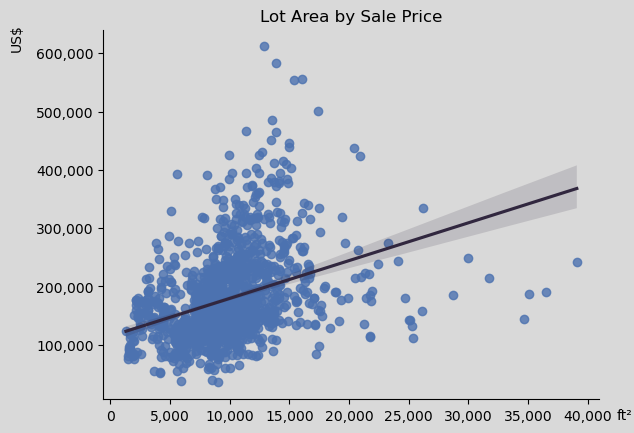


Correlation: 0.35913376863413704


In [263]:
PlotRegPlot(HousePricesDF['LotArea'], HousePricesDF['SalePrice'], "Lot Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotArea']))

#### **Street**

In [265]:
HousePricesDF['Street'].value_counts(normalize=True) * 100

Street
Pave    99.71223
Grvl     0.28777
Name: proportion, dtype: float64

In [266]:
HousePricesDF = HousePricesDF.drop('Street', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('Street', axis = 1)

#### **LotShape**

In [268]:
HousePricesDF['LotShape'].value_counts(normalize=True) * 100

LotShape
Reg    64.172662
IR1    32.949640
IR2     2.302158
IR3     0.575540
Name: proportion, dtype: float64

In [269]:
HousePricesDF.groupby('LotShape')[['SalePrice']].mean()

SalePrice
LotShape               
IR1       200751.604803
IR2       208699.625000
IR3       203170.625000
Reg       163951.894619

In [270]:
HousePricesDF['LotShape'] = HousePricesDF['LotShape'].replace({"IR2": "Other", "IR3": "Other"})
HousePricesDF_test['LotShape'] = HousePricesDF_test['LotShape'].replace({"IR2": "Other", "IR3": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'LotShape', 'SalePrice')

<Figure size 600x500 with 0 Axes>

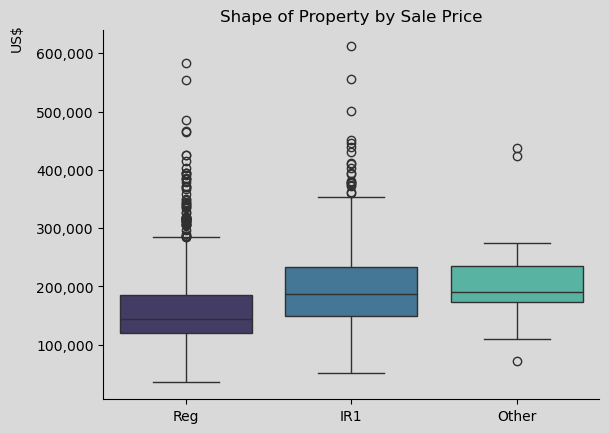


Correlation: 0.2344564621583354


In [271]:
PlotBoxPlot(HousePricesDF['LotShape'], HousePricesDF['SalePrice'], "Shape of Property by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotShape_E']))

In [272]:
HousePricesDF['LotShape'] = HousePricesDF['LotShape_E'].copy()
HousePricesDF = HousePricesDF.drop('LotShape_E', axis = 1)

#### **LandContour**

In [274]:
HousePricesDF['LandContour'].value_counts(normalize=True) * 100

LandContour
Lvl    90.863309
Bnk     4.100719
HLS     3.309353
Low     1.726619
Name: proportion, dtype: float64

In [275]:
KFTE(HousePricesDF, HousePricesDF_test, 'LandContour', 'SalePrice')

<Figure size 600x500 with 0 Axes>

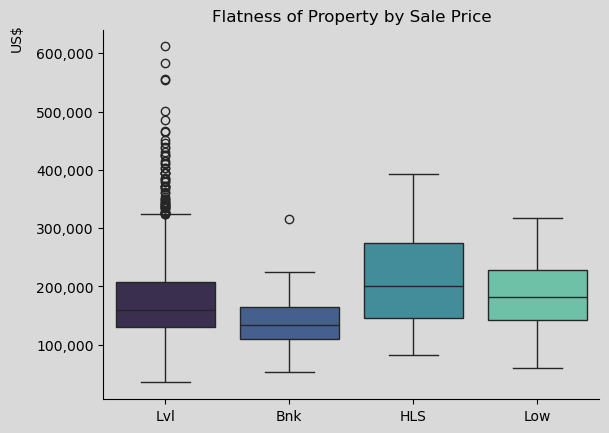


Correlation: 0.1275710310614651


In [276]:
PlotBoxPlot(HousePricesDF['LandContour'], HousePricesDF['SalePrice'], "Flatness of Property by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LandContour_E']))

In [277]:
HousePricesDF['LandContour'] = HousePricesDF['LandContour_E'].copy()
HousePricesDF = HousePricesDF.drop('LandContour_E', axis = 1)

#### **Utilities**

In [280]:
HousePricesDF['Utilities'].value_counts(normalize=True) * 100

Utilities
AllPub    99.928058
NoSeWa     0.071942
Name: proportion, dtype: float64

In [281]:
HousePricesDF = HousePricesDF.drop('Utilities', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('Utilities', axis = 1)

#### **LotConfig**

In [283]:
HousePricesDF['LotConfig'].value_counts(normalize=True) * 100

LotConfig
Inside     72.446043
Corner     17.913669
CulDSac     5.971223
FR2         3.381295
FR3         0.287770
Name: proportion, dtype: float64

In [284]:
HousePricesDF.groupby('LotConfig')[['SalePrice']].mean()

SalePrice
LotConfig               
Corner     174629.975904
CulDSac    210246.144578
FR2        177934.574468
FR3        208475.000000
Inside     175137.000000

In [285]:
KFTE(HousePricesDF, HousePricesDF_test, 'LotConfig', 'SalePrice')

<Figure size 600x500 with 0 Axes>

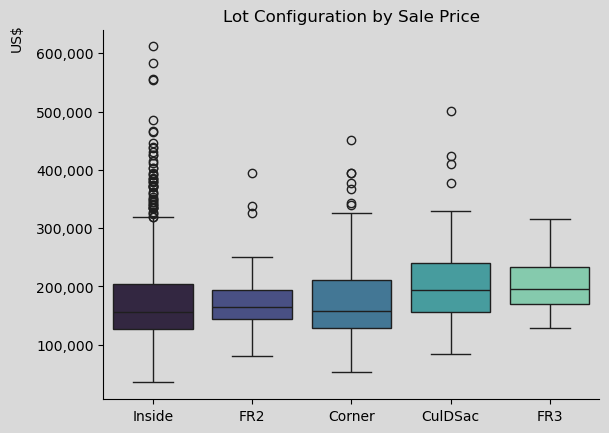


Correlation: 0.08284567030125882


In [286]:
PlotBoxPlot(HousePricesDF['LotConfig'], HousePricesDF['SalePrice'], "Lot Configuration by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotConfig_E']))

In [287]:
HousePricesDF = HousePricesDF.drop(columns = {'LotConfig', 'LotConfig_E'}, axis = 1)

In [288]:
HousePricesDF_test = HousePricesDF_test.drop(columns = {'LotConfig'}, axis = 1)

#### **LandSlope**

In [290]:
HousePricesDF['LandSlope'].value_counts(normalize=True) * 100

LandSlope
Gtl    95.395683
Mod     4.100719
Sev     0.503597
Name: proportion, dtype: float64

In [291]:
HousePricesDF.groupby('LandSlope')[['SalePrice']].mean()

SalePrice
LandSlope               
Gtl        176990.708145
Mod        188586.298246
Sev        150568.571429

In [292]:
HousePricesDF['LandSlope'] = HousePricesDF['LandSlope'].replace({"Mod": "Other", "Sev": "Other"})
HousePricesDF_test['LandSlope'] = HousePricesDF_test['LandSlope'].replace({"Mod": "Other", "Sev": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'LandSlope', 'SalePrice')

<Figure size 600x500 with 0 Axes>

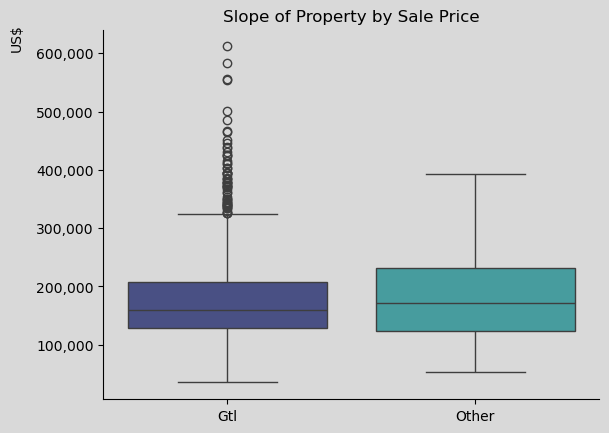


Correlation: -0.03776123696658219


In [293]:
PlotBoxPlot(HousePricesDF['LandSlope'], HousePricesDF['SalePrice'], "Slope of Property by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LandSlope_E']))

In [294]:
HousePricesDF = HousePricesDF.drop(columns = {'LandSlope', 'LandSlope_E'}, axis = 1)

In [295]:
HousePricesDF_test = HousePricesDF_test.drop('LandSlope', axis = 1)

#### **Neighborhood**

In [297]:
HousePricesDF['Neighborhood'].value_counts(normalize=True) * 100

Neighborhood
NAmes      15.611511
CollgCr    10.791367
OldTown     7.553957
Edwards     6.834532
Somerst     5.827338
Gilbert     5.683453
NridgHt     5.323741
NWAmes      5.107914
Sawyer      5.107914
BrkSide     4.100719
SawyerW     3.956835
Crawfor     3.597122
Mitchel     3.381295
IDOTRR      2.517986
Timber      2.446043
NoRidge     2.374101
SWISU       1.726619
StoneBr     1.654676
ClearCr     1.438849
MeadowV     1.151079
Blmngtn     1.151079
BrDale      1.151079
Veenker     0.719424
NPkVill     0.647482
Blueste     0.143885
Name: proportion, dtype: float64

In [298]:
HousePricesDF['Neighborhood'] = HousePricesDF['Neighborhood'].replace({"Veenker": "Other", "NPkVill": "Other", "Blueste": "Other"})
HousePricesDF_test['Neighborhood'] = HousePricesDF_test['Neighborhood'].replace({"Veenker": "Other", "NPkVill": "Other", "Blueste": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Neighborhood', 'SalePrice')

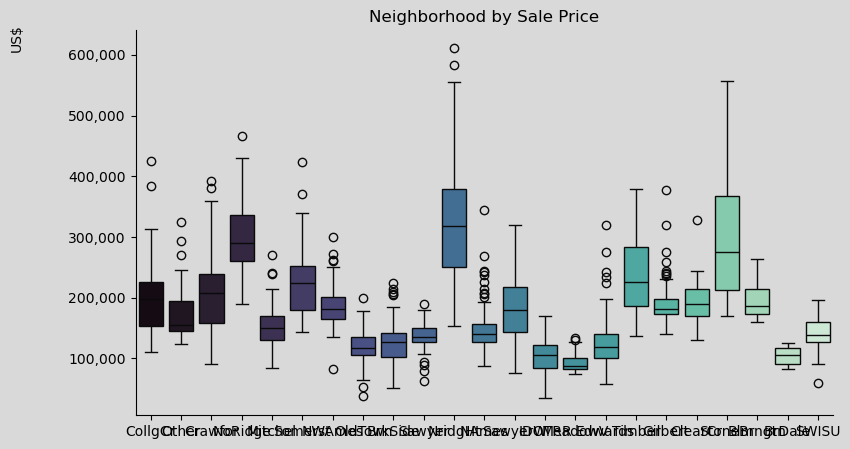


Correlation: 0.7456913492073306


In [299]:
PlotBoxPlotV2(HousePricesDF['Neighborhood'], HousePricesDF['SalePrice'], "Neighborhood by Sale Price", "US$", 9, 5)
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Neighborhood_E']))

In [300]:
HousePricesDF['Neighborhood'] = HousePricesDF['Neighborhood_E'].copy()
HousePricesDF = HousePricesDF.drop('Neighborhood_E', axis = 1)

#### **Condition1**

In [302]:
HousePricesDF['Condition1'].value_counts(normalize=True) * 100

Condition1
Norm      86.546763
Feedr      5.467626
Artery     3.165468
RRAn       1.798561
PosN       1.223022
RRAe       0.791367
PosA       0.503597
RRNn       0.359712
RRNe       0.143885
Name: proportion, dtype: float64

In [303]:
HousePricesDF['Condition1'] = HousePricesDF['Condition1'].replace({"RRAe": "Other", "PosA": "Other", "RRNn": "Other", "RRNe": "Other"})
HousePricesDF_test['Condition1'] = HousePricesDF_test['Condition1'].replace({"RRAe": "Other", "PosA": "Other", "RRNn": "Other", "RRNe": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Condition1', 'SalePrice')

<Figure size 600x500 with 0 Axes>

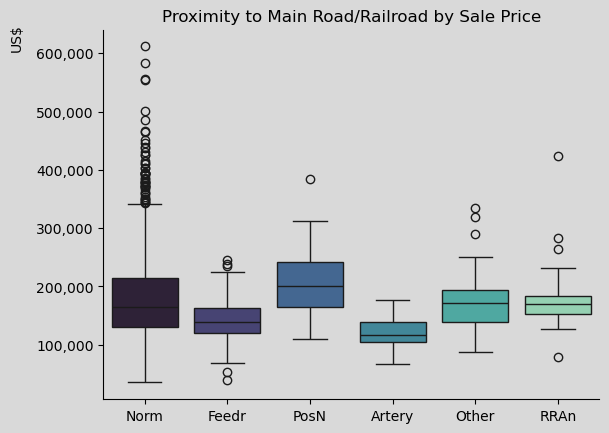


Correlation: 0.18313846349899504


In [304]:
PlotBoxPlot(HousePricesDF['Condition1'], HousePricesDF['SalePrice'], "Proximity to Main Road/Railroad by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Condition1_E']))

In [305]:
HousePricesDF['Condition1'] = HousePricesDF['Condition1_E'].copy()
HousePricesDF = HousePricesDF.drop('Condition1_E', axis = 1)

#### **Condition2**

In [307]:
HousePricesDF['Condition2'].value_counts(normalize=True) * 100

Condition2
Norm      99.064748
Feedr      0.431655
Artery     0.143885
RRNn       0.143885
PosN       0.071942
RRAn       0.071942
RRAe       0.071942
Name: proportion, dtype: float64

In [308]:
HousePricesDF['Condition2'] = HousePricesDF['Condition2'].replace({"Norm": 1, "Feedr": 0, "Artery": 0, "RRNn": 0, "PosN": 0, "RRAn": 0, "RRAe": 0})
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Condition2']))

Correlation: 0.04655285618520171


In [309]:
HousePricesDF = HousePricesDF.drop('Condition2', axis = 1)

In [310]:
HousePricesDF_test = HousePricesDF_test.drop('Condition2', axis = 1)

#### **BldgType**

In [312]:
HousePricesDF['BldgType'].value_counts(normalize=True) * 100

BldgType
1Fam      83.812950
TwnhsE     7.913669
Duplex     3.237410
Twnhs      3.093525
2fmCon     1.942446
Name: proportion, dtype: float64

In [313]:
KFTE(HousePricesDF, HousePricesDF_test, 'BldgType', 'SalePrice')

<Figure size 600x500 with 0 Axes>

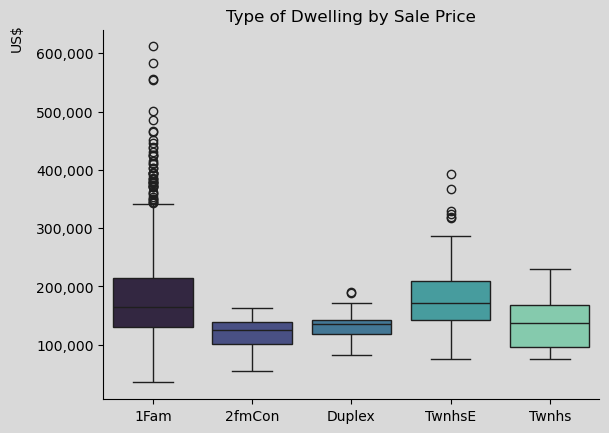


Correlation: 0.18388738547661418


In [314]:
PlotBoxPlot(HousePricesDF['BldgType'], HousePricesDF['SalePrice'], "Type of Dwelling by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BldgType_E']))

In [315]:
HousePricesDF['BldgType'] = HousePricesDF['BldgType_E'].copy()
HousePricesDF = HousePricesDF.drop('BldgType_E', axis = 1)

#### **HouseStyle**

In [317]:
HousePricesDF['HouseStyle'].value_counts(normalize=True) * 100

HouseStyle
1Story    50.431655
2Story    30.000000
1.5Fin    10.791367
SLvl       4.460432
SFoyer     2.302158
1.5Unf     1.007194
2.5Unf     0.647482
2.5Fin     0.359712
Name: proportion, dtype: float64

In [318]:
HousePricesDF['HouseStyle'] = HousePricesDF['HouseStyle'].replace({"2.5Unf": "Other", "2.5Fin": "Other"})
HousePricesDF_test['HouseStyle'] = HousePricesDF_test['HouseStyle'].replace({"2.5Unf": "Other", "2.5Fin": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'HouseStyle', 'SalePrice')

<Figure size 600x500 with 0 Axes>

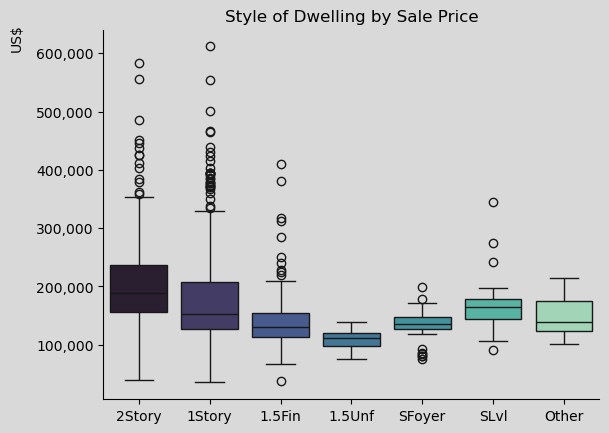


Correlation: 0.27624130073296466


In [319]:
PlotBoxPlot(HousePricesDF['HouseStyle'], HousePricesDF['SalePrice'], "Style of Dwelling by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HouseStyle_E']))

In [320]:
HousePricesDF['HouseStyle'] = HousePricesDF['HouseStyle_E'].copy()
HousePricesDF = HousePricesDF.drop('HouseStyle_E', axis = 1)

#### **OverallQual**

In [322]:
HousePricesDF['OverallQual'].value_counts(normalize=True) * 100

OverallQual
5     27.841727
6     25.971223
7     21.798561
8     11.223022
4      7.841727
9      2.949640
3      1.366906
10     0.719424
2      0.215827
1      0.071942
Name: proportion, dtype: float64

In [323]:
HousePricesDF['OverallQual'] = HousePricesDF['OverallQual'].replace({10: "Other", 2: "Other", 1: "Other"})
HousePricesDF_test['OverallQual'] = HousePricesDF_test['OverallQual'].replace({10: "Other", 2: "Other", 1: "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'OverallQual', 'SalePrice')

<Figure size 600x500 with 0 Axes>

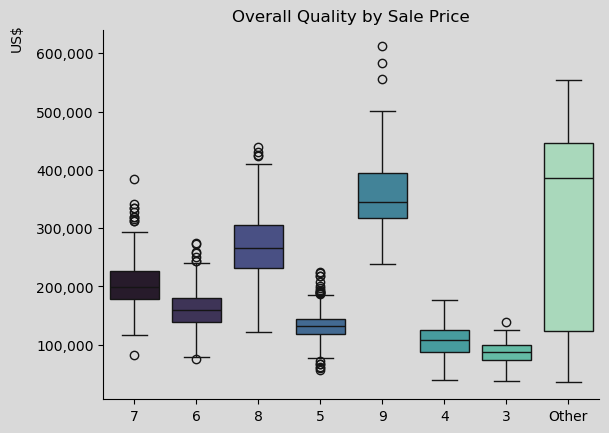


Correlation: 0.7960439815139825


In [324]:
PlotBoxPlot(HousePricesDF['OverallQual'], HousePricesDF['SalePrice'], "Overall Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OverallQual_E']))

In [325]:
HousePricesDF['OverallQual'] = HousePricesDF['OverallQual_E'].copy()
HousePricesDF = HousePricesDF.drop('OverallQual_E', axis = 1)

#### **OverallCond**

In [327]:
HousePricesDF['OverallCond'].value_counts(normalize=True) * 100

OverallCond
5    56.043165
6    17.482014
7    14.316547
8     5.107914
4     3.669065
3     1.654676
9     1.294964
2     0.359712
1     0.071942
Name: proportion, dtype: float64

In [328]:
HousePricesDF['OverallCond'] = HousePricesDF['OverallCond'].replace({2: "Other", 1: "Other"})
HousePricesDF_test['OverallCond'] = HousePricesDF_test['OverallCond'].replace({2: "Other", 1: "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'OverallCond', 'SalePrice')

<Figure size 600x500 with 0 Axes>

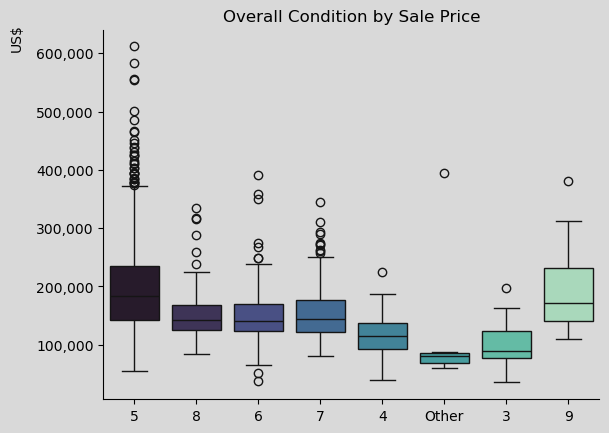


Correlation: 0.3658394520654265


In [329]:
PlotBoxPlot(HousePricesDF['OverallCond'], HousePricesDF['SalePrice'], "Overall Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OverallCond_E']))

In [330]:
HousePricesDF['OverallCond'] = HousePricesDF['OverallCond_E'].copy()
HousePricesDF = HousePricesDF.drop('OverallCond_E', axis = 1)

#### **YearBuilt**

<Figure size 600x500 with 0 Axes>

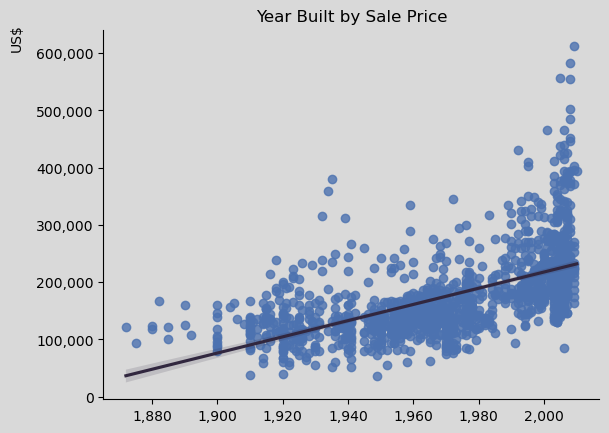


Correlation: 0.5754864622026999


In [332]:
PlotRegPlot(HousePricesDF['YearBuilt'], HousePricesDF['SalePrice'], "Year Built by Sale Price", "", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['YearBuilt']))

#### **YearRemodAdd**

<Figure size 600x500 with 0 Axes>

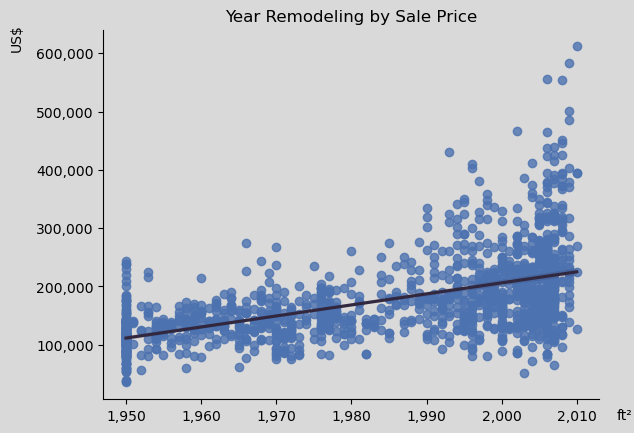


Correlation: 0.5332609199455549


In [334]:
PlotRegPlot(HousePricesDF['YearRemodAdd'], HousePricesDF['SalePrice'], "Year Remodeling by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['YearRemodAdd']))

#### **RoofStyle**

In [336]:
HousePricesDF['RoofStyle'].value_counts(normalize=True) * 100

RoofStyle
Gable      78.848921
Hip        19.136691
Gambrel     0.791367
Flat        0.719424
Mansard     0.431655
Shed        0.071942
Name: proportion, dtype: float64

In [337]:
HousePricesDF['RoofStyle'] = HousePricesDF['RoofStyle'].replace({"Gambrel": "Other", "Flat": "Other", "Mansard	": "Other", "Shed": "Other"})
HousePricesDF_test['RoofStyle'] = HousePricesDF_test['RoofStyle'].replace({"Gambrel": "Other", "Flat": "Other", "Mansard	": "Other", "Shed": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'RoofStyle', 'SalePrice')

<Figure size 600x500 with 0 Axes>

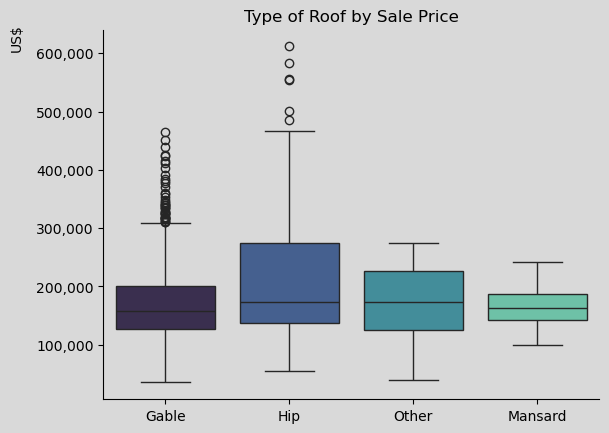


Correlation: 0.22270708325461197


In [338]:
PlotBoxPlot(HousePricesDF['RoofStyle'], HousePricesDF['SalePrice'], "Type of Roof by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['RoofStyle_E']))

In [339]:
HousePricesDF['RoofStyle'] = HousePricesDF['RoofStyle_E'].copy()
HousePricesDF = HousePricesDF.drop('RoofStyle_E', axis = 1)

#### **RoofMatl**

In [341]:
HousePricesDF['RoofMatl'].value_counts(normalize=True) * 100

RoofMatl
CompShg    98.920863
Tar&Grv     0.575540
WdShake     0.215827
Metal       0.071942
Membran     0.071942
WdShngl     0.071942
Roll        0.071942
Name: proportion, dtype: float64

In [342]:
HousePricesDF['RoofMatl'] = HousePricesDF['RoofMatl'].replace({"CompShg": 1, "Tar&Grv": 0, "WdShake": 0, "Metal": 0, "Membran": 0, "WdShngl": 0, "Roll": 0})
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['RoofMatl']))

Correlation: -0.013293375669189292


In [343]:
HousePricesDF = HousePricesDF.drop('RoofMatl', axis = 1)

In [344]:
HousePricesDF_test = HousePricesDF_test.drop('RoofMatl', axis = 1)

#### **Exterior1st**

In [346]:
HousePricesDF['Exterior1st'].value_counts(normalize=True) * 100

Exterior1st
VinylSd    35.827338
HdBoard    15.611511
MetalSd    15.323741
Wd Sdng    13.812950
Plywood     6.906475
CemntBd     4.028777
BrkFace     3.381295
WdShing     1.726619
Stucco      1.582734
AsbShng     1.366906
BrkComm     0.143885
AsphShn     0.071942
Stone       0.071942
ImStucc     0.071942
CBlock      0.071942
Name: proportion, dtype: float64

In [347]:
HousePricesDF['Exterior1st'] = HousePricesDF['Exterior1st'].replace({"BrkComm": "Other", "AsphShn": "Other", "Stone": "Other", "ImStucc": "Other", "CBlock": "Other"})
HousePricesDF_test['Exterior1st'] = HousePricesDF_test['Exterior1st'].replace({"BrkComm": "Other", "AsphShn": "Other", "Stone": "Other", "ImStucc": "Other", "CBlock": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Exterior1st', 'SalePrice')

<Figure size 600x500 with 0 Axes>

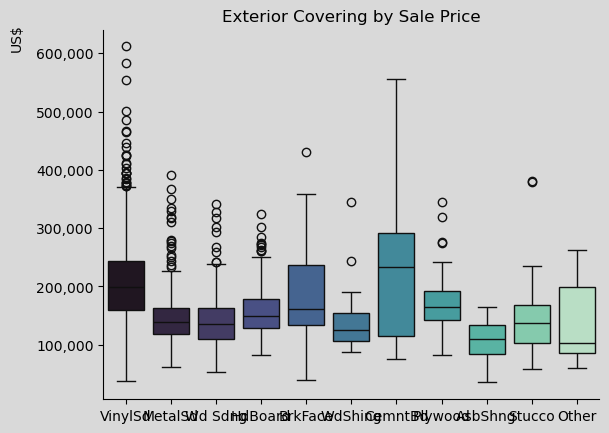


Correlation: 0.3945699396452756


In [348]:
PlotBoxPlot(HousePricesDF['Exterior1st'], HousePricesDF['SalePrice'], "Exterior Covering by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Exterior1st_E']))

In [349]:
HousePricesDF['Exterior1st'] = HousePricesDF['Exterior1st_E'].copy()
HousePricesDF = HousePricesDF.drop('Exterior1st_E', axis = 1)

#### **Exterior2nd**

In [351]:
HousePricesDF['Exterior2nd'].value_counts(normalize=True) * 100

Exterior2nd
VinylSd    35.035971
MetalSd    14.892086
HdBoard    14.388489
Wd Sdng    13.381295
Plywood     9.208633
CmentBd     4.028777
Wd Shng     2.589928
BrkFace     1.654676
Stucco      1.654676
AsbShng     1.366906
ImStucc     0.647482
Brk Cmn     0.503597
Stone       0.287770
AsphShn     0.215827
Other       0.071942
CBlock      0.071942
Name: proportion, dtype: float64

In [352]:
HousePricesDF['Exterior2nd'] = HousePricesDF['Exterior2nd'].replace({"ImStucc": "Other", "Brk Cmn": "Other", "Stone": "Other", "AsphShn": "Other", "CBlock": "Other"})
HousePricesDF_test['Exterior2nd'] = HousePricesDF_test['Exterior2nd'].replace({"ImStucc": "Other", "Brk Cmn": "Other", "Stone": "Other", "AsphShn": "Other", "CBlock": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Exterior2nd', 'SalePrice')

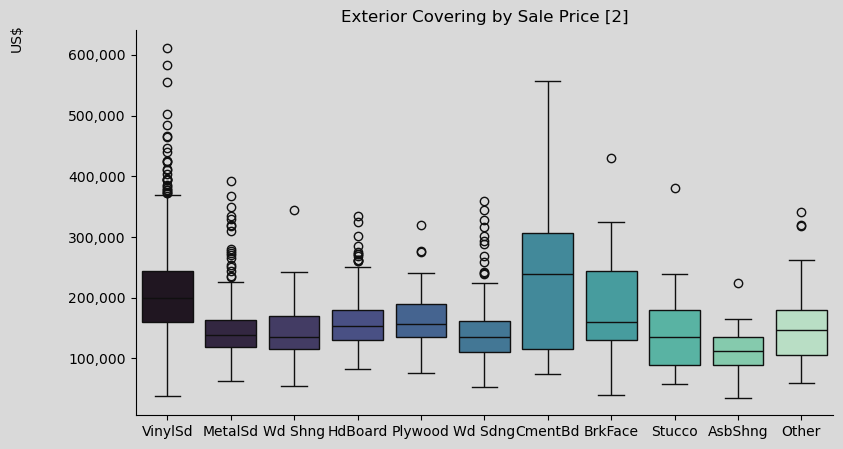


Correlation: 0.389906768677509


In [353]:
PlotBoxPlotV2(HousePricesDF['Exterior2nd'], HousePricesDF['SalePrice'], "Exterior Covering by Sale Price [2]", "US$", 9, 5)
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Exterior2nd_E']))

In [354]:
HousePricesDF['Exterior2nd'] = HousePricesDF['Exterior2nd_E'].copy()
HousePricesDF = HousePricesDF.drop('Exterior2nd_E', axis = 1)

#### **MasVnrType**

In [356]:
HousePricesDF['MasVnrType'].value_counts(normalize=True) * 100

MasVnrType
None       60.000000
BrkFace    30.287770
Stone       8.705036
BrkCmn      1.007194
Name: proportion, dtype: float64

In [357]:
KFTE(HousePricesDF, HousePricesDF_test, 'MasVnrType', 'SalePrice')

<Figure size 600x500 with 0 Axes>

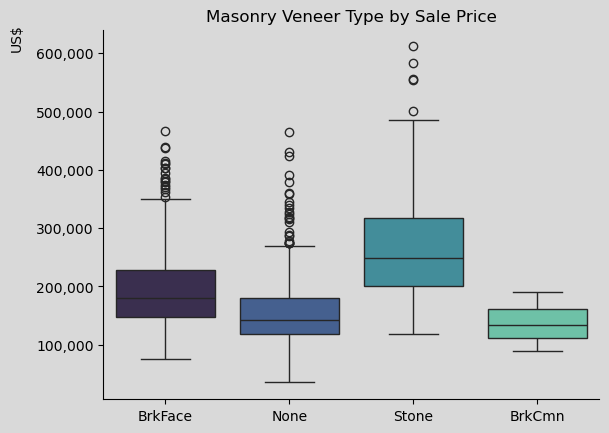


Correlation: 0.4652106877860177


In [358]:
PlotBoxPlot(HousePricesDF['MasVnrType'], HousePricesDF['SalePrice'], "Masonry Veneer Type by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MasVnrType_E']))

In [359]:
HousePricesDF['MasVnrType'] = HousePricesDF['MasVnrType_E'].copy()
HousePricesDF = HousePricesDF.drop('MasVnrType_E', axis = 1)

#### **MasVnrArea**

<Figure size 600x500 with 0 Axes>

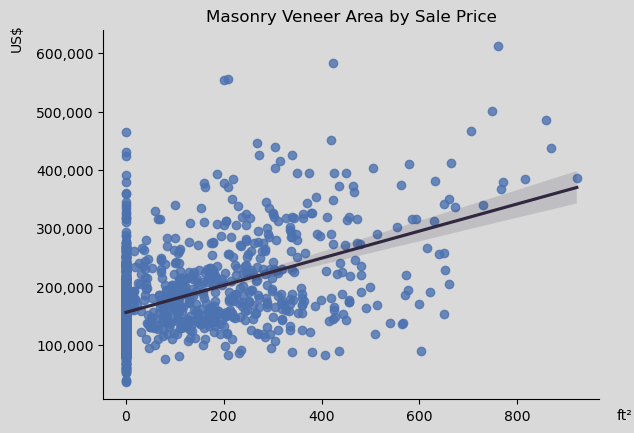


Correlation: 0.48788397373934833


In [361]:
PlotRegPlot(HousePricesDF['MasVnrArea'], HousePricesDF['SalePrice'], "Masonry Veneer Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MasVnrArea']))

#### **ExterQual**

In [363]:
HousePricesDF['ExterQual'].value_counts(normalize=True) * 100

ExterQual
TA    62.949640
Gd    33.021583
Ex     3.237410
Fa     0.791367
Name: proportion, dtype: float64

In [364]:
HousePricesDF['ExterQual'] = HousePricesDF['ExterQual'].replace({"Ex": "Other", "Fa": "Other"})
HousePricesDF_test['ExterQual'] = HousePricesDF_test['ExterQual'].replace({"Ex": "Other", "Fa": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'ExterQual', 'SalePrice')

<Figure size 600x500 with 0 Axes>

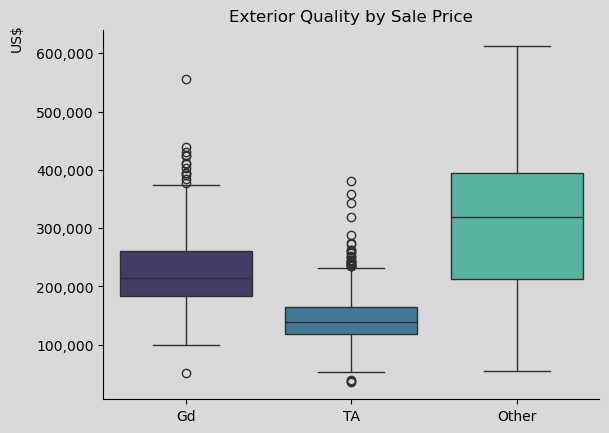


Correlation: 0.6446423134754106


In [365]:
PlotBoxPlot(HousePricesDF['ExterQual'], HousePricesDF['SalePrice'], "Exterior Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ExterQual_E']))

In [366]:
HousePricesDF['ExterQual'] = HousePricesDF['ExterQual_E'].copy()
HousePricesDF = HousePricesDF.drop('ExterQual_E', axis = 1)

#### **ExterCond**

In [368]:
HousePricesDF['ExterCond'].value_counts(normalize=True) * 100

ExterCond
TA    87.913669
Gd     9.928058
Fa     1.942446
Ex     0.143885
Po     0.071942
Name: proportion, dtype: float64

In [369]:
HousePricesDF['ExterCond'] = HousePricesDF['ExterCond'].replace({"Ex": "Other", "Po": "Other"})
HousePricesDF_test['ExterCond'] = HousePricesDF_test['ExterCond'].replace({"Ex": "Other", "Po": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'ExterCond', 'SalePrice')

<Figure size 600x500 with 0 Axes>

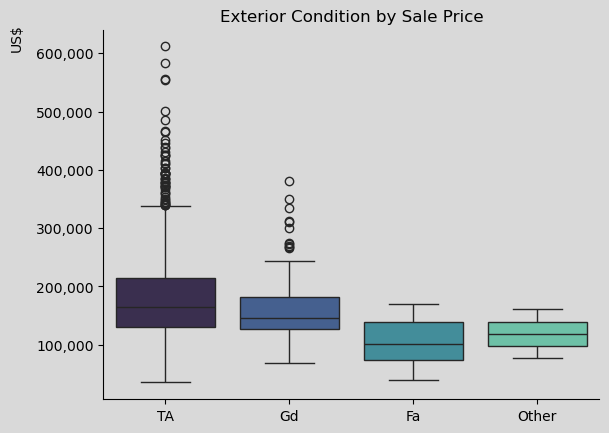


Correlation: 0.14872994381559138


In [370]:
PlotBoxPlot(HousePricesDF['ExterCond'], HousePricesDF['SalePrice'], "Exterior Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ExterCond_E']))

In [371]:
HousePricesDF['ExterCond'] = HousePricesDF['ExterCond_E'].copy()
HousePricesDF = HousePricesDF.drop('ExterCond_E', axis = 1)

#### **Foundation**

In [373]:
HousePricesDF['Foundation'].value_counts(normalize=True) * 100

Foundation
PConc     44.388489
CBlock    43.309353
BrkTil    10.071942
Slab       1.654676
Stone      0.359712
Wood       0.215827
Name: proportion, dtype: float64

In [374]:
HousePricesDF['Foundation'] = HousePricesDF['Foundation'].replace({"Slab": "Other", "Stone": "Other", "Wood": "Other"})
HousePricesDF_test['Foundation'] = HousePricesDF_test['Foundation'].replace({"Slab": "Other", "Stone": "Other", "Wood": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Foundation', 'SalePrice')

<Figure size 600x500 with 0 Axes>

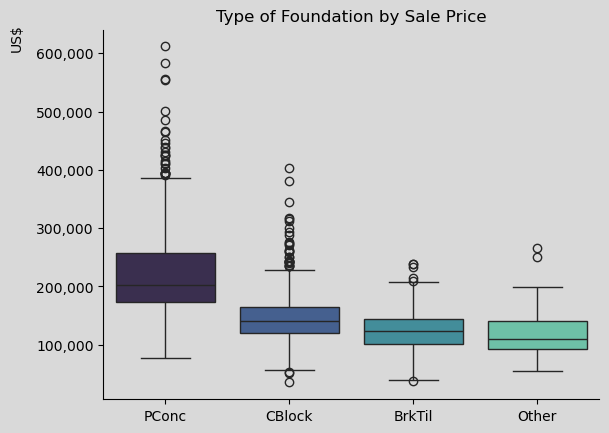


Correlation: 0.5376167484551689


In [375]:
PlotBoxPlot(HousePricesDF['Foundation'], HousePricesDF['SalePrice'], "Type of Foundation by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Foundation_E']))

In [376]:
HousePricesDF['Foundation'] = HousePricesDF['Foundation_E'].copy()
HousePricesDF = HousePricesDF.drop('Foundation_E', axis = 1)

#### **BsmtQual**

In [378]:
HousePricesDF['BsmtQual'].value_counts(normalize=True) * 100

BsmtQual
TA      44.820144
Gd      42.086331
Ex       7.985612
None     2.589928
Fa       2.517986
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

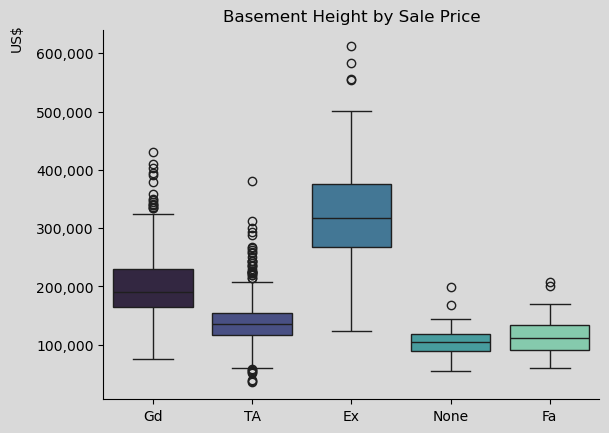


Correlation: 0.7077371279775029


In [379]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtQual', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtQual'], HousePricesDF['SalePrice'], "Basement Height by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtQual_E']))

In [380]:
HousePricesDF['BsmtQual'] = HousePricesDF['BsmtQual_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtQual_E', axis = 1)

#### **BsmtCond**

In [382]:
HousePricesDF['BsmtCond'].value_counts(normalize=True) * 100

BsmtCond
TA      89.856115
Gd       4.316547
Fa       3.093525
None     2.589928
Po       0.143885
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

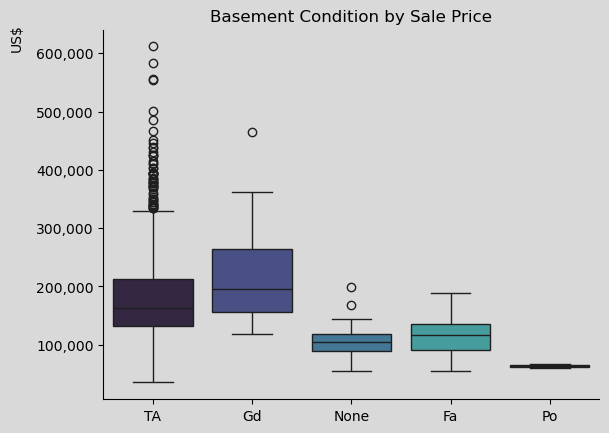


Correlation: 0.23540821169379555


In [383]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtCond', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtCond'], HousePricesDF['SalePrice'], "Basement Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtCond_E']))

In [384]:
HousePricesDF['BsmtCond'] = HousePricesDF['BsmtCond_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtCond_E', axis = 1)

#### **BsmtExposure**

In [386]:
HousePricesDF['BsmtExposure'].value_counts(normalize=True) * 100

BsmtExposure
No      66.258993
Av      15.035971
Gd       8.129496
Mn       7.985612
None     2.589928
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

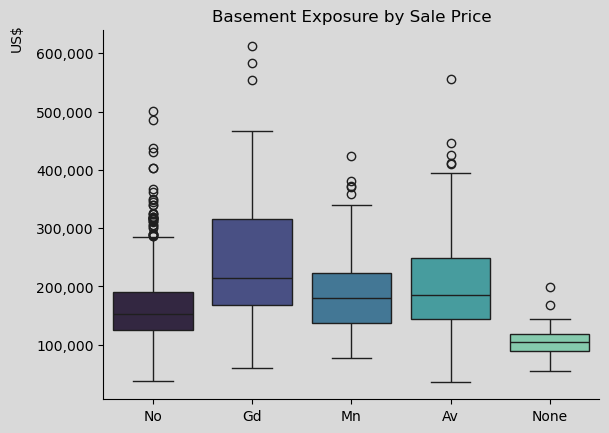


Correlation: 0.3670422253654447


In [387]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtExposure', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtExposure'], HousePricesDF['SalePrice'], "Basement Exposure by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtExposure_E']))

In [388]:
HousePricesDF['BsmtExposure'] = HousePricesDF['BsmtExposure_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtExposure_E', axis = 1)

#### **BsmtFinType1**

In [390]:
HousePricesDF['BsmtFinType1'].value_counts(normalize=True) * 100

BsmtFinType1
Unf     29.640288
GLQ     28.201439
ALQ     15.107914
BLQ     10.143885
Rec      9.352518
LwQ      4.964029
None     2.589928
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

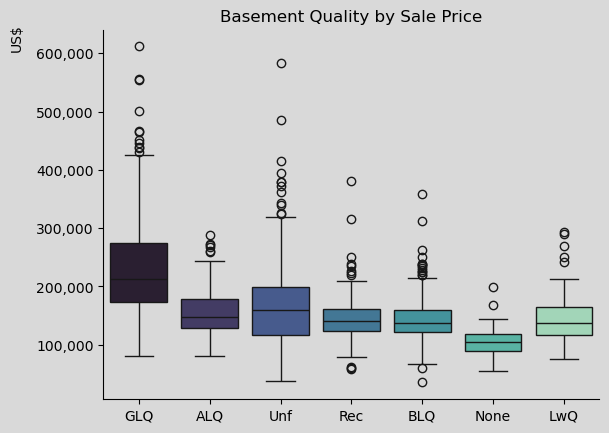


Correlation: 0.4850114295379617


In [391]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtFinType1', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtFinType1'], HousePricesDF['SalePrice'], "Basement Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinType1_E']))

In [392]:
HousePricesDF['BsmtFinType1'] = HousePricesDF['BsmtFinType1_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtFinType1_E', axis = 1)

#### **BsmtFinSF1**

<Figure size 600x500 with 0 Axes>

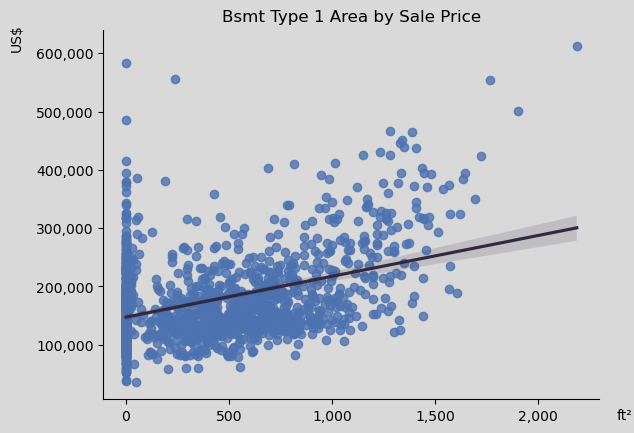


Correlation: 0.39968671333543726


In [394]:
PlotRegPlot(HousePricesDF['BsmtFinSF1'], HousePricesDF['SalePrice'], "Bsmt Type 1 Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinSF1']))

#### **BsmtFinType2**

In [396]:
HousePricesDF['BsmtFinType2'].value_counts(normalize=True) * 100

BsmtFinType2
Unf     86.330935
Rec      3.597122
LwQ      3.021583
None     2.589928
BLQ      2.158273
ALQ      1.294964
GLQ      1.007194
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

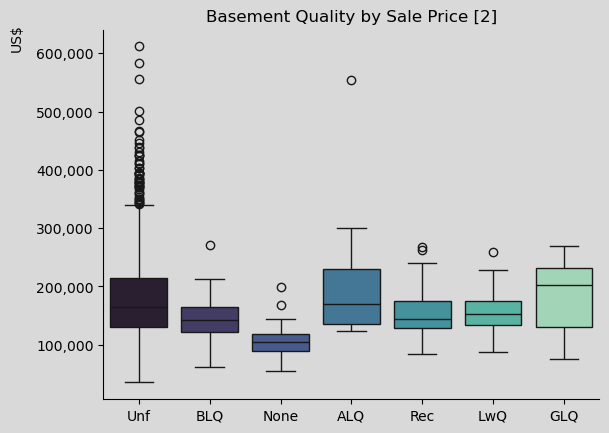


Correlation: 0.1682360828806758


In [397]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtFinType2', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtFinType2'], HousePricesDF['SalePrice'], "Basement Quality by Sale Price [2]", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinType2_E']))

In [398]:
HousePricesDF['BsmtFinType2'] = HousePricesDF['BsmtFinType2_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtFinType2_E', axis = 1)

#### **BsmtFinSF2**

<Figure size 600x500 with 0 Axes>

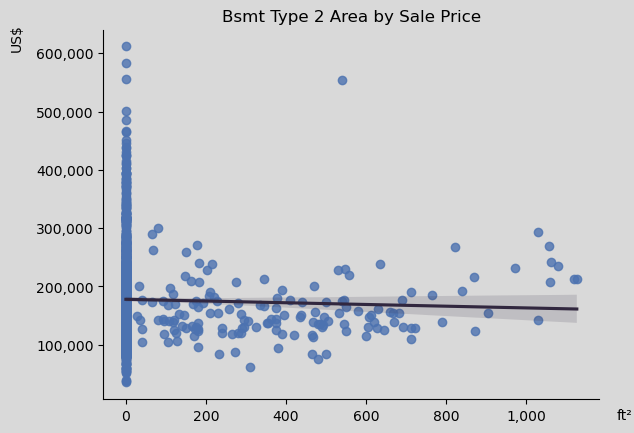


Correlation: -0.03077298965290362


In [400]:
PlotRegPlot(HousePricesDF['BsmtFinSF2'], HousePricesDF['SalePrice'], "Bsmt Type 2 Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinSF2']))

In [401]:
HousePricesDF = HousePricesDF.drop('BsmtFinSF2', axis = 1)

In [402]:
HousePricesDF_test = HousePricesDF_test.drop('BsmtFinSF2', axis = 1)

#### **BsmtUnfSF**

<Figure size 600x500 with 0 Axes>

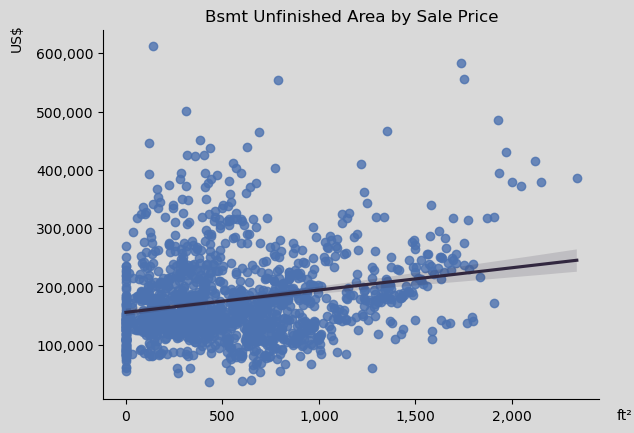


Correlation: 0.2267222896349557


In [404]:
PlotRegPlot(HousePricesDF['BsmtUnfSF'], HousePricesDF['SalePrice'], "Bsmt Unfinished Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtUnfSF']))

#### **TotalBsmtSF**

<Figure size 600x500 with 0 Axes>

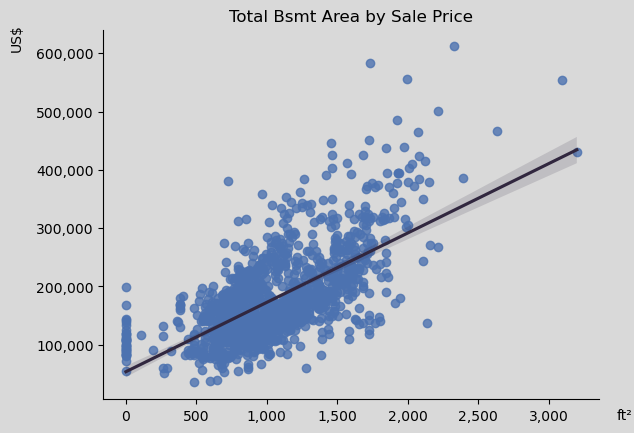


Correlation: 0.6509469191070193


In [406]:
PlotRegPlot(HousePricesDF['TotalBsmtSF'], HousePricesDF['SalePrice'], "Total Bsmt Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalBsmtSF']))

#### **Heating**

In [408]:
HousePricesDF['Heating'].value_counts(normalize=True) * 100

Heating
GasA     97.913669
GasW      1.079137
Grav      0.503597
Wall      0.287770
OthW      0.143885
Floor     0.071942
Name: proportion, dtype: float64

In [409]:
HousePricesDF['Heating'] = HousePricesDF['Heating'].replace({"GasA": 1, "GasW": 0, "Grav": 0, "Wall": 0, "OthW": 0, "Floor": 0})
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Heating']))

Correlation: 0.12412799265121939


In [410]:
HousePricesDF_test['Heating'] = HousePricesDF_test['Heating'].replace({"GasA": 1, "GasW": 0, "Grav": 0, "Wall": 0, "OthW": 0, "Floor": 0})
HousePricesDF_test = HousePricesDF_test.rename(columns = {"Heating": "Heating_GasA"})

HousePricesDF = HousePricesDF.rename(columns = {"Heating": "Heating_GasA"})

#### **HeatingQC**

In [412]:
HousePricesDF['HeatingQC'].value_counts(normalize=True) * 100

HeatingQC
Ex    50.863309
TA    29.064748
Gd    16.546763
Fa     3.453237
Po     0.071942
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

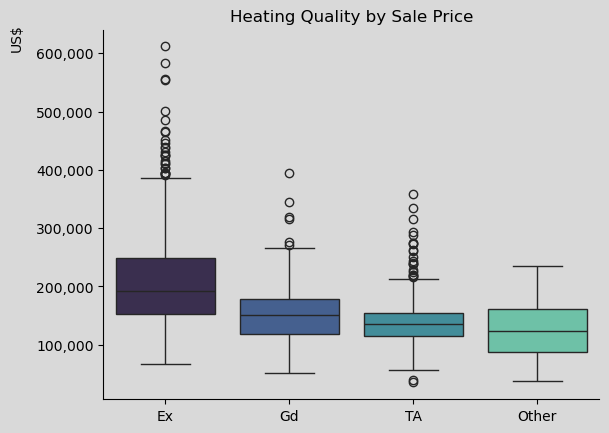


Correlation: 0.4560300417995194


In [413]:
HousePricesDF['HeatingQC'] = HousePricesDF['HeatingQC'].replace({"Fa": "Other", "Po": "Other"})
HousePricesDF_test['HeatingQC'] = HousePricesDF_test['HeatingQC'].replace({"Fa": "Other", "Po": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'HeatingQC', 'SalePrice')

PlotBoxPlot(HousePricesDF['HeatingQC'], HousePricesDF['SalePrice'], "Heating Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HeatingQC_E']))

In [414]:
HousePricesDF['HeatingQC'] = HousePricesDF['HeatingQC_E'].copy()
HousePricesDF = HousePricesDF.drop('HeatingQC_E', axis = 1)

#### **CentralAir**

In [416]:
HousePricesDF['CentralAir'].value_counts(normalize=True) * 100

CentralAir
Y    93.453237
N     6.546763
Name: proportion, dtype: float64

In [417]:
HousePricesDF['CentralAir'] = HousePricesDF['CentralAir'].replace({"Y": 1, "N": 0})
HousePricesDF_test['CentralAir'] = HousePricesDF_test['CentralAir'].replace({"Y": 1, "N": 0})

print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['CentralAir']))

Correlation: 0.2593119960641167


#### **Electrical**

In [419]:
HousePricesDF['Electrical'].value_counts(normalize=True) * 100

Electrical
SBrkr    91.366906
FuseA     6.474820
FuseF     1.870504
FuseP     0.215827
Mix       0.071942
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

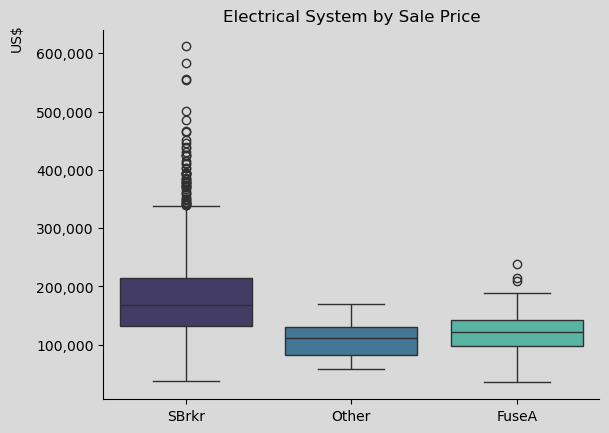


Correlation: 0.24240976002778541


In [420]:
HousePricesDF['Electrical'] = HousePricesDF['Electrical'].replace({"FuseF": "Other", "FuseP": "Other", "Mix": "Other"})
HousePricesDF_test['Electrical'] = HousePricesDF_test['Electrical'].replace({"FuseF": "Other", "FuseP": "Other", "Mix": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Electrical', 'SalePrice')

PlotBoxPlot(HousePricesDF['Electrical'], HousePricesDF['SalePrice'], "Electrical System by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Electrical_E']))

In [421]:
HousePricesDF['Electrical'] = HousePricesDF['Electrical_E'].copy()
HousePricesDF = HousePricesDF.drop('Electrical_E', axis = 1)

#### **1stFlrSF**

<Figure size 600x500 with 0 Axes>

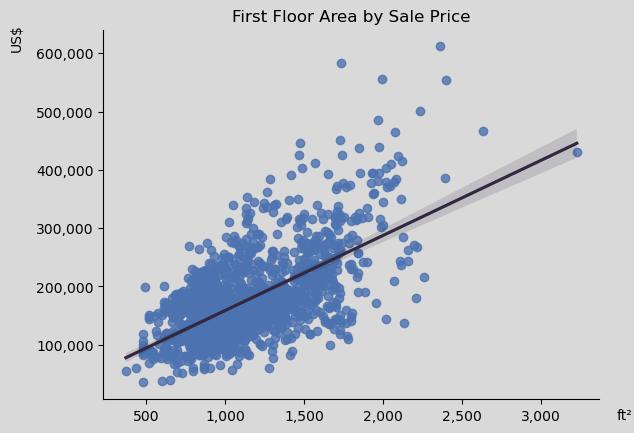


Correlation: 0.6281060818153046


In [423]:
PlotRegPlot(HousePricesDF['1stFlrSF'], HousePricesDF['SalePrice'], "First Floor Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['1stFlrSF']))

#### **2ndFlrSF**

<Figure size 600x500 with 0 Axes>

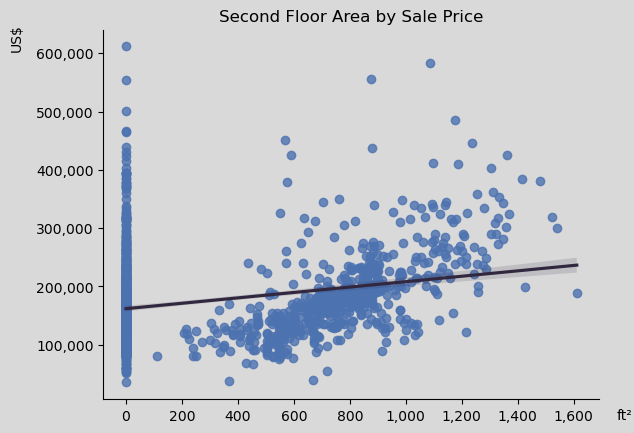


Correlation: 0.26262063048839485


In [425]:
PlotRegPlot(HousePricesDF['2ndFlrSF'], HousePricesDF['SalePrice'], "Second Floor Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['2ndFlrSF']))

#### **LowQualFinSF**

<Figure size 600x500 with 0 Axes>

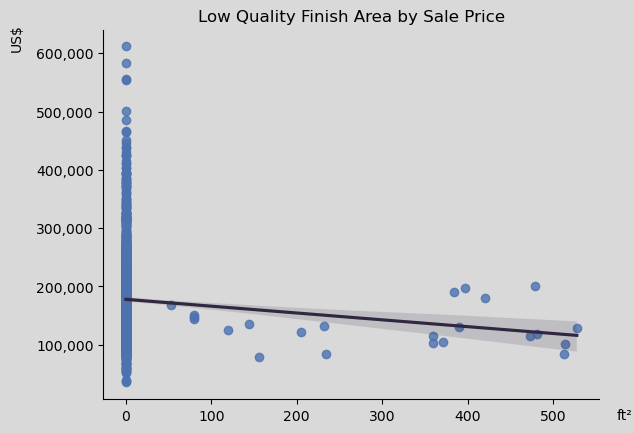


Correlation: -0.0701238008120736


In [427]:
PlotRegPlot(HousePricesDF['LowQualFinSF'], HousePricesDF['SalePrice'], "Low Quality Finish Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LowQualFinSF']))

In [428]:
HousePricesDF['HasLowQualFin'] = HousePricesDF['LowQualFinSF'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasLowQualFin']))

Correlation: -0.07787996711029264


In [429]:
HousePricesDF = HousePricesDF.drop(columns = {'LowQualFinSF', 'HasLowQualFin'}, axis = 1)

In [430]:
HousePricesDF_test = HousePricesDF_test.drop('LowQualFinSF', axis = 1)

#### **GrLivArea**

<Figure size 600x500 with 0 Axes>

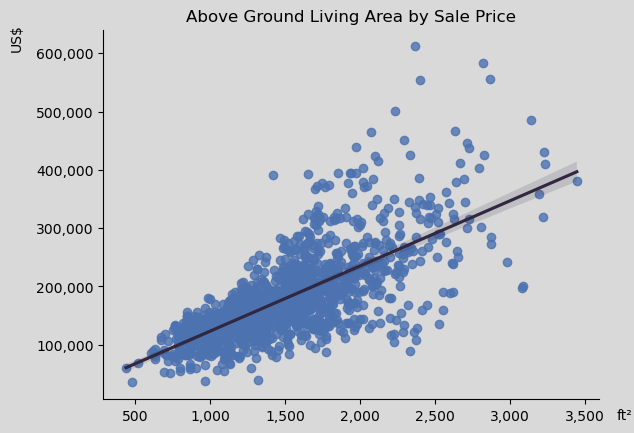


Correlation: 0.7097681910320878


In [432]:
PlotRegPlot(HousePricesDF['GrLivArea'], HousePricesDF['SalePrice'], "Above Ground Living Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GrLivArea']))

#### **BsmtFullBath**

<Figure size 600x500 with 0 Axes>

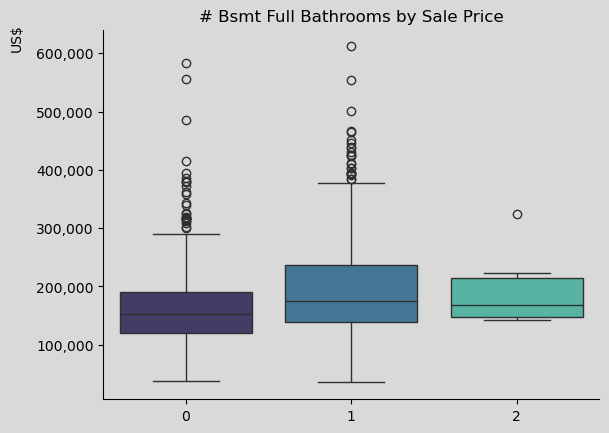


Correlation: 0.22880997052108903


In [434]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtFullBath', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtFullBath'], HousePricesDF['SalePrice'], "# Bsmt Full Bathrooms by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFullBath_E']))

#### **BsmtHalfBath**

<Figure size 600x500 with 0 Axes>

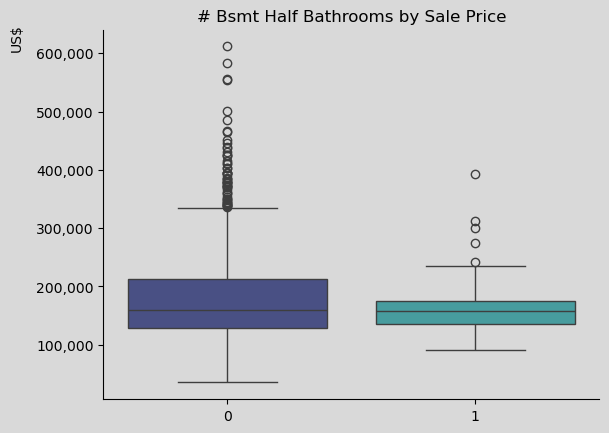


Correlation: -0.040002894382001775


In [436]:
PlotBoxPlot(HousePricesDF['BsmtHalfBath'], HousePricesDF['SalePrice'], "# Bsmt Half Bathrooms by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtHalfBath']))

#### **FullBath**

<Figure size 600x500 with 0 Axes>

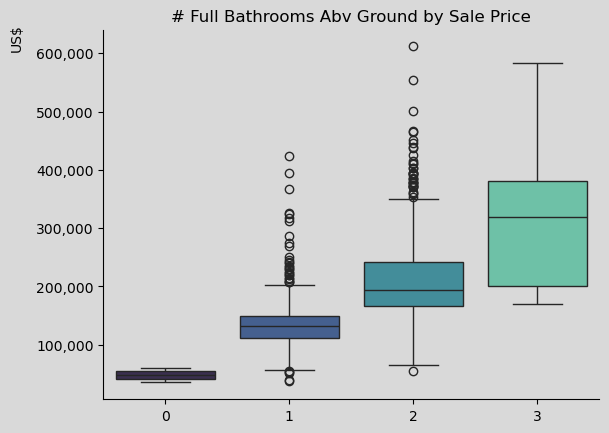


Correlation: 0.5610276977337514


In [438]:
KFTE(HousePricesDF, HousePricesDF_test, 'FullBath', 'SalePrice')

PlotBoxPlot(HousePricesDF['FullBath'], HousePricesDF['SalePrice'], "# Full Bathrooms Abv Ground by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['FullBath_E']))

#### **HalfBath**

<Figure size 600x500 with 0 Axes>

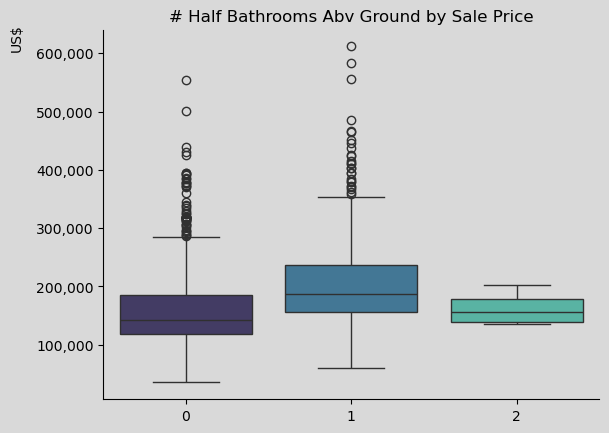


Correlation: 0.28381314834329857


In [440]:
KFTE(HousePricesDF, HousePricesDF_test, 'HalfBath', 'SalePrice')

PlotBoxPlot(HousePricesDF['HalfBath'], HousePricesDF['SalePrice'], "# Half Bathrooms Abv Ground by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HalfBath_E']))

#### **BedroomAbvGr**

<Figure size 600x500 with 0 Axes>

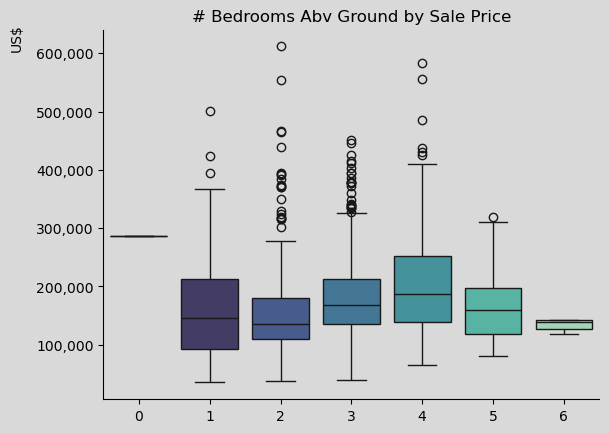


Correlation: 0.17947261757758917


In [442]:
KFTE(HousePricesDF, HousePricesDF_test, 'BedroomAbvGr', 'SalePrice')

PlotBoxPlot(HousePricesDF['BedroomAbvGr'], HousePricesDF['SalePrice'], "# Bedrooms Abv Ground by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BedroomAbvGr_E']))

#### **KitchenAbvGr**

<Figure size 600x500 with 0 Axes>

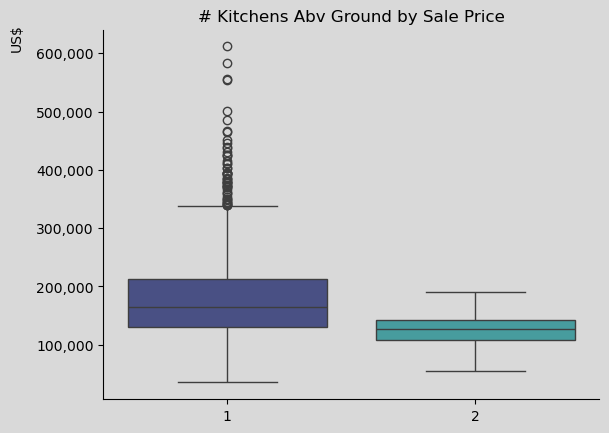


Correlation: 0.13916402969936176


In [444]:
KFTE(HousePricesDF, HousePricesDF_test, 'KitchenAbvGr', 'SalePrice')

PlotBoxPlot(HousePricesDF['KitchenAbvGr'], HousePricesDF['SalePrice'], "# Kitchens Abv Ground by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['KitchenAbvGr_E']))

#### **KitchenQual**

In [446]:
HousePricesDF['KitchenQual'].value_counts(normalize=True) * 100

KitchenQual
TA    50.719424
Gd    40.071942
Ex     6.546763
Fa     2.661871
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

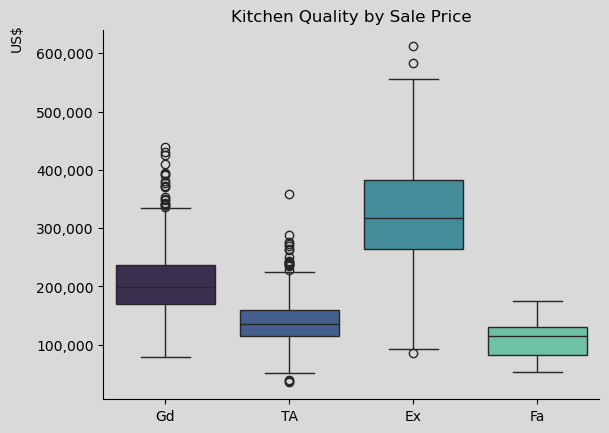


Correlation: 0.6892906801284514


In [447]:
KFTE(HousePricesDF, HousePricesDF_test, 'KitchenQual', 'SalePrice')

PlotBoxPlot(HousePricesDF['KitchenQual'], HousePricesDF['SalePrice'], "Kitchen Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['KitchenQual_E']))

In [448]:
HousePricesDF['KitchenQual'] = HousePricesDF['KitchenQual_E'].copy()
HousePricesDF = HousePricesDF.drop('KitchenQual_E', axis = 1)

#### **TotRmsAbvGrd**

In [450]:
HousePricesDF['TotRmsAbvGrd'].value_counts(normalize=True) * 100

TotRmsAbvGrd
6     28.345324
7     22.877698
5     19.208633
8     12.517986
4      6.690647
9      4.964029
10     2.733813
3      1.151079
11     1.079137
12     0.431655
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

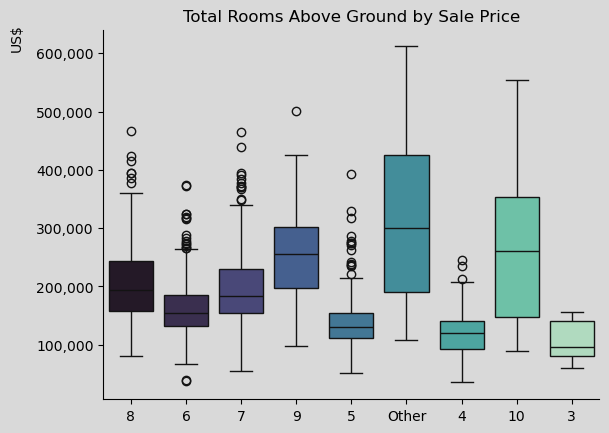


Correlation: 0.5126007425113396


In [451]:
HousePricesDF['TotRmsAbvGrd'] = HousePricesDF['TotRmsAbvGrd'].replace({11: "Other", 12: "Other"})
HousePricesDF_test['TotRmsAbvGrd'] = HousePricesDF_test['TotRmsAbvGrd'].replace({11: "Other", 12: "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'TotRmsAbvGrd', 'SalePrice')

PlotBoxPlot(HousePricesDF['TotRmsAbvGrd'], HousePricesDF['SalePrice'], "Total Rooms Above Ground by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotRmsAbvGrd_E']))

In [452]:
HousePricesDF['TotRmsAbvGrd'] = HousePricesDF['TotRmsAbvGrd_E'].copy()
HousePricesDF = HousePricesDF.drop('TotRmsAbvGrd_E', axis = 1)

#### **Functional**

In [454]:
HousePricesDF['Functional'].value_counts(normalize=True) * 100

Functional
Typ     93.237410
Min2     2.446043
Min1     2.086331
Mod      0.935252
Maj1     0.863309
Maj2     0.359712
Sev      0.071942
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

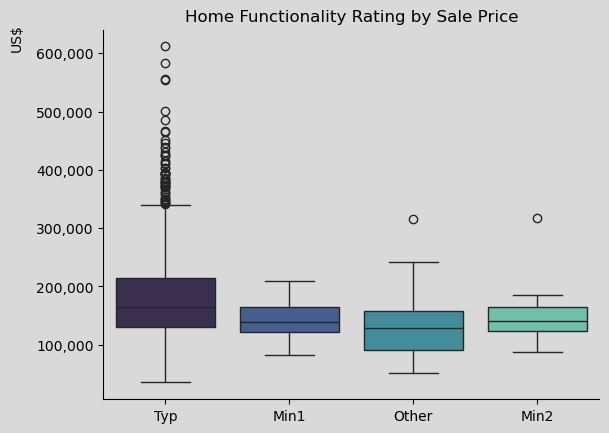


Correlation: 0.1273053457354662


In [455]:
HousePricesDF['Functional'] = HousePricesDF['Functional'].replace({"Mod": "Other", "Maj1": "Other", "Maj2": "Other", "Sev": "Other"})
HousePricesDF_test['Functional'] = HousePricesDF_test['Functional'].replace({"Mod": "Other", "Maj1": "Other", "Maj2": "Other", "Sev": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Functional', 'SalePrice')

PlotBoxPlot(HousePricesDF['Functional'], HousePricesDF['SalePrice'], "Home Functionality Rating by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Functional_E']))

In [456]:
HousePricesDF['Functional'] = HousePricesDF['Functional_E'].copy()
HousePricesDF = HousePricesDF.drop('Functional_E', axis = 1)

#### **Fireplaces**

In [458]:
HousePricesDF['Fireplaces'].value_counts(normalize=True) * 100

Fireplaces
0    48.417266
1    44.316547
2     7.122302
3     0.143885
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

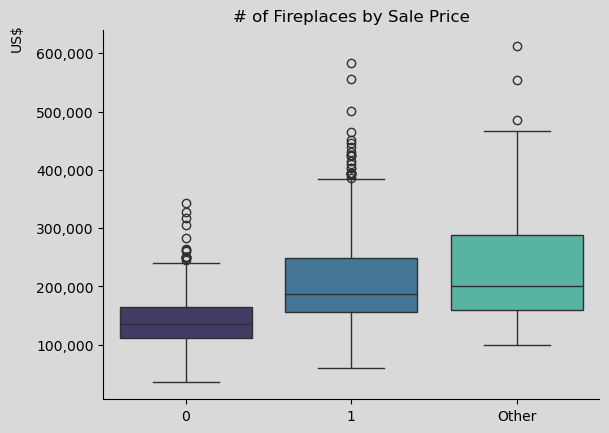


Correlation: 0.46842070010316755


In [459]:
HousePricesDF['Fireplaces'] = HousePricesDF['Fireplaces'].replace({2: "Other", 3: "Other"})
HousePricesDF_test['Fireplaces'] = HousePricesDF_test['Fireplaces'].replace({2: "Other", 3: "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Fireplaces', 'SalePrice')

PlotBoxPlot(HousePricesDF['Fireplaces'], HousePricesDF['SalePrice'], "# of Fireplaces by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Fireplaces_E']))

#### **FireplaceQu**

In [461]:
HousePricesDF['FireplaceQu'].value_counts(normalize=True) * 100

FireplaceQu
None    48.417266
Gd      25.539568
TA      20.935252
Fa       2.158273
Ex       1.510791
Po       1.438849
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

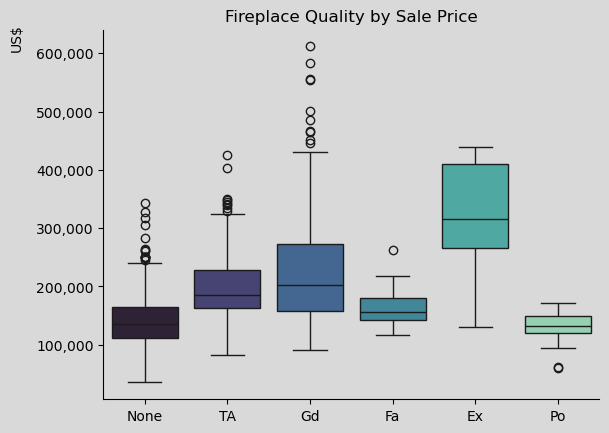


Correlation: 0.5352946128570112


In [462]:
KFTE(HousePricesDF, HousePricesDF_test, 'FireplaceQu', 'SalePrice')

PlotBoxPlot(HousePricesDF['FireplaceQu'], HousePricesDF['SalePrice'], "Fireplace Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['FireplaceQu_E']))

In [463]:
HousePricesDF['FireplaceQu'] = HousePricesDF['FireplaceQu_E'].copy()
HousePricesDF = HousePricesDF.drop('FireplaceQu_E', axis = 1)

#### **GarageType**

In [465]:
HousePricesDF['GarageType'].value_counts(normalize=True) * 100

GarageType
Attchd     59.712230
Detchd     26.690647
BuiltIn     5.899281
None        5.395683
Basment     1.366906
CarPort     0.575540
2Types      0.359712
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

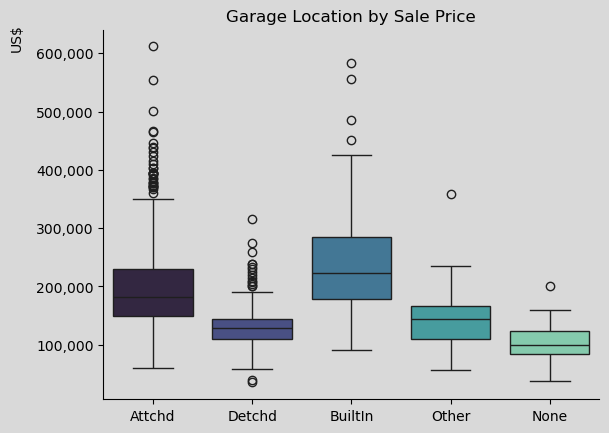


Correlation: 0.5125554628805828


In [466]:
HousePricesDF['GarageType'] = HousePricesDF['GarageType'].replace({"Basment": "Other", "CarPort": "Other", "2Types": "Other"})
HousePricesDF_test['GarageType'] = HousePricesDF_test['GarageType'].replace({"Basment": "Other", "CarPort": "Other", "2Types": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'GarageType', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageType'], HousePricesDF['SalePrice'], "Garage Location by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageType_E']))

In [467]:
HousePricesDF['GarageType'] = HousePricesDF['GarageType_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageType_E', axis = 1)

#### **GarageYrBlt**

In [469]:
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageYrBlt']))

Correlation: 0.2693150611975561


#### **GarageFinish**

In [471]:
HousePricesDF['GarageFinish'].value_counts(normalize=True) * 100

GarageFinish
Unf     41.942446
RFn     29.352518
Fin     23.309353
None     5.395683
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

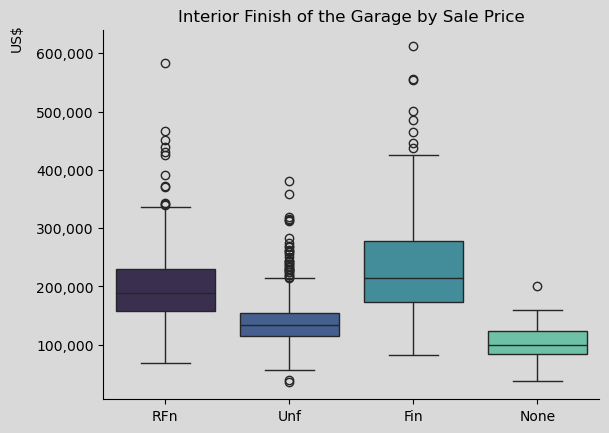


Correlation: 0.5722345282464547


In [472]:
KFTE(HousePricesDF, HousePricesDF_test, 'GarageFinish', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageFinish'], HousePricesDF['SalePrice'], "Interior Finish of the Garage by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageFinish_E']))

In [473]:
HousePricesDF['GarageFinish'] = HousePricesDF['GarageFinish_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageFinish_E', axis = 1)

#### **GarageCars**

In [475]:
HousePricesDF['GarageCars'].value_counts(normalize=True) * 100

GarageCars
2    56.546763
1    26.330935
3    11.726619
0     5.395683
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

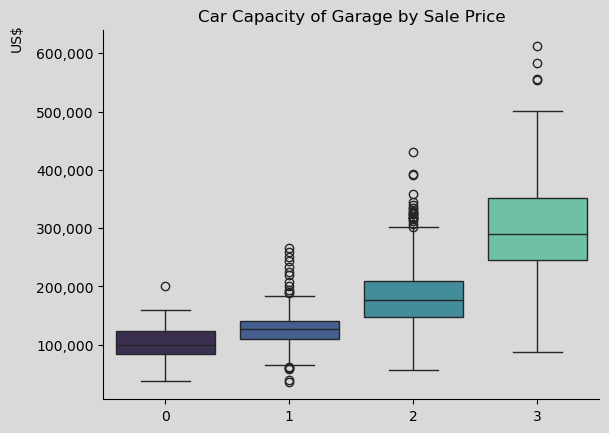


Correlation: 0.7103381293522111


In [476]:
KFTE(HousePricesDF, HousePricesDF_test, 'GarageCars', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageCars'], HousePricesDF['SalePrice'], "Car Capacity of Garage by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageCars_E']))

In [477]:
HousePricesDF['GarageCars'] = HousePricesDF['GarageCars_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageCars_E', axis = 1)

#### **GarageArea**

<Figure size 600x500 with 0 Axes>

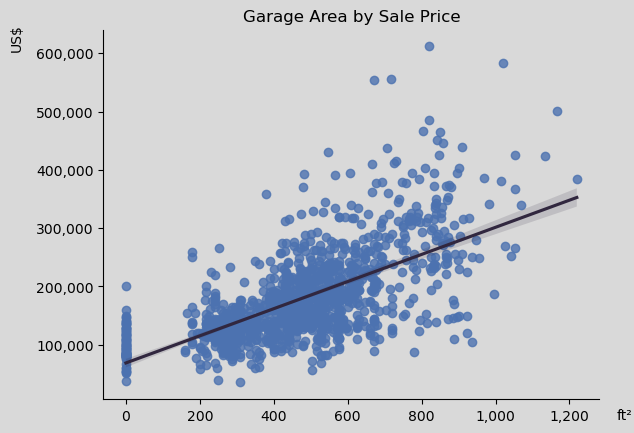


Correlation: 0.6503799551667392


In [479]:
PlotRegPlot(HousePricesDF['GarageArea'], HousePricesDF['SalePrice'], "Garage Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageArea']))

#### **GarageQual**

In [481]:
HousePricesDF['GarageQual'].value_counts(normalize=True) * 100

GarageQual
TA      90.143885
None     5.395683
Fa       3.165468
Gd       0.935252
Po       0.215827
Ex       0.143885
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

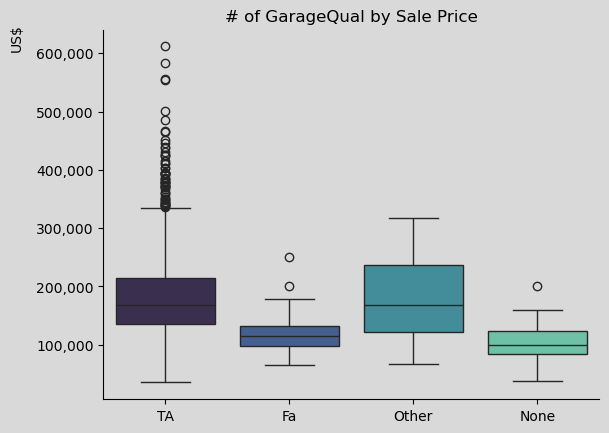


Correlation: 0.2844252715848755


In [482]:
HousePricesDF['GarageQual'] = HousePricesDF['GarageQual'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})
HousePricesDF_test['GarageQual'] = HousePricesDF_test['GarageQual'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'GarageQual', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageQual'], HousePricesDF['SalePrice'], "# of GarageQual by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageQual_E']))

In [483]:
HousePricesDF['GarageQual'] = HousePricesDF['GarageQual_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageQual_E', axis = 1)

#### **GarageCond**

In [485]:
HousePricesDF['GarageCond'].value_counts(normalize=True) * 100

GarageCond
TA      90.863309
None     5.395683
Fa       2.517986
Gd       0.647482
Po       0.431655
Ex       0.143885
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

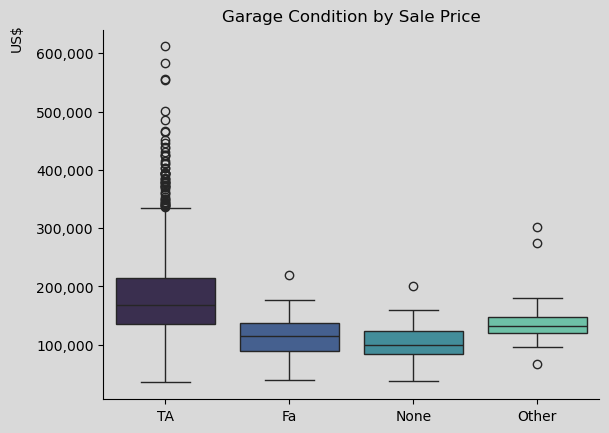


Correlation: 0.2842425719243835


In [486]:
HousePricesDF['GarageCond'] = HousePricesDF['GarageCond'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})
HousePricesDF_test['GarageCond'] = HousePricesDF_test['GarageCond'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'GarageCond', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageCond'], HousePricesDF['SalePrice'], "Garage Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageCond_E']))

In [487]:
HousePricesDF['GarageCond'] = HousePricesDF['GarageCond_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageCond_E', axis = 1)

#### **PavedDrive**

In [489]:
HousePricesDF['PavedDrive'].value_counts(normalize=True) * 100

PavedDrive
Y    91.870504
N     5.971223
P     2.158273
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

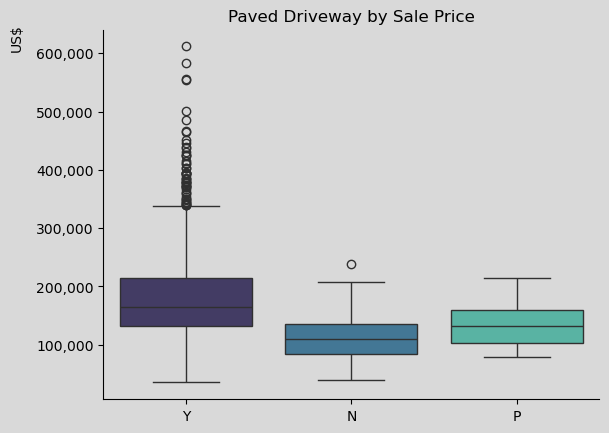


Correlation: 0.23237465465946924


In [490]:
KFTE(HousePricesDF, HousePricesDF_test, 'PavedDrive', 'SalePrice')

PlotBoxPlot(HousePricesDF['PavedDrive'], HousePricesDF['SalePrice'], "Paved Driveway by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['PavedDrive_E']))

In [491]:
HousePricesDF['PavedDrive'] = HousePricesDF['PavedDrive_E'].copy()
HousePricesDF = HousePricesDF.drop('PavedDrive_E', axis = 1)

#### **WoodDeckSF**

<Figure size 600x500 with 0 Axes>

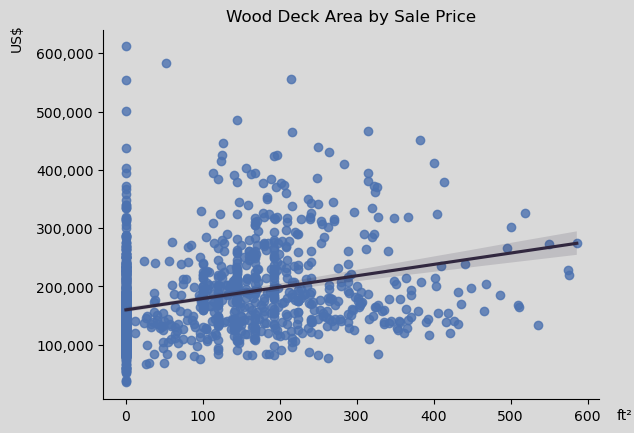


Correlation: 0.30694278500461936


In [493]:
PlotRegPlot(HousePricesDF['WoodDeckSF'], HousePricesDF['SalePrice'], "Wood Deck Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['WoodDeckSF']))

#### **OpenPorchSF**

<Figure size 600x500 with 0 Axes>

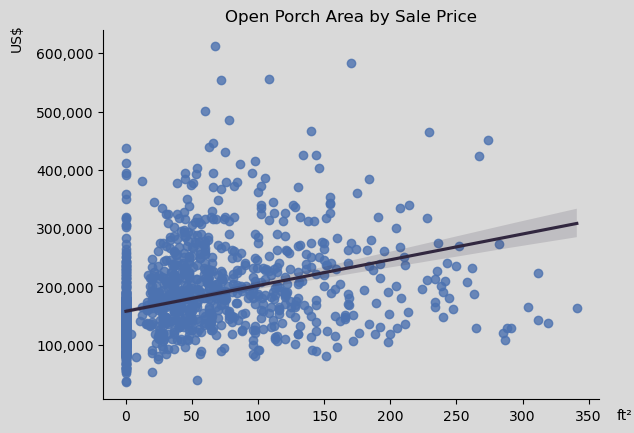


Correlation: 0.36199547975833546


In [495]:
PlotRegPlot(HousePricesDF['OpenPorchSF'], HousePricesDF['SalePrice'], "Open Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OpenPorchSF']))

#### **EnclosedPorch**

<Figure size 600x500 with 0 Axes>

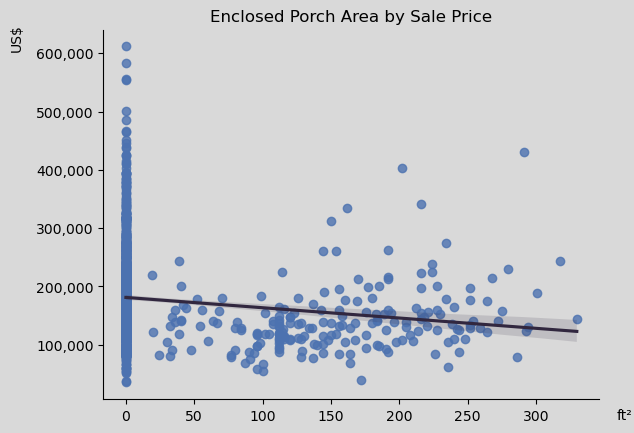


Correlation: -0.14248775088875829


In [497]:
PlotRegPlot(HousePricesDF['EnclosedPorch'], HousePricesDF['SalePrice'], "Enclosed Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['EnclosedPorch']))

#### **3SsnPorch**

<Figure size 600x500 with 0 Axes>

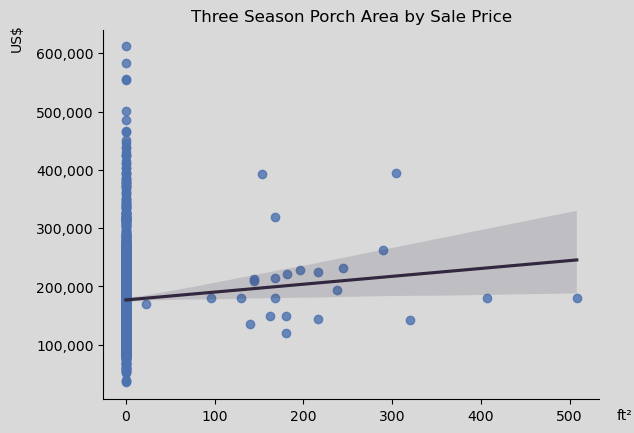


Correlation: 0.05495358627266167


In [499]:
PlotRegPlot(HousePricesDF['3SsnPorch'], HousePricesDF['SalePrice'], "Three Season Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['3SsnPorch']))

#### **ScreenPorch**

<Figure size 600x500 with 0 Axes>

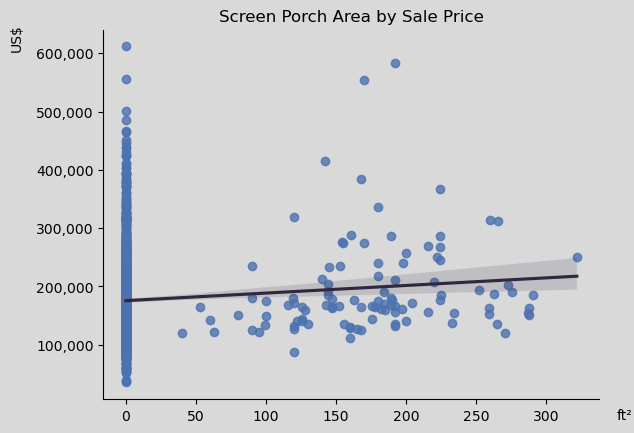


Correlation: 0.08634732781163809


In [501]:
PlotRegPlot(HousePricesDF['ScreenPorch'], HousePricesDF['SalePrice'], "Screen Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ScreenPorch']))

#### **PoolArea**

<Figure size 600x500 with 0 Axes>

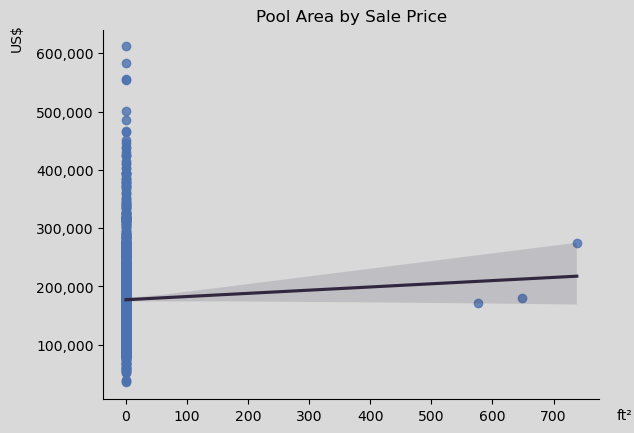


Correlation: 0.022606521211817762


In [503]:
PlotRegPlot(HousePricesDF['PoolArea'], HousePricesDF['SalePrice'], "Pool Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['PoolArea']))

#### **PoolQC**

In [505]:
HousePricesDF['PoolQC'].value_counts(normalize=True) * 100

PoolQC
None    99.784173
Gd       0.143885
Fa       0.071942
Name: proportion, dtype: float64

In [506]:
HousePricesDF = HousePricesDF.drop('PoolQC', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('PoolQC', axis = 1)

#### **YrSold**

In [508]:
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['YrSold']))


Correlation: -0.019635651221160514


#### **SaleType**

In [510]:
HousePricesDF['SaleType'].value_counts(normalize=True) * 100

SaleType
WD       86.906475
New       8.201439
COD       2.949640
ConLD     0.575540
ConLI     0.359712
ConLw     0.359712
CWD       0.287770
Oth       0.215827
Con       0.143885
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

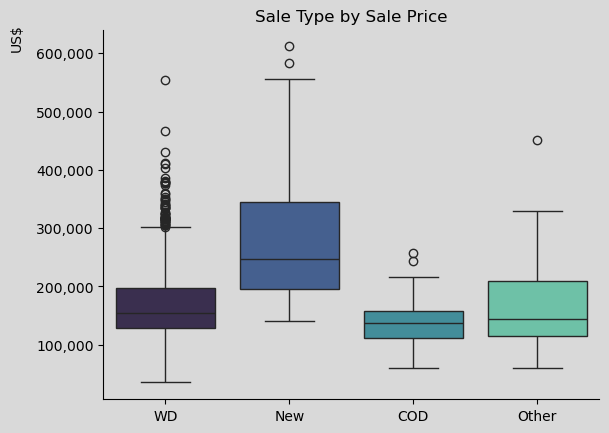


Correlation: 0.39928842028613465


In [511]:
HousePricesDF['SaleType'] = HousePricesDF['SaleType'].replace({"ConLD": "Other", "ConLI": "Other", "ConLw": "Other", "CWD": "Other", "Oth": "Other", "Con": "Other"})
HousePricesDF_test['SaleType'] = HousePricesDF_test['SaleType'].replace({"ConLD": "Other", "ConLI": "Other", "ConLw": "Other", "CWD": "Other", "Oth": "Other", "Con": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'SaleType', 'SalePrice')

PlotBoxPlot(HousePricesDF['SaleType'], HousePricesDF['SalePrice'], "Sale Type by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['SaleType_E']))

In [512]:
HousePricesDF['SaleType'] = HousePricesDF['SaleType_E'].copy()
HousePricesDF = HousePricesDF.drop('SaleType_E', axis = 1)

#### **SaleCondition**

In [514]:
HousePricesDF['SaleCondition'].value_counts(normalize=True) * 100

SaleCondition
Normal     82.589928
Partial     8.417266
Abnorml     6.834532
Family      1.438849
Alloca      0.503597
AdjLand     0.215827
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

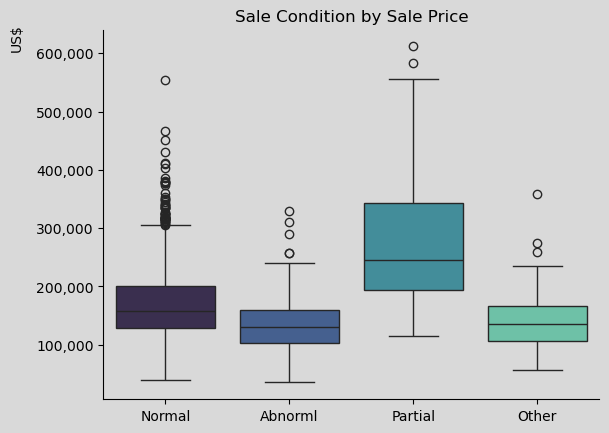


Correlation: 0.4055283077483691


In [515]:
HousePricesDF['SaleCondition'] = HousePricesDF['SaleCondition'].replace({"Family": "Other", "Alloca": "Other", "AdjLand": "Other"})
HousePricesDF_test['SaleCondition'] = HousePricesDF_test['SaleCondition'].replace({"Family": "Other", "Alloca": "Other", "AdjLand": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'SaleCondition', 'SalePrice')

PlotBoxPlot(HousePricesDF['SaleCondition'], HousePricesDF['SalePrice'], "Sale Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['SaleCondition_E']))

In [516]:
HousePricesDF['SaleCondition'] = HousePricesDF['SaleCondition_E'].copy()
HousePricesDF = HousePricesDF.drop('SaleCondition_E', axis = 1)

## **FEATURE ENGINEERING**

In [518]:
HousePricesDF['HouseAge'] = HousePricesDF['YrSold'] - HousePricesDF['YearBuilt']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HouseAge']))

Correlation: -0.5754599940254934


In [519]:
HousePricesDF_test['HouseAge'] = HousePricesDF_test['YrSold'] - HousePricesDF_test['YearBuilt']

In [520]:
HousePricesDF['RemodelAge'] = HousePricesDF['YrSold'] - HousePricesDF['YearRemodAdd']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['RemodelAge']))

Correlation: -0.5347993725537701


In [521]:
HousePricesDF_test['RemodelAge'] = HousePricesDF_test['YrSold'] - HousePricesDF_test['YearRemodAdd']

In [522]:
HousePricesDF['GarageAge'] = HousePricesDF['YrSold'] - HousePricesDF['GarageYrBlt']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageAge']))

Correlation: -0.26936298897513494


In [523]:
HousePricesDF_test['GarageAge'] = HousePricesDF_test['YrSold'] - HousePricesDF_test['GarageYrBlt']

In [524]:
HousePricesDF['OutdoorArea'] = HousePricesDF['WoodDeckSF'] + HousePricesDF['OpenPorchSF']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OutdoorArea']))

Correlation: 0.4274011351147879


In [525]:
HousePricesDF_test['OutdoorArea'] = HousePricesDF_test['WoodDeckSF'] + HousePricesDF_test['OpenPorchSF']

In [526]:
HousePricesDF['TotalArea'] = HousePricesDF['TotalBsmtSF'] + HousePricesDF['GrLivArea'] + HousePricesDF['GarageArea'] + HousePricesDF['OutdoorArea']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalArea']))

Correlation: 0.8566956342135456


In [527]:
HousePricesDF_test['TotalArea'] = HousePricesDF_test['TotalBsmtSF'] + HousePricesDF_test['GrLivArea'] + HousePricesDF_test['GarageArea'] + HousePricesDF_test['OutdoorArea']

In [528]:
HousePricesDF['TotalBathrooms'] = HousePricesDF['BsmtFullBath'] + HousePricesDF['FullBath'] + 0.5 * (HousePricesDF['BsmtHalfBath'] + HousePricesDF['HalfBath'])
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalBathrooms']))

Correlation: 0.6371585545121159


In [529]:
HousePricesDF_test['TotalBathrooms'] = HousePricesDF_test['BsmtFullBath'] + HousePricesDF_test['FullBath']\
                                          + 0.5 * (HousePricesDF_test['BsmtHalfBath'] + HousePricesDF_test['HalfBath'])

In [530]:
HousePricesDF['OverallScore'] = HousePricesDF['OverallQual'] * HousePricesDF['OverallCond']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OverallScore']))

Correlation: 0.7778456663803263


In [531]:
HousePricesDF_test['OverallScore'] = HousePricesDF_test['OverallQual'] * HousePricesDF_test['OverallCond']

In [532]:
HousePricesDF['ExteriorScore'] = HousePricesDF['ExterQual'] * HousePricesDF['ExterCond']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ExteriorScore']))

Correlation: 0.6649449913518136


In [533]:
HousePricesDF_test['ExteriorScore'] = HousePricesDF_test['ExterQual'] * HousePricesDF_test['ExterCond']

In [534]:
HousePricesDF['KitchenScore'] = HousePricesDF['KitchenQual'] * HousePricesDF['KitchenAbvGr']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['KitchenScore']))

Correlation: 0.5692478056999252


In [535]:
HousePricesDF_test['KitchenScore'] = HousePricesDF_test['KitchenQual'] * HousePricesDF_test['KitchenAbvGr']

In [536]:
HousePricesDF['LotFrontageRatio'] = HousePricesDF['LotFrontage'] / HousePricesDF['LotArea']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotFrontageRatio']))

Correlation: -0.17713069926102498


In [537]:
HousePricesDF_test['LotFrontageRatio'] = HousePricesDF_test['LotFrontage'] / HousePricesDF_test['LotArea']

In [538]:
HousePricesDF['BedroomRatio'] = HousePricesDF['BedroomAbvGr'] / HousePricesDF['TotRmsAbvGrd']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BedroomRatio']))

Correlation: -0.3068658439847174


In [539]:
HousePricesDF_test['BedroomRatio'] = HousePricesDF_test['BedroomAbvGr'] / HousePricesDF_test['TotRmsAbvGrd']

In [540]:
HousePricesDF['HasGarage'] = HousePricesDF['GarageArea'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasGarage']))

Correlation: 0.24256326136297643


In [541]:
HousePricesDF_test['HasGarage'] = HousePricesDF_test['GarageArea'].map({0: 0}).fillna(1)

In [542]:
HousePricesDF['HasPool'] = HousePricesDF['PoolArea'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasPool']))

Correlation: 0.01993825602575935


In [543]:
HousePricesDF = HousePricesDF.drop('HasPool', axis = 1)

In [544]:
HousePricesDF['HasFireplace'] = HousePricesDF['Fireplaces'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasFireplace']))

Correlation: 0.47011839204573064


In [545]:
HousePricesDF_test['HasFireplace'] = HousePricesDF_test['Fireplaces'].map({0: 0}).fillna(1)

In [546]:
HousePricesDF['GarageScore'] = HousePricesDF['GarageQual'] * HousePricesDF['GarageArea']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageScore']))

Correlation: 0.654406966697159


In [547]:
HousePricesDF_test['GarageScore'] = HousePricesDF_test['GarageQual'] * HousePricesDF_test['GarageArea']

In [548]:
HousePricesDF['TotalPorchArea'] = HousePricesDF['OpenPorchSF'] + HousePricesDF['EnclosedPorch'] + HousePricesDF['3SsnPorch'] + HousePricesDF['ScreenPorch']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalPorchArea']))

Correlation: 0.202557396207812


In [549]:
HousePricesDF_test['TotalPorchArea'] = HousePricesDF_test['OpenPorchSF'] + HousePricesDF_test['EnclosedPorch']\
                                          + HousePricesDF_test['3SsnPorch'] + HousePricesDF_test['ScreenPorch']

In [550]:
HousePricesDF['SeasonSold'] = HousePricesDF['MoSold'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})
HousePricesDF_test['SeasonSold'] = HousePricesDF_test['MoSold'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})

KFTE(HousePricesDF, HousePricesDF_test, 'SeasonSold', 'SalePrice')
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['SeasonSold_E']))

Correlation: 0.018272534996101517


In [551]:
HousePricesDF = HousePricesDF.drop(columns = {'SeasonSold', 'SeasonSold_E'}, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('SeasonSold', axis = 1)

In [552]:
def DecadeBuilt(YearBuilt):
  if (YearBuilt < 1880):
    return 1870
  elif (YearBuilt < 1890):
    return 1880
  elif (YearBuilt < 1900):
    return 1890
  elif (YearBuilt < 1910):
    return 1900
  elif (YearBuilt < 1920):
    return 1910
  elif (YearBuilt < 1930):
    return 1920
  elif (YearBuilt < 1940):
    return 1930
  elif (YearBuilt < 1950):
    return 1940
  elif (YearBuilt < 1960):
    return 1950
  elif (YearBuilt < 1970):
    return 1960
  elif (YearBuilt < 1980):
    return 1970
  elif (YearBuilt < 1990):
    return 1980
  elif (YearBuilt < 2000):
    return 1990
  elif (YearBuilt < 2010):
    return 2000
  else:
    return 2010


HousePricesDF['DecadeBuilt'] = HousePricesDF['YearBuilt'].apply(DecadeBuilt)
HousePricesDF_test['DecadeBuilt'] = HousePricesDF_test['YearBuilt'].apply(DecadeBuilt)

KFTE(HousePricesDF, HousePricesDF_test, 'DecadeBuilt', 'SalePrice')
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['DecadeBuilt_E']))

Correlation: 0.6207845814087317


In [553]:
HousePricesDF['DecadeBuilt'] = HousePricesDF['DecadeBuilt_E'].copy()
HousePricesDF = HousePricesDF.drop('DecadeBuilt_E', axis = 1)

In [554]:
HousePricesDF['BsmtFullBath'] = HousePricesDF['BsmtFullBath_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtFullBath_E', axis = 1)

HousePricesDF['FullBath'] = HousePricesDF['FullBath_E'].copy()
HousePricesDF = HousePricesDF.drop('FullBath_E', axis = 1)

HousePricesDF = HousePricesDF.drop('BsmtHalfBath', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('BsmtHalfBath', axis = 1)

HousePricesDF['HalfBath'] = HousePricesDF['HalfBath_E'].copy()
HousePricesDF = HousePricesDF.drop('HalfBath_E', axis = 1)

HousePricesDF['BedroomAbvGr'] = HousePricesDF['BedroomAbvGr_E'].copy()
HousePricesDF = HousePricesDF.drop('BedroomAbvGr_E', axis = 1)

HousePricesDF['KitchenAbvGr'] = HousePricesDF['KitchenAbvGr_E'].copy()
HousePricesDF = HousePricesDF.drop('KitchenAbvGr_E', axis = 1)

HousePricesDF['Fireplaces'] = HousePricesDF['Fireplaces_E'].copy()
HousePricesDF = HousePricesDF.drop('Fireplaces_E', axis = 1)

HousePricesDF = HousePricesDF.drop('3SsnPorch', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('3SsnPorch', axis = 1)

HousePricesDF = HousePricesDF.drop('ScreenPorch', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('ScreenPorch', axis = 1)

HousePricesDF = HousePricesDF.drop('PoolArea', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('PoolArea', axis = 1)

HousePricesDF = HousePricesDF.drop(columns = {'MoSold'}, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('MoSold', axis = 1)

HousePricesDF = HousePricesDF.drop('YrSold', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('YrSold', axis = 1)

HousePricesDF = HousePricesDF.drop('Id', axis = 1)

HousePricesDF = HousePricesDF.drop('OverallQual', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('OverallQual', axis = 1)

In [555]:
HousePricesDF.corr()['SalePrice']

MSSubClass          0.497142
MSZoning            0.349508
LotFrontage         0.351079
LotArea             0.359134
LotShape            0.234456
LandContour         0.127571
Neighborhood        0.745691
Condition1          0.183138
BldgType            0.183887
HouseStyle          0.276241
OverallCond         0.365839
YearBuilt           0.575486
YearRemodAdd        0.533261
RoofStyle           0.222707
Exterior1st         0.394570
Exterior2nd         0.389907
MasVnrType          0.465211
MasVnrArea          0.487884
ExterQual           0.644642
ExterCond           0.148730
Foundation          0.537617
BsmtQual            0.707737
BsmtCond            0.235408
BsmtExposure        0.367042
BsmtFinType1        0.485011
BsmtFinSF1          0.399687
BsmtFinType2        0.168236
BsmtUnfSF           0.226722
TotalBsmtSF         0.650947
Heating_GasA        0.124128
HeatingQC           0.456030
CentralAir          0.259312
Electrical          0.242410
1stFlrSF            0.628106
2ndFlrSF      

## **TARGET VARIABLE ANALYSIS**

In [557]:
Q1 = HousePricesDF['SalePrice'].quantile(0.25)
Q3 = HousePricesDF['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Valores abaixo de {lower_bound} e acima de {upper_bound} podem ser outliers.")

Valores abaixo de 9150.0 e acima de 328750.0 podem ser outliers.


In [558]:
HousePricesDF = HousePricesDF[(HousePricesDF3['SalePrice'] >= 50000) & (HousePricesDF['SalePrice'] <= 328750)]

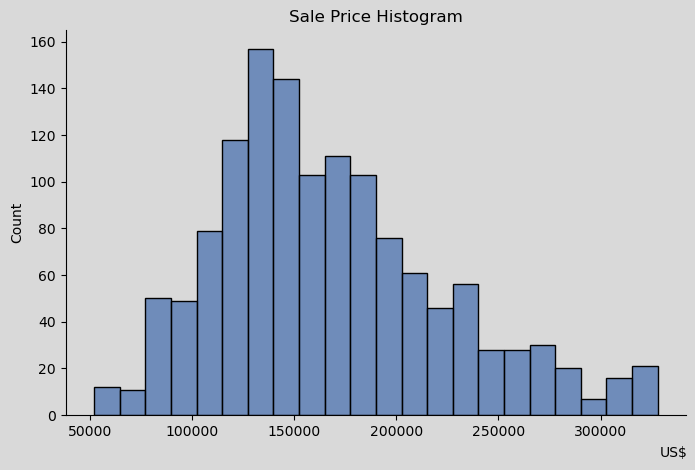

In [559]:
HistPlot(HousePricesDF['SalePrice'], "Sale Price Histogram", "US$", 8)

Let's normalize the distribution by applying a logarithm.

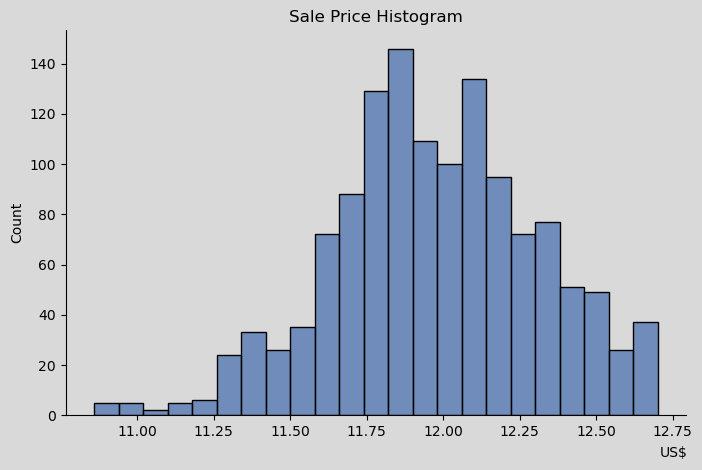

In [561]:
HousePricesDF['SalePrice'] = np.log(HousePricesDF['SalePrice'])
HistPlot(HousePricesDF['SalePrice'], "Sale Price Histogram", "US$", 8)

## **NORMALIZATION**

In [563]:
HousePricesDF5 = HousePricesDF.copy()

In [1160]:
x_data = HousePricesDF.drop(columns = {'SalePrice'}, axis = 1)
y_data = HousePricesDF[['SalePrice']]

Scaler = MaxAbsScaler().fit(x_data)

x_data = pd.DataFrame(Scaler.transform(x_data), columns = x_data.columns)

In [565]:
HousePricesDF_test_backup = HousePricesDF_test.copy()

In [1166]:
yhat_sub = HousePricesDF_test[['Id']]
HousePricesDF_test = HousePricesDF_test.drop(columns = {'Id'}, axis = 1).copy()

Scaler = MaxAbsScaler().fit(HousePricesDF_test)

HousePricesDF_test = pd.DataFrame(Scaler.transform(HousePricesDF_test), columns = HousePricesDF_test.columns)

## **CORRELATION**

In [568]:
HousePricesDF_corBU = HousePricesDF.copy()

In [1168]:
columns = ['YearBuilt', 'GarageYrBlt', 'GarageArea', 'ExterQual', 'ExterCond', 'YearRemodAdd', 'WoodDeckSF', 'OpenPorchSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
           'OutdoorArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'OverallCond', 'KitchenQual','KitchenAbvGr', 'LotArea', 'LotFrontage',
           'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageQual', 'OpenPorchSF', 'EnclosedPorch']

x_data = x_data.drop(columns = columns, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop(columns = columns, axis = 1)

In [1170]:
# Features with strong correlation with other features
columns = ['DecadeBuilt', 'GarageAge', 'SaleType', 'GarageCars']

x_data = x_data.drop(columns = columns, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop(columns = columns, axis = 1)

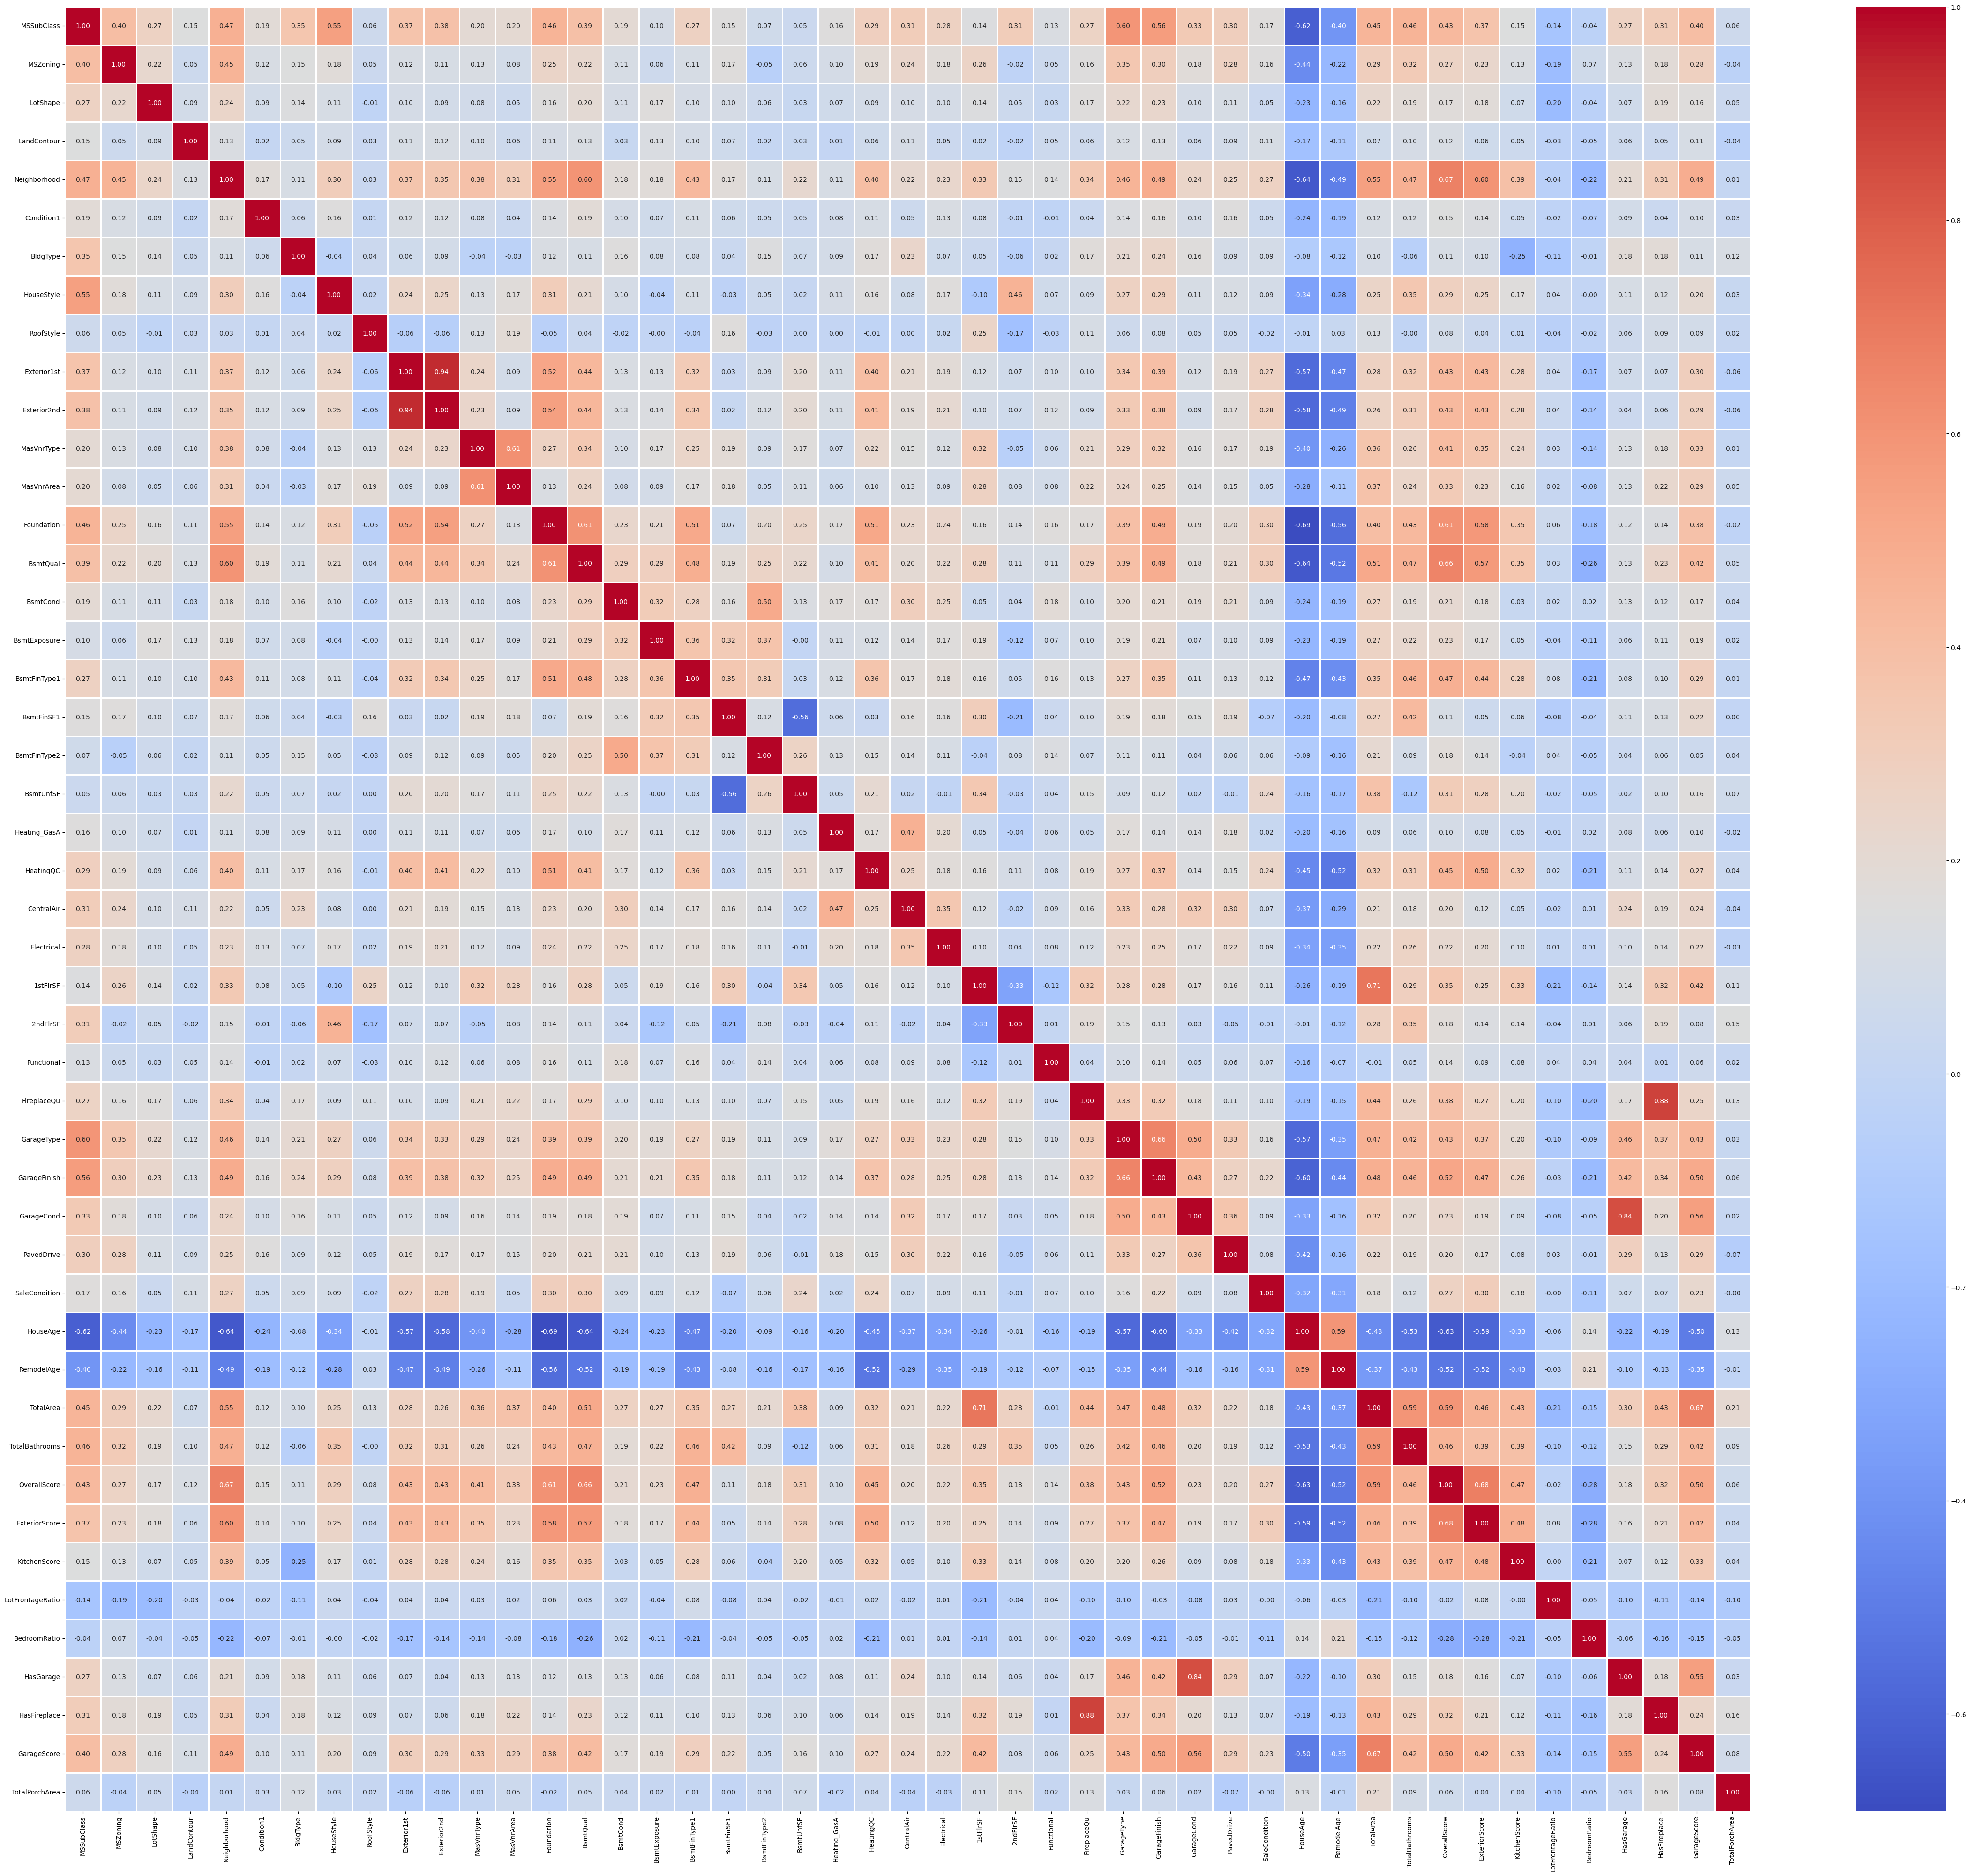

In [571]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = x_data.copy()
corr_matrix = df_corr.corr()

plt.figure(figsize=(58,50))
sns.heatmap(corr_matrix, annot=True, linewidths=1, linecolor='white', cmap='coolwarm', fmt=".2f")
plt.show()

We can see a high correlation between 'HouseAge' and 'RemodelAge', in addition to indicating that they have become highly important features in the dataset. Let's check for multicollinearity among the independent variables.

In [573]:
X_num = x_data[['HouseAge', 'RemodelAge']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(len(X_num.columns))]

vif_data

Feature       VIF
0    HouseAge  3.253635
1  RemodelAge  3.253635

Let's check the feature importance.

In [1172]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=13)

In [1174]:
lgbm = LGBMRegressor(verbose=0)
lgbm.fit(x_train, y_train)
yhat1 = lgbm.predict(x_test)

xgbr = xgb.XGBRegressor()
xgbr.fit(x_train, y_train)
yhat2 = xgbr.predict(x_test)

cbr = CatBoostRegressor(verbose=0)
cbr.fit(x_train, y_train)
yhat3 = cbr.predict(x_test)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
yhat4 = gbr.predict(x_test)

feature_importances = pd.DataFrame({'Feature': x_data.columns, 'LGBMR_Importance': lgbm.feature_importances_, 'XGBR_Importance': xgbr.feature_importances_,
                                    'CBR_Importance': cbr.feature_importances_, 'GBR_Importance': gbr.feature_importances_})
feature_importances = feature_importances.sort_values(by='LGBMR_Importance', ascending=False)

feature_importances

Feature  LGBMR_Importance  XGBR_Importance  CBR_Importance  \
36         TotalArea               212         0.364094       29.870737   
25          1stFlrSF               177         0.002806        1.416797   
38      OverallScore               156         0.021283        5.928182   
20         BsmtUnfSF               154         0.005236        1.463523   
41  LotFrontageRatio               145         0.001977        2.141238   
4       Neighborhood               130         0.040984        7.466963   
45       GarageScore               128         0.001678        2.059890   
35        RemodelAge               126         0.036826        4.926011   
46    TotalPorchArea               114         0.003931        1.755185   
42      BedroomRatio               114         0.002889        1.087549   
34          HouseAge               112         0.005923        3.256340   
18        BsmtFinSF1                89         0.004152        1.954730   
17      BsmtFinType1                85         0.004181        0.642644   
26          2ndFlrSF                80         0.022602        3.023771   
28       FireplaceQu                79         0.010007        3.518862   
0         MSSubClass                79         0.003333        3.814166   
33     SaleCondition                70         0.010338        1.436553   
16      BsmtExposure                61         0.003447        0.701198   
22         HeatingQC                58         0.004141        0.846582   
30      GarageFinish                56         0.001942        0.827975   
37    TotalBathrooms                54         0.019986        2.173740   
29        GarageType                54         0.002709        0.391481   
12        MasVnrArea                51         0.002596        0.737029   
9        Exterior1st                48         0.000952        0.499415   
40      KitchenScore                46         0.007905        1.938953   
39     ExteriorScore                44         0.166842        2.935306   
10       Exterior2nd                40         0.003197        0.841289   
5         Condition1                38         0.004808        0.824302   
2           LotShape                36         0.001021        0.492473   
27        Functional                35         0.016366        0.895596   
14          BsmtQual                35         0.010262        1.871296   
7         HouseStyle                32         0.002902        0.373287   
1           MSZoning                31         0.000620        1.012263   
15          BsmtCond                30         0.002204        0.476856   
8          RoofStyle                29         0.002387        0.618250   
6           BldgType                25         0.003799        0.381110   
19      BsmtFinType2                22         0.001041        0.120119   
11        MasVnrType                21         0.002081        0.202242   
32        PavedDrive                21         0.000915        0.421198   
13        Foundation                21         0.000994        0.769405   
3        LandContour                19         0.004578        0.616495   
31        GarageCond                17         0.020666        0.702187   
24        Electrical                17         0.001842        0.399816   
23        CentralAir                 8         0.149932        0.807820   
44      HasFireplace                 1         0.017623        1.196406   
43         HasGarage                 0         0.000000        0.160920   
21      Heating_GasA                 0         0.000000        0.001847   

    GBR_Importance  
36        0.580879  
25        0.002474  
38        0.040249  
20        0.006595  
41        0.004492  
4         0.116599  
45        0.003188  
35        0.044286  
46        0.005279  
42        0.002669  
34        0.005623  
18        0.004385  
17        0.002088  
26        0.009563  
28        0.022990  
0         0.014982  
33        0.008367  
16        0.002494  
22        0.0

In [1176]:
print("LGBMRegressor:", root_mean_squared_error(y_test, yhat1))
print("XGBRegressor:", root_mean_squared_error(y_test, yhat2))
print("CatBoostRegressor:", root_mean_squared_error(y_test, yhat3))
print("GradientBoostingRegressor:", root_mean_squared_error(y_test, yhat4))

LGBMRegressor: 0.12135263021640476
XGBRegressor: 0.13785068481234872
CatBoostRegressor: 0.11422936293801396
GradientBoostingRegressor: 0.12138932012825415


In [1178]:
x_data_lgbm = x_data.drop(columns = {'HasGarage', 'Heating_GasA', 'CentralAir', 'HasFireplace'}, axis = 1)
x_train_lgbm, x_test_lgbm, y_train, y_test = train_test_split(x_data_lgbm, y_data, test_size=0.30, random_state=13)


x_data_xgbr = x_data[['TotalArea', 'ExteriorScore', 'CentralAir', 'Neighborhood', 'RemodelAge', '2ndFlrSF', 'OverallScore', 'GarageCond', 'TotalBathrooms',
                      'HasFireplace', 'Functional', 'SaleCondition', 'BsmtQual', 'FireplaceQu']]
x_train_xgbr, x_test_xgbr, _, _ = train_test_split(x_data_xgbr, y_data, test_size=0.30, random_state=13)


x_data_cbr = x_data.drop(columns = {'Heating_GasA'}, axis = 1)
x_train_cbr, x_test_cbr, _, _ = train_test_split(x_data_cbr, y_data, test_size=0.30, random_state=13)


x_data_gbr = x_data.drop(columns = {'PavedDrive', 'HasFireplace', 'HasGarage', 'Heating_GasA'}, axis = 1)
x_train_gbr, x_test_gbr, _, _ = train_test_split(x_data_gbr, y_data, test_size=0.30, random_state=13)

In [1180]:
lgbm = LGBMRegressor(verbose=0)
lgbm.fit(x_train_lgbm, y_train)
yhat1 = lgbm.predict(x_test_lgbm)

xgbr = xgb.XGBRegressor()
xgbr.fit(x_train_xgbr, y_train)
yhat2 = xgbr.predict(x_test_xgbr)

cbr = CatBoostRegressor(verbose=0)
cbr.fit(x_train_cbr, y_train)
yhat3 = cbr.predict(x_test_cbr)

gbr = GradientBoostingRegressor()
gbr.fit(x_train_gbr, y_train)
yhat4 = gbr.predict(x_test_gbr)

print("LGBMRegressor:", root_mean_squared_error(y_test, yhat1))
print("XGBRegressor:", root_mean_squared_error(y_test, yhat2))
print("CatBoostRegressor:", root_mean_squared_error(y_test, yhat3))
print("GradientBoostingRegressor:", root_mean_squared_error(y_test, yhat4))

LGBMRegressor: 0.12084341971964795
XGBRegressor: 0.13273562521045743
CatBoostRegressor: 0.11514002991495151
GradientBoostingRegressor: 0.12075902823308439


In [1138]:
x_data_cbr = x_data
x_train_cbr, x_test_cbr, _, _ = train_test_split(x_data_cbr, y_data, test_size=0.30, random_state=13)

In [1140]:
HousePricesDF_test_lgbm = HousePricesDF_test.drop(columns = {'HasGarage', 'Heating_GasA', 'CentralAir', 'HasFireplace'}, axis = 1).copy()
HousePricesDF_test_xgbr = HousePricesDF_test[['TotalArea', 'ExteriorScore', 'CentralAir', 'Neighborhood', 'RemodelAge', '2ndFlrSF', 'OverallScore', 'GarageCond', 'TotalBathrooms',
                      'HasFireplace', 'Functional', 'SaleCondition', 'BsmtQual', 'FireplaceQu']].copy()
HousePricesDF_test_cbr = HousePricesDF_test.copy()
HousePricesDF_test_gbr = HousePricesDF_test.drop(columns = {'PavedDrive', 'HasFireplace', 'HasGarage', 'Heating_GasA'}, axis = 1)

In [1182]:
HousePricesDF_test_gbr.describe()

MSSubClass     MSZoning     LotShape  LandContour  Neighborhood  \
count  1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   
mean      0.752384     0.792607     0.825596     0.760657      0.538621   
std       0.156476     0.125682     0.083583     0.051037      0.175930   
min       0.412486     0.353808     0.763070     0.593184      0.290594   
25%       0.599283     0.843108     0.763070     0.757575      0.416644   
50%       0.780921     0.843108     0.763070     0.757575      0.472625   
75%       0.854473     0.843108     0.934345     0.757575      0.603807   
max       0.985856     0.957155     0.966190     0.940340      0.970024   

        Condition1     BldgType   HouseStyle    RoofStyle  Exterior1st  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean      0.785216     0.943882     0.854716     0.817982     0.719285   
std       0.064065     0.081950     0.101718     0.077009     0.130038   
min       0.528121     0.647496     0.531365     0.769052     0.437231   
25%       0.801673     0.970178     0.842803     0.781707     0.608213   
50%       0.801673     0.970178     0.842803     0.781707     0.641840   
75%       0.801673     0.970178     0.981438     0.781707     0.864142   
max       0.944116     0.974016     0.981438     0.981383     0.919885   

       Exterior2nd   MasVnrType   MasVnrArea   Foundation     BsmtQual  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean      0.713659     0.646718     0.151020     0.800010     0.551927   
std       0.126950     0.124888     0.268185     0.180953     0.171188   
min       0.460172     0.501336     0.000000     0.555200     0.332306   
25%       0.602428     0.564059     0.000000     0.661926     0.428119   
50%       0.655280     0.564059     0.000000     0.661926     0.428119   
75%       0.856451     0.726230     0.245455     0.995795     0.616754   
max       0.923840     0.982928     1.954545     0.995795     0.990924   

          BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2  \
count  1459.000000   1459.000000   1459.000000  1459.000000   1459.000000   
mean      0.796004      0.717297      0.763811     0.271095      0.786151   
std       0.087633      0.117293      0.158005     0.281196      0.066738   
min       0.289034      0.433303      0.461186     0.000000      0.476807   
25%       0.812314      0.660686      0.629834     0.000000      0.804149   
50%       0.812314      0.660686      0.718514     0.216183      0.804149   
75%       0.812314      0.764487      0.995692     0.464484      0.804149   
max       0.965268      0.994883      0.995692     2.476838      0.908775   

         BsmtUnfSF    HeatingQC   CentralAir   Electrical     1stFlrSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean      0.290464     0.829155     0.930775     0.961522     0.511968   
std       0.229340     0.159146     0.253924     0.097099     0.176258   
min       0.000000     0.582446     0.000000     0.582571     0.180168   
25%       0.114840     0.649021     1.000000     0.990707     0.386676   
50%       0.241217     0.981179     1.000000     0.990707     0.477645   
75%       0.418196     0.981179     1.000000     0.990707     0.611996   
max       1.122181     0.981179     1.000000     0.990707     2.255423   

          2ndFlrSF   Functional  FireplaceQu   GarageType  GarageFinish  \
count  1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   
mean      0.202339     0.973822     0.529791     0.690018      0.751112   
std       0.261086     0.056313     0.120026     0.151256      0.182199   
min       0.000000     0.725147     0.391627     0.397680      0.433038   
25%       0.000000     0.988957     0.427051     0.508459      0.590157   
50%       0.000000     0.988957     0.427051     0.773790      0.848425   
75%       0.419615     0.988957     0.674395     0.773790      0.988807   
max       1.155804     0.988957     0

In [1144]:
HousePricesDF_test_gbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1459 non-null   float64
 1   MSZoning          1459 non-null   float64
 2   LotShape          1459 non-null   float64
 3   LandContour       1459 non-null   float64
 4   Neighborhood      1459 non-null   float64
 5   Condition1        1459 non-null   float64
 6   BldgType          1459 non-null   float64
 7   HouseStyle        1459 non-null   float64
 8   RoofStyle         1459 non-null   float64
 9   Exterior1st       1459 non-null   float64
 10  Exterior2nd       1459 non-null   float64
 11  MasVnrType        1459 non-null   float64
 12  MasVnrArea        1459 non-null   float64
 13  Foundation        1459 non-null   float64
 14  BsmtQual          1459 non-null   float64
 15  BsmtCond          1459 non-null   float64
 16  BsmtExposure      1459 non-null   float64


# **MODEL DEVELOPMENT AND EVALUATION**

## **LIGHTGBM**

### **MODEL DEVELOPMENT**

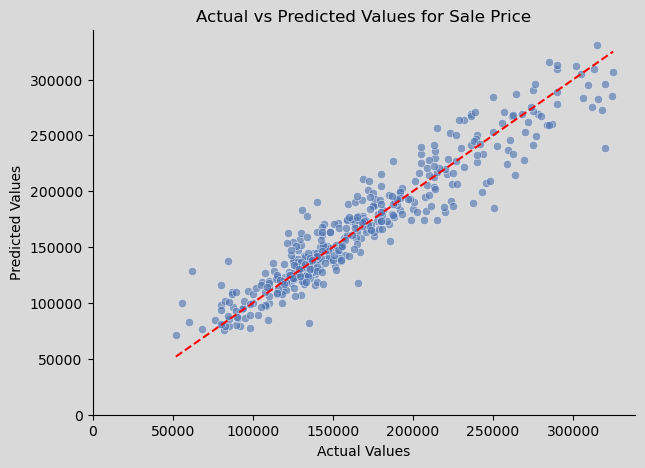


- Mean Squared Error: 0.014603132089538999
- Root Mean Squared Error: 0.12084341971964795


In [991]:
lgbm = LGBMRegressor()
lgbm.fit(x_train_lgbm, y_train)

yhat_lgbm = lgbm.predict(x_test_lgbm)


PlotFitted(y_test, yhat_lgbm, "Actual vs Predicted Values for Sale Price")

### **MODEL REFINEMENT**

In [1097]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 5000),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 16),  # Aumentamos o limite superior
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),  # Antes era até 150
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),  
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 20),  # Reduzimos o máximo de 30 para 20
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0.0001, 0.05),  # Antes era até 0.1
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 10)
    }

    model = LGBMRegressor(**params, verbose=-1)
    model.fit(x_train_lgbm, y_train)
    y_pred = model.predict(x_test_lgbm)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print('\n\nBest trial:', study.best_trial.params)

[I 2025-03-20 16:19:19,432] A new study created in memory with name: no-name-73c782e4-f174-4cec-8613-3df3d20033b8
[I 2025-03-20 16:19:19,632] Trial 0 finished with value: 0.12857231692798282 and parameters: {'n_estimators': 2841, 'learning_rate': 0.06474062815441334, 'max_depth': 6, 'num_leaves': 27, 'colsample_bytree': 0.8552701719138311, 'subsample': 0.7447726689249378, 'min_child_samples': 19, 'min_gain_to_split': 0.031658466523836075, 'reg_alpha': 2.063836781168386, 'reg_lambda': 1.6776638456554471}. Best is trial 0 with value: 0.12857231692798282.
[I 2025-03-20 16:19:19,737] Trial 1 finished with value: 0.12224474314464759 and parameters: {'n_estimators': 1802, 'learning_rate': 0.05295962626936912, 'max_depth': 6, 'num_leaves': 35, 'colsample_bytree': 0.7404142919076475, 'subsample': 0.7459510031951011, 'min_child_samples': 11, 'min_gain_to_split': 0.04435877681234829, 'reg_alpha': 0.2243726469506169, 'reg_lambda': 9.600162236237491}. Best is trial 1 with value: 0.1222447431446475



Best trial: {'n_estimators': 2391, 'learning_rate': 0.08277051522405833, 'max_depth': 5, 'num_leaves': 67, 'colsample_bytree': 0.7098135848645357, 'subsample': 0.7383149254095133, 'min_child_samples': 19, 'min_gain_to_split': 0.0033243802246136823, 'reg_alpha': 0.42674775699851086, 'reg_lambda': 9.999131897270862}


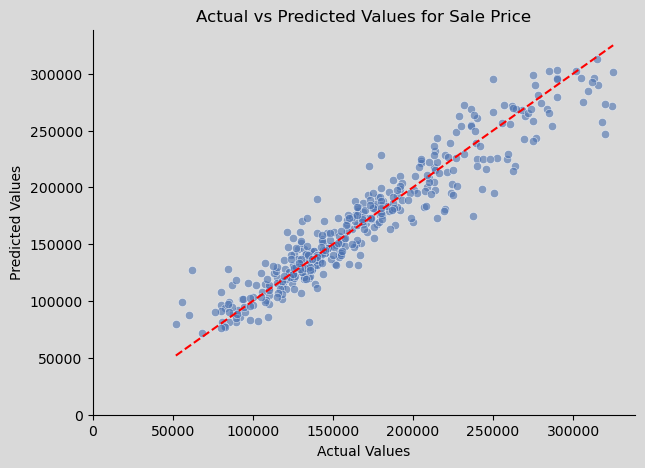


- Mean Squared Error: 0.013371335340827243
- Root Mean Squared Error: 0.11563449027356519


In [993]:
lgbm_op = LGBMRegressor(
    n_estimators = 2391,
    learning_rate = 0.08277051522405833,
    max_depth = 5,
    num_leaves = 67,
    colsample_bytree = 0.7098135848645357,
    subsample = 0.7383149254095133,
    min_child_samples = 19,
    min_gain_to_split = 0.0033243802246136823,
    reg_alpha = 0.42674775699851086,
    reg_lambda = 9.999131897270862,
    verbose = -1
)
lgbm_op.fit(x_train_lgbm, y_train)

yhat_lgbm_op = lgbm_op.predict(x_test_lgbm)

PlotFitted(y_test, yhat_lgbm_op, "Actual vs Predicted Values for Sale Price")

## **XGBOOST REGRESSOR**

### **MODEL DEVELOPMENT**

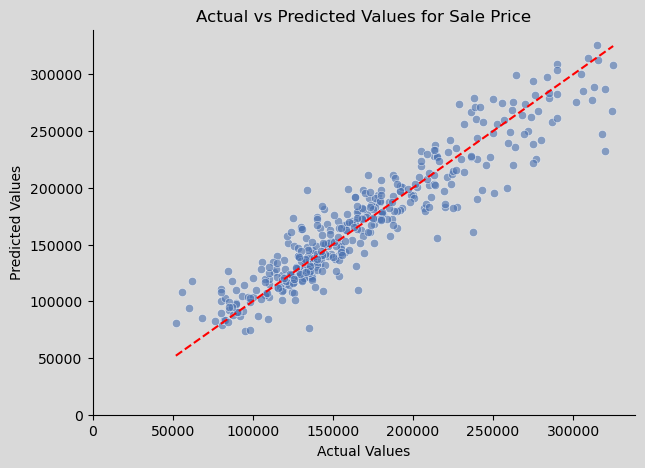


- Mean Squared Error: 0.01761874620001102
- Root Mean Squared Error: 0.13273562521045743


In [995]:
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train_xgbr, y_train)

yhat_xgbr = xgbr.predict(x_test_xgbr)

PlotFitted(y_test, yhat_xgbr, "Actual vs Predicted Values for Sale Price")

### **MODEL REFINEMENT**

In [1099]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(x_train_xgbr, y_train)
    y_pred = model.predict(x_test_xgbr)
    return root_mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

print('\n\nBest trial:', study.best_trial.params)

[I 2025-03-20 16:23:20,030] A new study created in memory with name: no-name-4f621737-4cbf-471a-8931-55362a24b129
[I 2025-03-20 16:23:20,173] Trial 0 finished with value: 0.12388684829953267 and parameters: {'max_depth': 4, 'learning_rate': 0.017959515970632615, 'n_estimators': 553, 'min_child_weight': 6, 'gamma': 0.0467914549470258, 'subsample': 0.6681380240748039, 'colsample_bytree': 0.8952511952304788, 'reg_alpha': 0.8714330941671276, 'reg_lambda': 0.679319043651427}. Best is trial 0 with value: 0.12388684829953267.
[I 2025-03-20 16:23:20,239] Trial 1 finished with value: 0.12941337570423275 and parameters: {'max_depth': 5, 'learning_rate': 0.04869581728851782, 'n_estimators': 261, 'min_child_weight': 3, 'gamma': 0.22234133337352147, 'subsample': 0.9602358427691235, 'colsample_bytree': 0.6751219057486375, 'reg_alpha': 0.5685777944934804, 'reg_lambda': 0.8383651272240698}. Best is trial 0 with value: 0.12388684829953267.
[I 2025-03-20 16:23:20,318] Trial 2 finished with value: 0.1241



Best trial: {'max_depth': 9, 'learning_rate': 0.045008671397212374, 'n_estimators': 844, 'min_child_weight': 8, 'gamma': 0.020185251969114915, 'subsample': 0.6943055593786345, 'colsample_bytree': 0.6140114550155719, 'reg_alpha': 0.42505734486672364, 'reg_lambda': 0.02556079337395177}


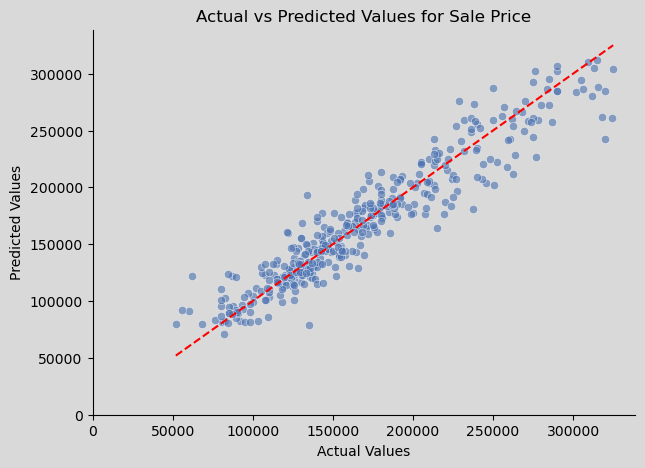


- Mean Squared Error: 0.014473029718764007
- Root Mean Squared Error: 0.1203039056671229


In [997]:
xgb_op = xgb.XGBRegressor(
    max_depth = 9,
    learning_rate = 0.045008671397212374,
    n_estimators = 844,
    min_child_weight = 8,
    gamma = 0.020185251969114915,
    subsample = 0.6943055593786345,
    colsample_bytree = 0.6140114550155719,
    reg_alpha = 0.42505734486672364,
    reg_lambda = 0.02556079337395177
)

xgb_op.fit(x_train_xgbr, y_train)
yhat_xgbr_op = xgb_op.predict(x_test_xgbr)

PlotFitted(y_test, yhat_xgbr_op, "Actual vs Predicted Values for Sale Price")

## **CATBOSST REGRESSOR**

### **MODEL DEVELOPMENT**

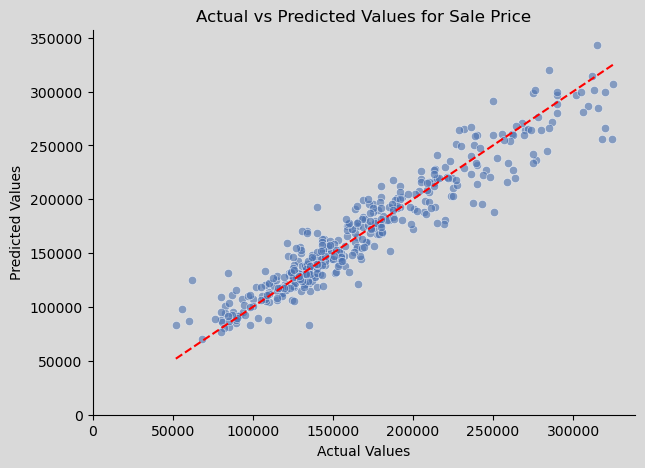


- Mean Squared Error: 0.013048347357224516
- Root Mean Squared Error: 0.11422936293801396


In [999]:
cbr = CatBoostRegressor(verbose=0)
cbr.fit(x_train_cbr, y_train)

yhat_cbr = cbr.predict(x_test_cbr)

PlotFitted(y_test, yhat_cbr, "Actual vs Predicted Values for Sale Price")

### **MODEL REFINEMENT**

In [1101]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 2000),  # Limitamos para acelerar
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 4, 10),  # Controla complexidade das árvores
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),  # Regularização
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0)
    }

    model = CatBoostRegressor(**params, verbose=0)
    model.fit(x_train_cbr, y_train)
    y_pred = model.predict(x_test_cbr)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print('\n\nBest trial:', study.best_trial.params)

[I 2025-03-20 16:25:43,788] A new study created in memory with name: no-name-b6b1d4b2-22b0-4a73-b8d2-532f0a2132e9
[I 2025-03-20 16:25:47,906] Trial 0 finished with value: 0.11814116870210685 and parameters: {'iterations': 1268, 'learning_rate': 0.08067482763976645, 'depth': 6, 'l2_leaf_reg': 5.1637480217806555, 'random_strength': 8.22350902604191, 'bagging_temperature': 0.9833542906564374, 'border_count': 221, 'subsample': 0.8858404188910534}. Best is trial 0 with value: 0.11814116870210685.
[I 2025-03-20 16:26:05,531] Trial 1 finished with value: 0.12255426092754071 and parameters: {'iterations': 1596, 'learning_rate': 0.11883882335173077, 'depth': 8, 'l2_leaf_reg': 9.901580476855163, 'random_strength': 4.592934728027539, 'bagging_temperature': 0.7050771681435638, 'border_count': 248, 'subsample': 0.7462230399856589}. Best is trial 0 with value: 0.11814116870210685.
[I 2025-03-20 16:26:09,451] Trial 2 finished with value: 0.11899278476715573 and parameters: {'iterations': 1994, 'learn



Best trial: {'iterations': 1425, 'learning_rate': 0.022225572351488122, 'depth': 4, 'l2_leaf_reg': 1.7388518866456844, 'random_strength': 3.038417682635791, 'bagging_temperature': 0.7145145378854341, 'border_count': 139, 'subsample': 0.6234263371411372}


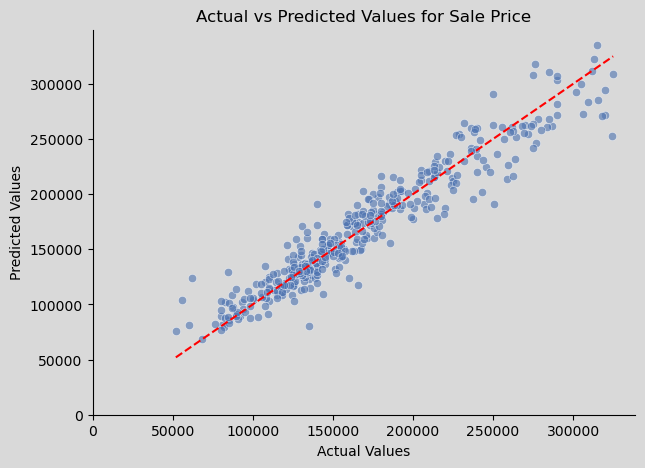


- Mean Squared Error: 0.01233963105301888
- Root Mean Squared Error: 0.11108389196017071


In [1001]:
cbr_op = CatBoostRegressor(
    verbose=0,
    iterations = 1425,
    learning_rate = 0.022225572351488122,
    depth = 4,
    l2_leaf_reg = 1.7388518866456844,
    random_strength = 3.038417682635791,
    bagging_temperature = 0.7145145378854341,
    border_count = 139,
    subsample = 0.6234263371411372
)
cbr_op.fit(x_train_cbr, y_train)

yhat_cbr_op = cbr_op.predict(x_test_cbr)

PlotFitted(y_test, yhat_cbr_op, "Actual vs Predicted Values for Sale Price")

## **STACKING MODEL**

In [1003]:
i = pd.DataFrame({'Model': ['LGBMRegressor', 'XGBRegressor', 'CatBoostRegressor'],
                 'RSME': [root_mean_squared_error(y_test, yhat_lgbm), root_mean_squared_error(y_test, yhat_xgbr), root_mean_squared_error(y_test, yhat_cbr)],
                 'RSME Tuned': [root_mean_squared_error(y_test, yhat_lgbm_op), root_mean_squared_error(y_test, yhat_xgbr_op), root_mean_squared_error(y_test, yhat_cbr_op)]})

i = i.set_index('Model')
i

RSME  RSME Tuned
Model                                  
LGBMRegressor      0.120843    0.115634
XGBRegressor       0.132736    0.120304
CatBoostRegressor  0.114229    0.111084

### **KERAS**

In [1005]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 9.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 7.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 7.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.0 MB/s eta 0:00:00a 0:00:01m


In [1019]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [1129]:
train_preds = np.column_stack([
    lgbm_op.predict(x_train_lgbm),
    xgb_op.predict(x_train_xgbr),
    cbr_op.predict(x_train_cbr)
])

test_preds = np.column_stack([
    yhat_lgbm_op,
    yhat_xgbr_op,
    yhat_cbr_op
])


train_preds_mean = np.mean(train_preds, axis=0)
train_preds_std = np.std(train_preds, axis=0)
train_preds = (train_preds - train_preds_mean) / train_preds_std
test_preds = (test_preds - train_preds_mean) / train_preds_std


def build_meta_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(train_preds.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    return model


meta_model = build_meta_model()
meta_model.fit(train_preds, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

yhat_stacking = meta_model.predict(test_preds).flatten()

rmse_stacking = np.sqrt(mean_squared_error(y_test, yhat_stacking))
print("\n\nRMSE do Stacking Model com Keras:", rmse_stacking)

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 74.5197 - val_loss: 46.3826
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7851 - val_loss: 13.8258
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8546 - val_loss: 5.0581
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3406 - val_loss: 2.9097
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6493 - val_loss: 1.7881
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5023 - val_loss: 0.8384
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1185 - val_loss: 0.1956
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8765 - val_loss: 0.3155
Epoch 9/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1023 - val_loss: 0.1274
Epoch 10/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5574 - val_loss: 0.0752
Epoch 11/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3189 - val_loss: 0.6459
Epoch 12/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

### **MODEL REFINEMENT**

In [1013]:
def objective(trial):
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "swish"])
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)

    if optimizer_name == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    model = Sequential([
        Dense(32, activation=activation, input_shape=(train_preds.shape[1],)),
        Dense(16, activation=activation),
        Dense(1, activation="linear")
    ])
    
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

    model.fit(train_preds, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

    loss, mae = model.evaluate(test_preds, y_test, verbose=0)
    return loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print('\n\nBest trial:', study.best_trial.params)

[I 2025-03-20 18:33:55,248] A new study created in memory with name: no-name-e5edc172-7844-4a5d-9a0c-a0419702c656
[I 2025-03-20 18:33:58,420] Trial 0 finished with value: 0.013249523006379604 and parameters: {'activation': 'swish', 'optimizer': 'sgd', 'learning_rate': 0.003022930084397296}. Best is trial 0 with value: 0.013249523006379604.
[I 2025-03-20 18:34:01,222] Trial 1 finished with value: 0.018336575478315353 and parameters: {'activation': 'relu', 'optimizer': 'rmsprop', 'learning_rate': 0.006373680647246035}. Best is trial 0 with value: 0.013249523006379604.
[I 2025-03-20 18:34:04,034] Trial 2 finished with value: 0.024774063378572464 and parameters: {'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.002720219360588739}. Best is trial 0 with value: 0.013249523006379604.
[I 2025-03-20 18:34:06,781] Trial 3 finished with value: 117.88391876220703 and parameters: {'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 2.48122243481752e-05}. Best is trial 0 with va



Best trial: {'activation': 'swish', 'optimizer': 'sgd', 'learning_rate': 0.0039820608041175095}


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


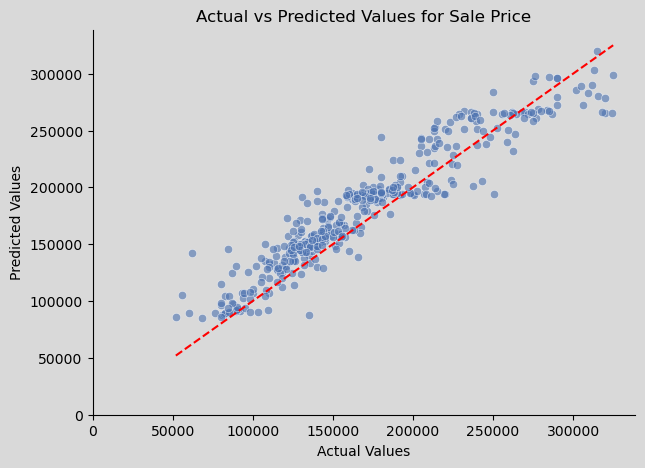


- Mean Squared Error: 0.020991830928142604
- Root Mean Squared Error: 0.14488557874454794


In [1021]:
def build_meta_model():
    model = Sequential([
        Dense(64, activation='swish', input_shape=(train_preds.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='swish'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(16, activation='swish'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=SGD(learning_rate=0.0039820608041175095), loss='mean_squared_error')
    return model


meta_model = build_meta_model()
meta_model.fit(train_preds, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=0)

yhat_stacking = meta_model.predict(test_preds).flatten()

PlotFitted(y_test, yhat_stacking, "Actual vs Predicted Values for Sale Price")

# **KAGGLE COMPETITION SCORE SUBMISSION**

## LGMB

In [1068]:
yhat_sub_backup = yhat_sub.copy()

In [1070]:
yhat_subb = lgbm_op.predict(HousePricesDF_test_lgbm)
yhat_sub1 = yhat_subb.flatten()
yhat_sub['SalePrice'] = np.exp(yhat_sub1)
yhat_sub = yhat_sub.set_index("Id")
yhat_sub.to_csv('HousePredictions_20250320_lgbm.csv')

KeyError: "None of ['Id'] are in the columns"

## XGBR

In [1041]:
yhat_sub = yhat_sub_backup.copy()

In [1043]:
yhat_subb = xgb_op.predict(HousePricesDF_test_xgbr)
yhat_sub1 = yhat_subb.flatten()
yhat_sub['SalePrice'] = np.exp(yhat_sub1)
yhat_sub = yhat_sub.set_index("Id")
yhat_sub.to_csv('HousePredictions_20250320_xgbr.csv')

## CBR

In [1056]:
yhat_sub = yhat_sub_backup.copy()

In [1064]:
yhat_subb = cbr_op.predict(HousePricesDF_test_cbr)

In [1066]:
yhat_sub1 = yhat_subb.flatten()
yhat_sub['SalePrice'] = np.exp(yhat_sub1)
yhat_sub = yhat_sub.set_index("Id")
yhat_sub.to_csv('HousePredictions_20250320_cbr.csv')

## KERAS

In [ ]:
#yhat_subb = model.predict(HousePricesDF_test)

In [ ]:
api.competition_submit('HousePredictions_v2_1.csv','API Submission','house-prices-advanced-regression-techniques')